In [ ]:
###################################################################################################################################
###################################################################################################################################
###  
###  Case Study Name        :  Lending Club Case Study
###
###  Case Study Goal        :  This case study performs exploratory data analysis (EDA) on the Lending Club dataset to identify 
###                            key drivers of loan default. The goal is to understand how loan and borrower characteristics 
###                            influence default risk and provide insights for improved risk assessment and lending decisions.
###
###  Author                 :  Saurabh Tayde, jyoti
###
###  Email                  :  saurabhtayde2810@gmail.com
###
###  Key Libraries          :  pandas, numpy, matplotlib, seaborn, math
###              
###################################################################################################################################
###################################################################################################################################

######
#################
# Contents
#################

######

* **Problem Statement** <br><br>

* **Task 1: Data Understanding and Dimensionality Reduction** <br><br>

    * 1.1 Import Libraries
    
    * 1.2 Load loan data from CSV file 
    
    * 1.3 **Dimensionality Reduction (Dropping Uninformative Features)**:
        
        * 1.3.1 Removing Features with Excessive Missing Values 
        * 1.3.2 Removing Redundant Features (High Cardinality)
        * 1.3.3 Feature Exclusion Based on Domain Expertise:   
        
            * 1.3.3.1 Removing Unique Identifiers
            * 1.3.3.2 Removing Post-Approval Features
            * 1.3.3.3 Removing Other Irrelevant Features <br><br>
   
    * 1.4 Dropping Irrelevant Records <br><br><br>
        


* **Task 2: Data Cleaning and Manipulation** <br><br>

    * 2.1 **Convert Columns Formats**:
    
        * 2.1.1 Remove percentage (%) sign from the data (`int_rate` and `revol_util`) and convert them to float
        * 2.1.2 Convert `issue_d` column in `yyyy-mm-dd` format
        * 2.1.3 Remove 'months' from all the values from the column `term`
        * 2.1.4 Convert `emp_length` into int (First format it correctly then convert it) <br><br>

    * 2.2 **Missing values imputation**

    * 2.3 **Outliers Detection and Mitigation**
    
    * 2.4 **Derived Metrics / Variables**: 
    
        * 2.4.1 Creating Date Based Features 
        * 2.4.2 Creating Binned/Bucketed Features <br><br><br>



* **Task 3: Data Analysis** <br><br>
    
    * 3.1 **Univariate Analysis** ('Charged Off' as well as 'Fully Paid' data): 
        * 3.1.1 Univariate Analysis of Numerical Variables and their Respective bins/buckets ('Charged Off' as well as 'Fully Paid' data)
        * 3.1.2 Univariate Analysis of Categorical Variables ('Charged Off' as well as 'Fully Paid' data) 
        * Summary of Univariate Analysis ('Charged Off' as well as 'Fully Paid' data) Plot Interpretations <br><br>
        
    * 3.2 **Univariate Analysis** ('Charged Off' data only):
        * 3.2.1 Univariate Analysis ('Charged Off' data only) of Numerical Variables and respective bins/buckets 
        * 3.2.2 Univariate Analysis ('Charged off' data only) of Categorical Variables
        * Summary of **Univariate Analysis** ('Charged Off' data only) Plot Interpretations <br><br>
    
    * 3.3 **Segmented Univariate Analysis** ('Charged Off' as well as 'Fully Paid' Data): 
        * 3.3.1 Loan Status (`loan_status`) Segmentation
        * 3.3.2 Annual Income Segmentation 
        * 3.3.3 DTI (Debt-to-Income Ratio) Segmentation 
        * 3.3.4 Interest Rate Segmentation
        * 3.3.5 Loan Amount Segmentation
        * 3.3.6 Employment Length Segmentation
        * 3.3.7 Home Ownership Segmentation 
        * Summary of Segmented Univariate Analysis Plot Interpretations <br><br>
        
    * 3.4 **Bivariate Analysis**:
        * 3.4.1 Core Financial Relationships (with Loan Status Integration)
        * 3.4.2 Loan Characteristics and Grade (with Loan Status Integration)
        * 3.4.3 Loan Purpose and Risk
        * 3.4.4 Time-Based Analysis
        * 3.4.5 Employment Length and Loan Characteristics
        * 3.4.6 Correlation Analysis:
        * 3.4.7 Loan Status vs. Numerical Variables bins/buckets 
        * 3.4.8 Loan Status vs. Categorical Variables (Bivariate Analysis) 
        * Summary of Bivariate Analysis Plot Interpretations <br><br><br>
        
        
* **Driver Variables** <br><br>
* **Summary of Plot Interpretations** <br><br>



## Problem Statement:
######
* The company needs to improve its loan approval process to identify applicants likely to default.  This involves balancing two competing risks:
    * Rejecting a loan application from a creditworthy individual, leading to lost business.
    * Approving a loan application from an individual likely to default, leading to financial loss.
######
* **Dataset and Objective:** The dataset contains information on past loan applicants, including their loan characteristics and whether they defaulted ("charged-off").  The objective is to use EDA to identify patterns and "driver variables" that strongly indicate default risk.
######
* **Business Implications:** Identifying risky applicants allows the company to take mitigating actions such as:
    * Denying the loan application.
    * Reducing the approved loan amount.
    * Charging a higher interest rate to compensate for increased risk.
######
* **Data Scope:**  The dataset *only* includes applicants who were *approved* for a loan.  It does *not* include rejected applications because there is no subsequent loan performance data for these individuals.  The included loan statuses are:
    * **Fully Paid:** Loan repaid successfully.
    * **Current:** Loan repayment in progress.
    * **Charged-off:** Loan defaulted.
######
* **Company Background:**  The company is the largest online loan marketplace, offering various loan types (personal, business, medical).  Its online platform provides borrowers with access to lower interest rates.
######
* **Key Goal:** The primary goal is to reduce credit loss – the financial loss incurred when borrowers default – by identifying risky applicants *before* loan approval.  This involves understanding the factors that contribute to default and using this knowledge to improve the company's risk assessment strategies. This case study uses EDA to address the challenge of loan default prediction for a consumer finance company.  
######

##########################################################################################
# Task 1: Data Understanding and Dimensionality Reduction
##########################################################################################

######
#### 1.1 Import Libraries
######

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import warnings
warnings.filterwarnings('ignore')

######
#### 1.2 Load loan data from CSV file
######

In [2]:
df_loan_1_2 = pd.read_csv('loan.csv')
df_loan_1_2.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [3]:
### Check shape (No. of rows and columns) of the dataframe

df_loan_1_2.shape

(39717, 111)

#####
##### So, from the above output, it can concuded that our dataframe has 39717 rows and 111 columns. 
##### In next step let's check whether all the 111 columns have useful data for doing analysis, or we can drop some columns that are not at all useful to us.
#####

##################################################################################
## 1.3 Dimensionality Reduction (Dropping Uninformative Features)
###################################################################################

######

* This section outlines the strategies employed to reduce the dataset's dimensionality by removing uninformative features.  This process streamlines the data, improves model efficiency, and mitigates the risk of overfitting.  The steps include handling missing data, addressing high-cardinality features, and leveraging domain knowledge for feature selection.

######

########################################################
#### 1.3.1 Removing Features with Excessive Missing Values
########################################################

* Columns containing a high proportion of missing values (greater than 60%) are removed.  A large number of missing values can lead to unreliable analysis and biased models.  This threshold ensures sufficient data for meaningful insights from the remaining features.

######

########################################################
#### 1.3.2 Removing Redundant Features (High Cardinality)
#########################################################

* Features with excessively high cardinality (too many unique values) are removed.  Two specific criteria guide this removal: 
  
*        1. No Variability: Features with only one unique value, providing no variability
*        2. High Repetition: Features where over 98% of the values are identical, indicating minimal predictive power. This process simplifies the dataset and prevents potential overfitting.

######

########################################################
#### 1.3.3 Removing Features Based on Domain Expertise
########################################################

* Leveraging domain knowledge, certain features are excluded based on their irrelevance to predicting loan defaults. This targeted approach ensures the model focuses on factors known to be influential in loan repayment behavior.
	

*    1.3.3.1 Removing Unique Identifiers

        
        * Features serving purely as unique identifiers (e.g., 'id', 'member_id', 'url') are removed. While useful for record-keeping, these identifiers do not contribute to predicting loan default likelihood. Their removal streamlines the dataset without any loss of predictive information. <br><br>
	

*    1.3.3.2 Removing Post-Approval Features

	
        * Features representing information collected after loan approval are excluded.  As the goal is to predict default *prior* to approval, including post-loan information is not relevant to the prediction task and could lead to data leakage.  This focuses the analysis on pre-approval characteristics.  <br><br>

*    1.3.3.3 Removing Other Irrelevant Features


        * Based on domain expertise, removing the features that are deemed irrelevant to loan default prediction. <br><br>
            
######

##############################################################
### 1.3.1 Removing Features with Excessive Missing Values
##############################################################

    Columns containing a high proportion of missing values (greater than 60%) are removed.  A large number of missing values can lead to unreliable analysis.  This threshold ensures sufficient data for meaningful insights from the remaining features.

######

In [4]:
####################
### Check Null Values
####################

# 1. Checking null values
#    We want to see how many null values each column has.
#    This helps us decide which columns to drop based on the criteria.

null_counts = df_loan_1_2.isnull().sum()
print("Null Values in Each Column:")
print(null_counts)

Null Values in Each Column:
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [5]:
####################
### Drop Null Values
####################

#    Calculate the percentage of null values in each column.
null_percentage = (df_loan_1_2.isnull().sum() / len(df_loan_1_2)) * 100

#    Identify columns that exceed 60% null values.
cols_to_drop_null = null_percentage[null_percentage > 60].index
print("\nColumns to drop due to >60% null values are as follows:\n")
print(cols_to_drop_null.tolist())

## Count of the columns with >60% null values
null_cols_number = len(cols_to_drop_null.tolist())



Columns to drop due to >60% null values are as follows:

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_pas

#####
#### So in the folloing 57 columns, null values are greater than 60%. So we can drop these columns
#####

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']

#####

In [6]:
##    Drop these columns (columns having >60% null values) from the dataframe

df_loan_1_3_1 = df_loan_1_2.drop(columns=cols_to_drop_null)
print(df_loan_1_3_1.shape)
print("\n")

(39717, 54)




#### DataFrame shape after dropping >60% null columns: (39717, 54)
######

##############################################################
### 1.3.2 Removing Redundant Features (High Cardinality)
##############################################################

    Features with excessively high cardinality (too many unique values) are removed.  
    Two specific criteria guide this removal: 
  
        1. No Variability: Features with only one unique value, providing no variability
        2. High Repetition: Features where over 98% of the values are identical, indicating minimal predictive power. This process simplifies the dataset and prevents potential overfitting.

We need to drop such columns because they are not useful for our analysis.
Let's identify such columns.

For each column, we will:

    i.   Count unique values.
    ii.  Find the frequency of the most common value.
    iii. If there's only one unique value, we drop it.
    iv.  Else if the frequency of the top value is more than 98% of the column length, drop it.
    
####

In [7]:
###############################################
## Dropping columns with high cardinality
###############################################


cols_to_drop_cardinality = []
for col in df_loan_1_3_1.columns:
    # Count unique values
    unique_vals = df_loan_1_3_1[col].nunique(dropna=False)  # including NaN in unique count
    if unique_vals == 1:
        # This column has only one unique value (could be all NaN or all the same value).
        cols_to_drop_cardinality.append(col)
    else:
        # More than one unique value, check the frequency distribution
        top_value_count = df_loan_1_3_1[col].value_counts(dropna=False).iloc[0]
        total_count = len(df_loan_1_3_1[col])
        
        # Calculate percentage of the most frequent value
        top_value_ratio = (top_value_count / total_count) * 100
        if top_value_ratio > 98:
            # More than 98% of the values are the same
            cols_to_drop_cardinality.append(col)

print("\nFollowing are the columns that needs to be dropped due to high cardinality (single value or >98% same value):")
print(cols_to_drop_cardinality)

# Drop these columns
df_loan_1_3_2 = df_loan_1_3_1.drop(columns=cols_to_drop_cardinality)
print("\nDataFrame shape:", df_loan_1_3_2.shape)
print("\n")


Following are the columns that needs to be dropped due to high cardinality (single value or >98% same value):
['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']

DataFrame shape: (39717, 45)




####
#### DataFrame shape after dropping high-cardinality columns: (39717, 45)
####


#### *Checking the features we are currently left with (after 1.3.1 and 1.3.2)*
####

In [8]:
## Checking the feature we are currently left with:

print("\n Following are the columns we have after performing above feature reduction techniques: \n")
df_loan_1_3_2.columns.values


 Following are the columns we have after performing above feature reduction techniques: 



array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype=object)

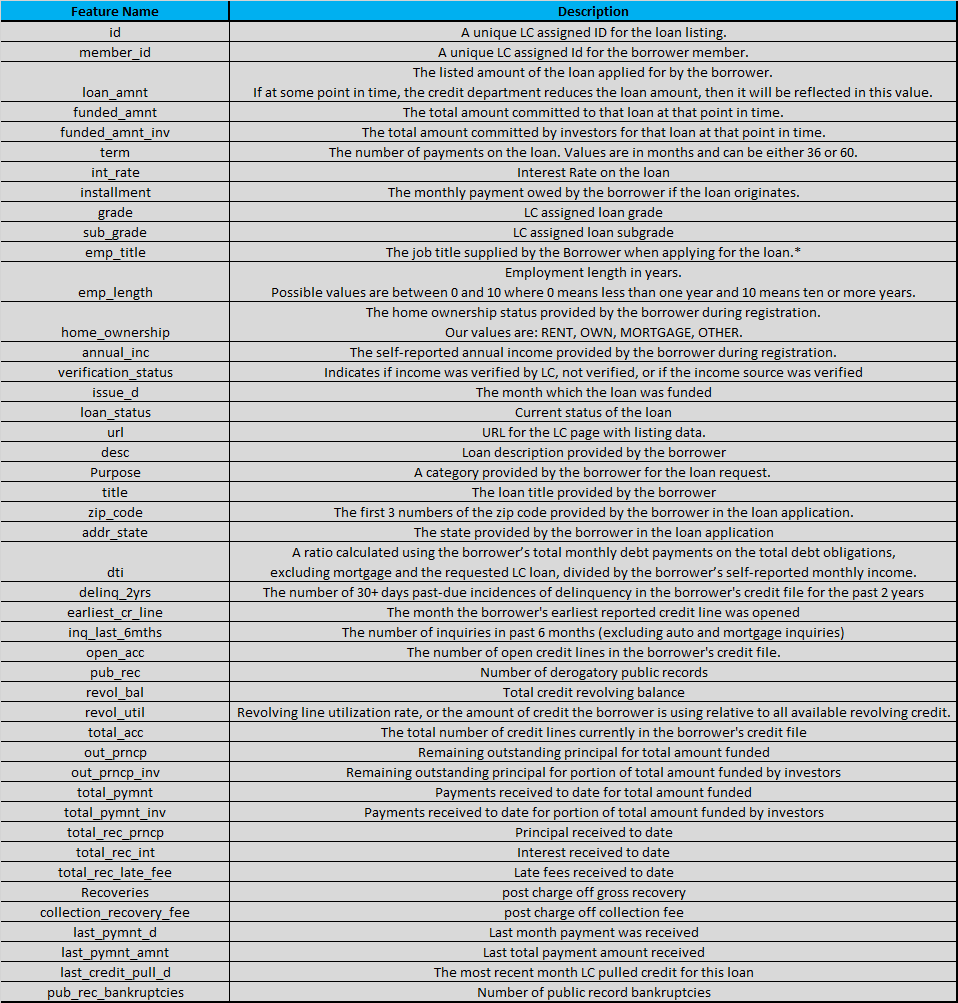

In [9]:
df_loan_1_3_2.shape

(39717, 45)

##########################################################
### 1.3.3 Feature Exclusion Based on Domain Expertise
##########################################################

##############################
#### 1.3.3.1 Removing Unique Identifiers
##############################

Certain features (e.g., ID fields, URLs) contain entirely unique values for each loan.  These identifiers, while useful for record keeping, offer no predictive power in determining loan default likelihood and will be removed. So we will remove following:

1. id
2. member_id
3. url

In [10]:
df_loan_1_3_3_1 = df_loan_1_3_2.drop(['id', 'member_id', 'url'], axis=1)

In [11]:
df_loan_1_3_3_1.shape

(39717, 42)

##########################################################################################
#### 1.3.3.2  Removing Post-Approval Features (Dropping the columns as they are related to post approval process)
##########################################################################################

A significant number of features represent information derived after loan approval.  Since our goal is to identify factors contributing to default before approval, these features are not relevant to our analysis and will be excluded.  These post-approval features primarily describe loan status, payment activity, and other outcomes that occur after the loan has already been granted. (Our objective is to understand the pre-approval characteristics that increase the risk of default.  By removing the unique identifiers and post-approval information, we can focus our analysis on the relevant factors available at the time of the loan application. This targeted approach will improve the efficiency and accuracy of our predictive modeling).

So, we can remove following features:

	· addr_state - The state provided by the borrower in the loan application
	· collection_recovery_fee - post charge off collection fee.
	· delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
    · desc - Loan description provided by the borrower 
	· earliest_cr_line - The month the borrower's earliest reported credit line was opened.
	· emp_title - The job title supplied by the Borrower when applying for the loan.
	· last_credit_pull_d - The most recent month LC pulled credit for this loan.
	· last_pymnt_amnt - Last total payment amount received.
	· last_pymnt_d - Last month payment was received.
	· out_prncp - Remaining outstanding principal for total amount funded.
	· out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors
	· recoveries - post charge off gross recovery.
	· revol_bal - Total credit revolving balance.
	· title - The loan title provided by the borrower.
	· total_pymnt - Payments received to date for total amount funded.
	· total_rec_int - Interest received to date.
	· total_rec_late_fee - Late fees received to date.
	· total_rec_prncp - Principal received to date.
	· zip_code - The first 3 numbers of the zip code provided by the borrower in the loan application.
    
####

In [12]:
columns_to_remove = ['addr_state', 'collection_recovery_fee', 'delinq_2yrs', 'desc', 
                     'earliest_cr_line', 'emp_title', 'last_credit_pull_d', 
                     'last_pymnt_amnt', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv',
                    'recoveries', 'revol_bal', 'title', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 
                    'total_rec_prncp', 'zip_code']

df_loan_1_3_3_2 = df_loan_1_3_3_1.drop(columns_to_remove, axis=1)

In [13]:
df_loan_1_3_3_2.shape

(39717, 23)

In [14]:
df_loan_1_3_3_2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'total_pymnt_inv', 'pub_rec_bankruptcies'],
      dtype='object')

######################################################
#### 1.3.3.3 Removing Other Irrelevant Features
######################################################

Dropping following column as it does not contribute in our analysis. 

1. 'total_pymnt_inv':
    "total_pymnt_inv " is useful for investors but not contributing to the loan defaulting analysis. So removing it.

#####

In [15]:
df_loan_1_3_3_3 = df_loan_1_3_3_2.drop(['total_pymnt_inv'], axis=1)

In [16]:
df_loan_1_3_3_3.shape

(39717, 22)

### Final Columns remaining after step 1.3.3.3

In [17]:
df_loan_1 = df_loan_1_3_3_3.copy()

In [18]:
df_loan_1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [19]:
df_loan_1.shape

(39717, 22)

##################################################################################
## *1.4 Dropping Irrelevant Records*
###################################################################################

######

For the purpose of loan default prediction, only loans with a final status of "Fully Paid" or "Charged Off" are considered. Loans currently in progress ("Current" status) are excluded as their ultimate outcome (default or repayment) is yet to be determined, making them unsuitable for training a predictive model.

######

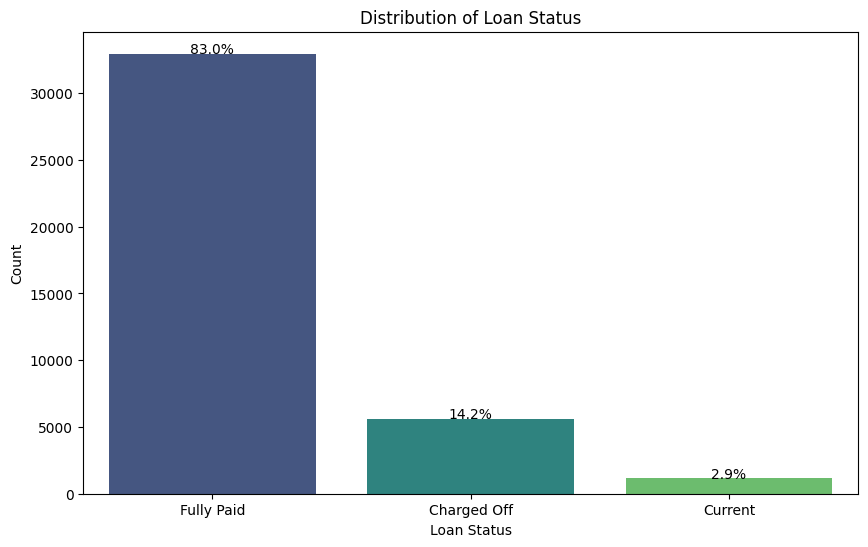

In [20]:
# Calculate value counts and percentages
loan_status_counts = df_loan_1['loan_status'].value_counts(normalize=True) * 100
loan_status_counts = loan_status_counts.round(1)

# Calculate missing values
missing_values = df_loan_1['loan_status'].isnull().sum()

# --- Visualization: Loan Status Distribution ---
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=df_loan_1, palette='viridis')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Annotate bars with percentages (Corrected)
for p in plt.gca().patches:
    height = p.get_height()
    if len(loan_status_counts.index) > int(p.get_x() + p.get_width()/2.): #added this
        percentage = loan_status_counts[loan_status_counts.index[int(p.get_x() + p.get_width()/2.)]]
        plt.gca().text(p.get_x() + p.get_width()/2., height + 3, '{:1.1f}%'.format(percentage), ha="center")


plt.show()

print("\n")

######
#### Findings from above plot:
######


The loan status distribution reveals the following:

* Data Completeness:
    * The 'loan_status' variable has no missing values. <br><br>

* Loan Status Proportions:
    * A significant majority (83.0%) of loans are fully paid.
    * 14.2% of loans are charged off, representing the default rate.
    * A small portion (2.9%) of loans are currently active ("Current" status). These are excluded from further analysis as their final outcome (paid or charged off) is unknown. <br><br>

* Dataset Size:
    * After removing rows with 'Current' loan status, the dataset contains 39,717 rows and 22 columns. This reduced dataset will be used for subsequent analysis and modeling, focusing on loans with a definitive outcome (fully paid or charged off).

######

In [21]:
####################################################
## Droppoing records where loan status is Current
####################################################

print("\n--- Shape of dataframe before removing records with Laon Status as 'Current' : ---\n")
print(df_loan_1.shape)
print("\n")

df_loan_1 = df_loan_1[df_loan_1['loan_status'] != 'Current']



--- Shape of dataframe before removing records with Laon Status as 'Current' : ---

(39717, 22)




In [22]:
#########################
# Verify the filtering
########################

print("\n Now 'Loan_Status' feature has following categories only: ")

print(df_loan_1['loan_status'].unique())  # Check the remaining unique values
print("\n")

print("\n--- Shape of dataframe after removing records with Loan Status as 'Current' : ---\n")
print(df_loan_1.shape)
print("\n")


 Now 'Loan_Status' feature has following categories only: 
['Fully Paid' 'Charged Off']



--- Shape of dataframe after removing records with Loan Status as 'Current' : ---

(38577, 22)




## So we will be using following 22 columns for our analysis:

       1. 'loan_amnt'
       2. 'funded_amnt'
       3. 'funded_amnt_inv'
       4. 'term', 
       5. 'int_rate'
       6. 'installment'
       7. 'grade'
       8. 'sub_grade'
       9. 'emp_length'
       10. 'home_ownership'
       11. 'annual_inc'
       12. 'verification_status'
       13. 'issue_d'
       14. 'loan_status'
       15. 'purpose'
       16. 'dti'
       17. 'inq_last_6mths'
       18. 'open_acc'
       19. 'pub_rec'
       20. 'revol_util'
       21. 'total_acc'
       22. 'pub_rec_bankruptcies'

##################################################################
# *Task 2: Data Cleaning and Manipulation*
##################################################################

In [23]:
############################################
### Checking the data (First few rows only)
############################################

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows (use with caution on large DataFrames)
pd.set_option('display.width', None)        # Auto-detect the width for displaying

df_loan_1.head(3) 


loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   

  issue_d  loan_status         purpose    dti  inq_last_6mths  open_acc  \
0  Dec-11   Fully Paid     credit_card  27.65               1         3   
1  Dec-11  Charged Off             car   1.00               5         3   
2  Dec-11   Fully Paid  small_business   8.72               2         2   

   pub_rec revol_util  total_acc  pub_rec_bankruptcies  
0        0     83.70%          9                   0.0  
1        0      9.40%          4                   0.0  
2        0     98.50%         10                   0.0

In [24]:
# Let's also check data types of the dataframe

df_loan_1.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

#######################################
## 2.1 Convert Columns Formats
#######################################

#### 2.1.1 Remove percentage (%) sign from the data ('int_rate' and 'revol_util') and convert them to float
######

In [25]:
# Removing % sign using rstrip:

df_loan_2_1 = df_loan_1.copy()

df_loan_2_1['int_rate'] = df_loan_1['int_rate'].str.rstrip('%')
df_loan_2_1['revol_util'] = df_loan_1['revol_util'].str.rstrip('%')

# So, 'int_rate' and 'revol_util' were string earlier. Let's converting them to float:

df_loan_2_1[['int_rate', 'revol_util']] = df_loan_2_1[['int_rate', 'revol_util']].apply(pd.to_numeric)

In [26]:
df_loan_2_1.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util              float64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

#### 2.1.2 Convert 'issue_d' column in yyyy-mm-dd' format
#####

In [27]:
df_loan_2_1['issue_d'] = pd.to_datetime(df_loan_2_1['issue_d'], format='%b-%y')

# Print the updated DataFrame to verif
print(df_loan_2_1['issue_d'].head())

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]


#### 2.1.3 Remove 'months' text from all the values from the column 'term'
####

In [28]:
df_loan_2_1['term'] = df_loan_2_1['term'].str.replace(' months', '').astype(int)

# Verify the conversion
print(df_loan_2_1['term'].head())
print(df_loan_2_1['term'].dtype) 

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int64
int64


### 2.1.4 Convert 'emp_length' into int (First format it correctly then convert it)
####

In [29]:
def clean_emp_length(value):
    if pd.isnull(value):  # Handle missing values explicitly
        return value # or return a default value like 0, depending on your imputation strategy.
    elif value == '< 1 year':
        return 0
    elif value == '10+ years':
        return 10
    elif value == '1 year':  # Handle "1 year" specifically
        return 1
    else:
        return int(value.split()[0])  # Extract the numeric part for other cases


df_loan_2_1['emp_length'] = df_loan_2_1['emp_length'].apply(clean_emp_length)

# Verify the conversion
print(df_loan_2_1['emp_length'].unique())
print('*'*50)
print(df_loan_2_1['emp_length'].dtype) # Check if the data type is now numeric (int or float)


[10.  0.  3.  8.  9.  4.  5.  1.  6.  2.  7. nan]
**************************************************
float64


#########################################
## 2.2 Missing data imputation
#########################################

Missing Values per Column:
 loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64
****************************************************************************************************

The following columns have missing values:
- emp_length
- revol_util
- pub_rec_bankruptcies


****************************************************************************************************


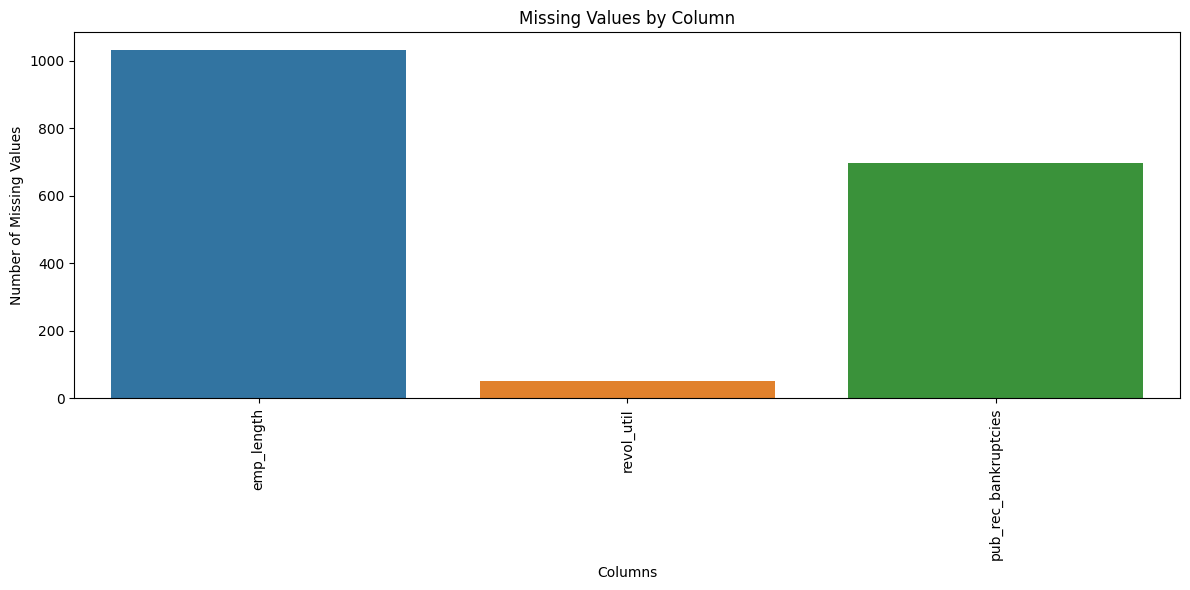

In [30]:
# Calculate missing values per column
missing_values = df_loan_2_1.isnull().sum()

# Print the missing value counts
print("Missing Values per Column:\n", missing_values)

print("*"*100)

# Filter out columns with no missing values for a cleaner plot and reporting
missing_values = missing_values[missing_values > 0]

# Check if there are any columns with missing values before printing the message and plot
if missing_values.any():
    print("\nThe following columns have missing values:")
    for column in missing_values.index:
        print(f"- {column}")
    print('\n')
    print("*"*100)

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_values.index, y=missing_values.values)
    plt.xticks(rotation=90)
    plt.title('Missing Values by Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo columns have missing values.")


In [31]:
####################################################################################
## Let's analyze columns 'emp_length', 'revol_util' and 'pub_rec_bankruptcies'
####################################################################################

# Data types of columns with missing values
missing_cols = ['emp_length', 'revol_util', 'pub_rec_bankruptcies']
data_types = df_loan_2_1[missing_cols].dtypes
print("\n")
print("Data Types:\n", data_types)

print("\n")
print("*"*100)

# Count of unique values of columns with missing values (excluding NaN)
for col in missing_cols:
    num_unique = df_loan_2_1[col].nunique()
    print(f"\nNumber of unique values for {col} (excluding NaN): {num_unique}")

print("\n")
print("*"*100)    
print("\n")



Data Types:
 emp_length              float64
revol_util              float64
pub_rec_bankruptcies    float64
dtype: object


****************************************************************************************************

Number of unique values for emp_length (excluding NaN): 11

Number of unique values for revol_util (excluding NaN): 1088

Number of unique values for pub_rec_bankruptcies (excluding NaN): 3


****************************************************************************************************




##########
#### Observations from result of previous cell
##########

1. Although 'emp_length' is numeric, its low cardinality (only 10 unique values) makes mode imputation the most suitable approach.

2. Although 'pub_rec_bankruptcies' is numeric, its low cardinality (only three unique values) makes mode imputation the most suitable approach.

3.  The missing values in 'revol_util' will be imputed using the median.

#####

In [32]:
##########################################################################
# Impute columns emp_length', 'pub_rec_bankruptcies' and 'revol_util'
##########################################################################

df_loan_2_2 = df_loan_2_1.copy()

# Impute 'emp_length' with mode
mode_emp_length = df_loan_2_1['emp_length'].mode()[0]  # Get the mode (most frequent value)
df_loan_2_2['emp_length'].fillna(mode_emp_length, inplace=True)


# Impute 'pub_rec_bankruptcies' with mode
mode_pub_rec_bankruptcies = df_loan_2_1['pub_rec_bankruptcies'].mode()[0]
df_loan_2_2['pub_rec_bankruptcies'].fillna(mode_pub_rec_bankruptcies, inplace=True)


# Impute 'revol_util' with median
median_revol_util = df_loan_2_1['revol_util'].median()
df_loan_2_2['revol_util'].fillna(median_revol_util, inplace=True)

In [33]:
# Verify imputation 
print(df_loan_2_2.isnull().sum())

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64


In [34]:
df_loan_2_2.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
5       5000         5000           5000.0    36      7.90       156.46     A   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2        10.0           RENT     24000.0            Verified   
1        C4         0.0           RENT     30000.0     Source Verified   
2        C5        10.0           RENT     12252.0        Not Verified   
3        C1        10.0           RENT     49200.0     Source Verified   
5        A4         3.0           RENT     36000.0     Source Verified   

     issue_d  loan_status         purpose    dti  inq_last_6mths  open_acc  \
0 2011-12-01   Fully Paid     credit_card  27.65               1         3   
1 2011-12-01  Charged Off             car   1.00               5         3   
2 2011-12-01   Fully Paid  small_business   8.72               2         2   
3 2011-12-01   Fully Paid           other  20.00               1        10   
5 2011-12-01   Fully Paid         wedding  11.20               3         9   

   pub_rec  revol_util  total_acc  pub_rec_bankruptcies  
0        0        83.7          9                   0.0  
1        0         9.4          4                   0.0  
2        0        98.5         10                   0.0  
3        0        21.0         37                   0.0  
5        0        28.3         12                   0.0

In [35]:
df_loan_2_2.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                     float64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
dti                            float64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_util                     float64
total_acc                        int64
pub_rec_bankruptcies           float64
dtype: object

######

#######################################
## 2.3 Outliers Detection and Mitigation
########################################

#####

##############################################################
### Justification for Outlier Removal in Loan Data Analysis
##############################################################

#####

* Initial State:

    * 38,577 total loan records.
    * Outlier removal using IQR method resulted in approximately 32,967 records (≈14% reduction).  <br><br>
    
* Why Removal is Preferred over Capping / Winsorizing:

    * Data Integrity:
        * Outliers can represent unusual cases, errors, or fraudulent activity.
        * Capping/Winsorizing introduces artificial data points, distorting the true distribution.
        * Removal ensures remaining data is more representative of typical loans. <br><br>
        
    * Model Robustness:
        * Outliers can unduly influence model parameters and reduce predictive power.
        * Removal improves model robustness and reliability of findings. <br><br>
        
    * Interpretability:
        * Outliers skew descriptive statistics, making interpretation difficult.
        * Removal normalizes data distribution, facilitating meaningful conclusions. <br><br> 

* Sample Size Justification:

    * 32,967 records is still substantial for robust statistical analysis.
    * Ample statistical power remains for detecting significant relationships. <br><br>  

* Focus on Typical Behavior:

    * Goal is to understand *typical* loan behavior.
    * Outliers represent atypical cases.
    * Removal allows focus on the majority of the data and clearer understanding of standard loan processes. <br><br>


In conclusion, the improved data quality, model robustness, and focus on typical loan behavior justify removing outliers, even with the slight reduction in sample size. The remaining 32,967 records provide a strong foundation for reliable analysis.

###### 

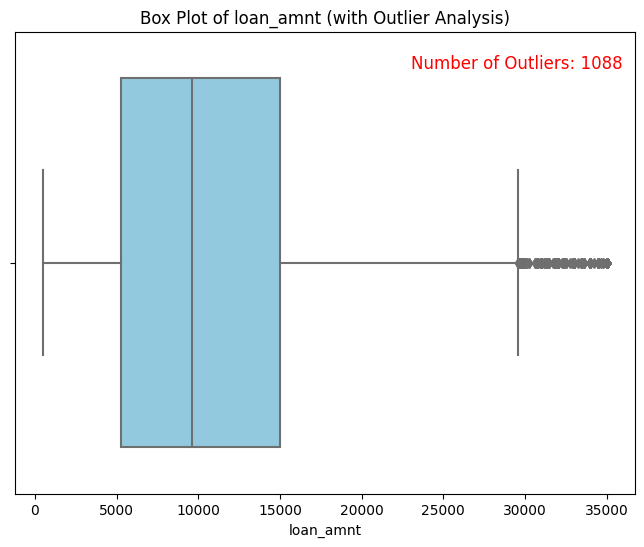


--- loan_amnt ---


Q1: 5300.00
Q3: 15000.00
IQR: 9700.00
Lower Bound: -9250.00
Upper Bound: 29550.00
Number of Unique Values: 870
Number of Outliers: 1088


****************************************************************************************************




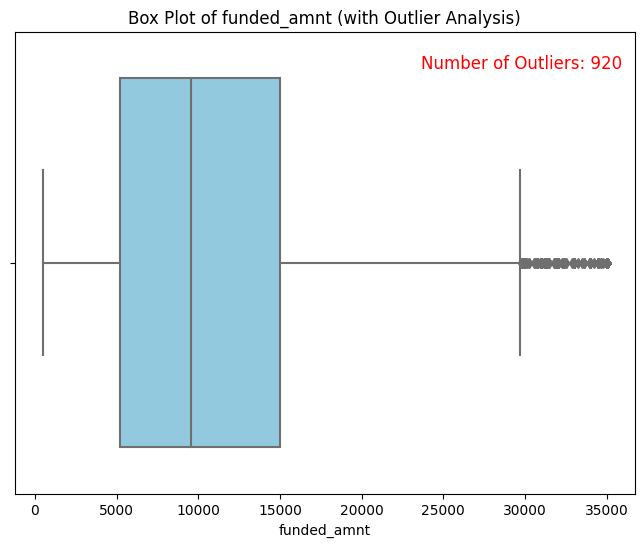


--- funded_amnt ---


Q1: 5200.00
Q3: 15000.00
IQR: 9800.00
Lower Bound: -9500.00
Upper Bound: 29700.00
Number of Unique Values: 1019
Number of Outliers: 920


****************************************************************************************************




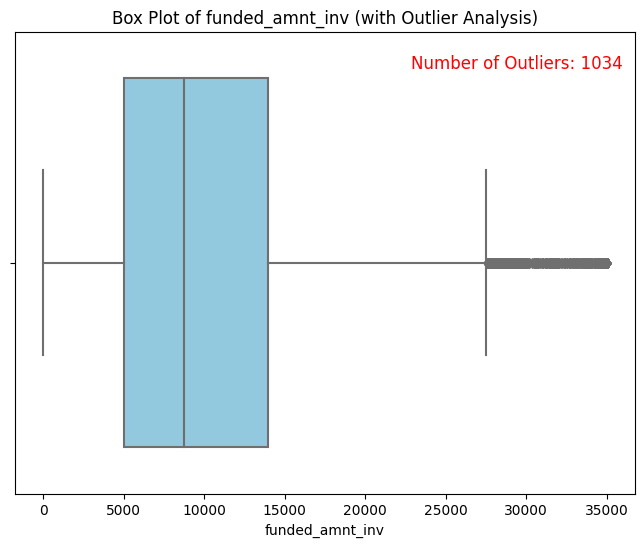


--- funded_amnt_inv ---


Q1: 5000.00
Q3: 14000.00
IQR: 9000.00
Lower Bound: -8500.00
Upper Bound: 27500.00
Number of Unique Values: 8050
Number of Outliers: 1034


****************************************************************************************************




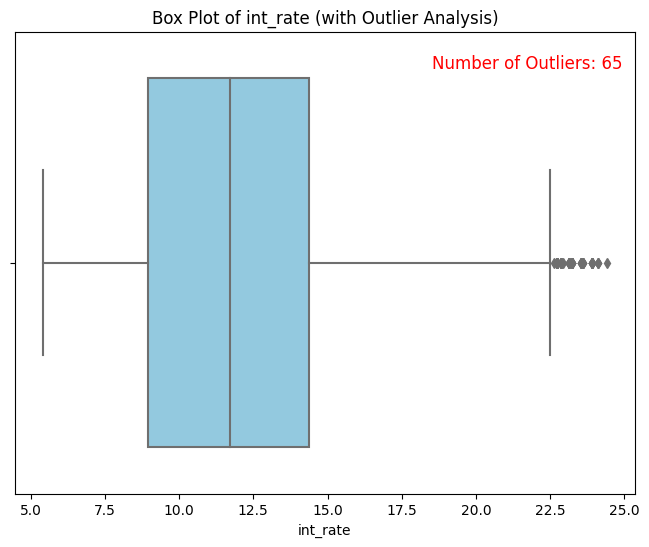


--- int_rate ---


Q1: 8.94
Q3: 14.38
IQR: 5.44
Lower Bound: 0.78
Upper Bound: 22.54
Number of Unique Values: 370
Number of Outliers: 65


****************************************************************************************************




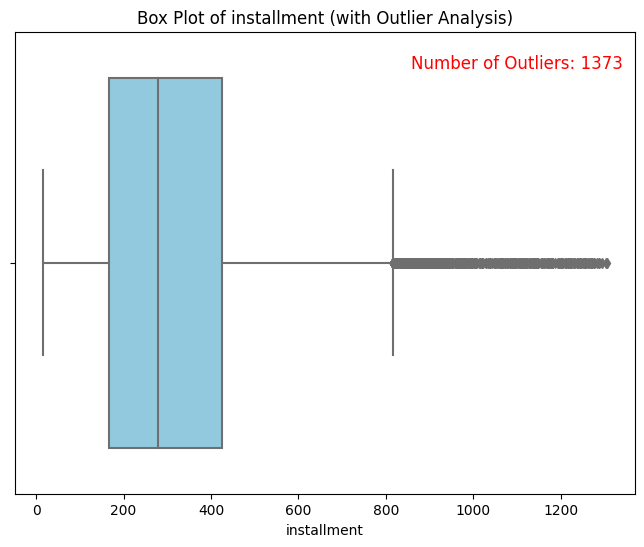


--- installment ---


Q1: 165.74
Q3: 425.55
IQR: 259.81
Lower Bound: -223.98
Upper Bound: 815.27
Number of Unique Values: 15022
Number of Outliers: 1373


****************************************************************************************************




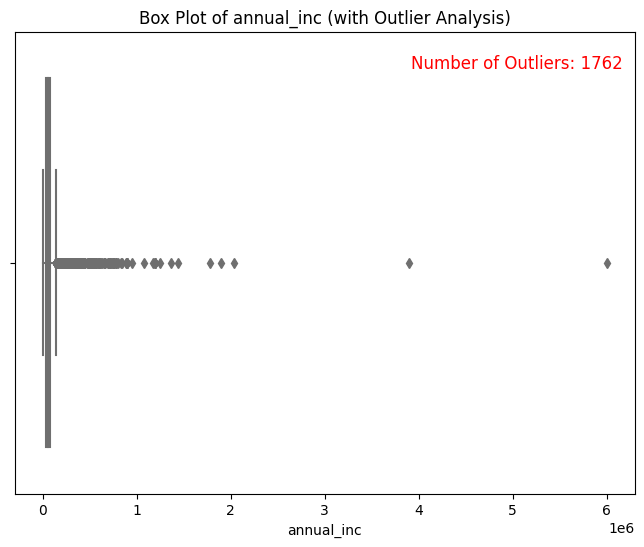


--- annual_inc ---


Q1: 40000.00
Q3: 82000.00
IQR: 42000.00
Lower Bound: -23000.00
Upper Bound: 145000.00
Number of Unique Values: 5215
Number of Outliers: 1762


****************************************************************************************************




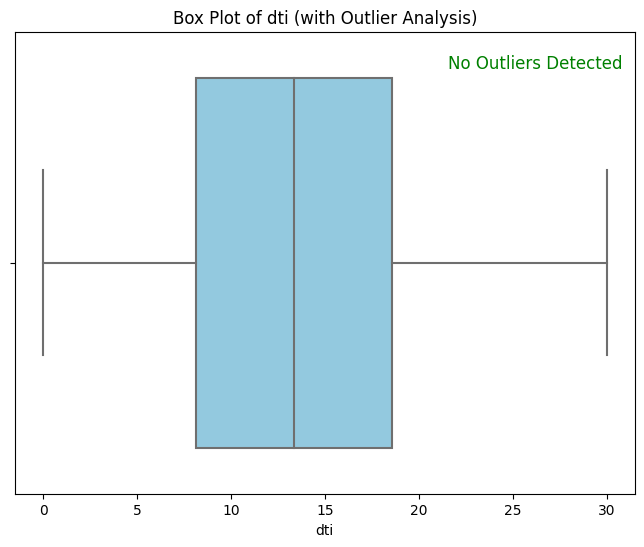


--- dti ---


Q1: 8.13
Q3: 18.56
IQR: 10.43
Lower Bound: -7.51
Upper Bound: 34.20
Number of Unique Values: 2853
Number of Outliers: 0


****************************************************************************************************




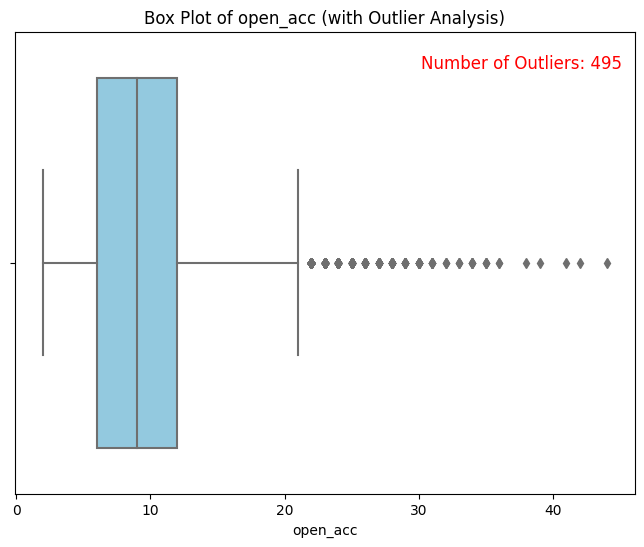


--- open_acc ---


Q1: 6.00
Q3: 12.00
IQR: 6.00
Lower Bound: -3.00
Upper Bound: 21.00
Number of Unique Values: 40
Number of Outliers: 495


****************************************************************************************************




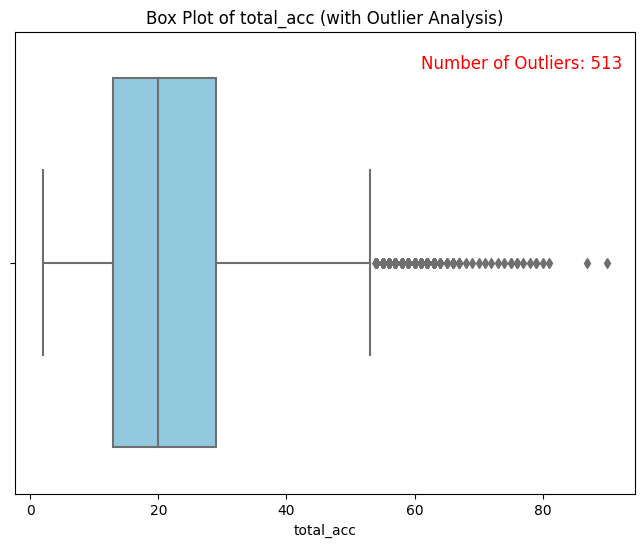


--- total_acc ---


Q1: 13.00
Q3: 29.00
IQR: 16.00
Lower Bound: -11.00
Upper Bound: 53.00
Number of Unique Values: 82
Number of Outliers: 513


****************************************************************************************************




In [36]:
###########################################################
## Function to detect outliers in the given dataframe
###########################################################

def analyze_outliers_iqr(df, column_name):
    """
    Analyzes outliers in a DataFrame column using the IQR method and visualizes them with a box plot.

    Args:
        df: The Pandas DataFrame.
        column_name: The name of the column to analyze.
    """


    # Calculate quantiles and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    num_outliers = len(outliers)

    # --- Visualization ---
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column_name], color="skyblue")  # Use seaborn for nicer boxplots
    plt.title(f"Box Plot of {column_name} (with Outlier Analysis)")

    # Add text indicating outlier presence and count
    if num_outliers > 0:
        plt.text(0.98, 0.95, f"Number of Outliers: {num_outliers}", transform=plt.gca().transAxes, ha='right', va='top', fontsize=12, color='red') # Improved placement
    else:
        plt.text(0.98, 0.95, "No Outliers Detected", transform=plt.gca().transAxes, ha='right', va='top', fontsize=12, color='green') # Clearer message

    plt.show()

    # --- Summary Statistics ---
    print(f"\n--- {column_name} ---")
    print("\n")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"Number of Unique Values: {df[column_name].nunique()}")  
    print(f"Number of Outliers: {num_outliers}")
    print("\n")
    print('**'*50)
    print("\n")


# List of numerical columns to analyze
numerical_columns = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 
    'annual_inc', 'dti', 'open_acc', 'total_acc'
]

# Analyze each column
for column in numerical_columns:
    analyze_outliers_iqr(df_loan_2_2, column)


In [37]:
########################
##### Outlier Removal
#######################

def remove_outliers_iqr(df, column_name):
    """Removes outliers from a DataFrame column using the IQR method."""
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_df

df_loan_2_3 = df_loan_2_2.copy()

numerical_columns = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 
    'annual_inc', 'dti', 'open_acc', 'total_acc'    
]



for column in numerical_columns:
    df_loan_2_3 = remove_outliers_iqr(df_loan_2_3, column)

print(f"Original DataFrame size: {len(df_loan_2_2)}")
print(f"DataFrame size after outliers removal: {len(df_loan_2_3)}")

    

Original DataFrame size: 38577
DataFrame size after outliers removal: 32967


############################################################################################################################
# 2.4 Derived Metrics / Variables (along with justification of their creation)
############################################################################################################################

###### 

Following columns to be engineered to enhance data analysis:

###### 

* **Derived Features from `issue_d`:**
    * **`issue_year`:** The year the loan was issued, extracted from the `issue_d` variable.  This allows for analysis of trends and patterns in loan defaults over different years, capturing potential macroeconomic influences or changes in lending practices.
    * **`issue_month`:** The month the loan was issued, extracted from the `issue_d` variable. This enables examination of seasonal effects on loan defaults, as borrowing behavior and repayment capacity might fluctuate throughout the year.

###### 

* **Binned Features: Enhancing Analysis and Prediction**

    Creating binned features from continuous variables significantly improves our ability to analyze the data and predict loan defaults, especially through univariate, segmented univariate, and bivariate analysis. Here's why:

    * **Enhanced Univariate Analysis:**  
        Bins make it easier to visualize and understand the distribution of individual variables.  For example, instead of just looking at the overall spread of loan amounts, we can quickly see the proportion of loans falling within specific ranges (e.g., 0-4K, 4K-8K, etc.). This gives us a clearer picture of typical loan sizes and potential concentrations of risk.

    * **More Powerful Segmented Univariate Analysis:**  
        Binning allows us to perform more targeted univariate analysis. We can examine the distribution of loan status (default vs. paid) *within* each bin of another variable.  This is crucial for loan default prediction. For example, we can analyze the default rate specifically for borrowers within each income bracket, revealing how default risk varies across income levels.  This segmented approach provides much richer insights than looking at overall default rates.

    * **Improved Bivariate Analysis:**  
        Bins facilitate clearer bivariate analysis by enabling us to examine the relationship between two binned variables.  We can create contingency tables or grouped bar charts to compare default rates across different combinations of bins.  For instance, we can analyze the relationship between loan amount bins and income bins, revealing whether larger loans are more likely to default for borrowers in lower income groups. This type of analysis helps us identify combinations of factors that contribute to higher default risk.


So, binning transforms continuous data into a format that is much more suitable for exploratory data analysis. This is especially valuable for univariate, segmented univariate, and bivariate analyses, which are essential for understanding the factors driving loan defaults and building effective predictive models.  By revealing patterns and relationships within these simpler representations of the data, binning helps us uncover key insights that would be harder to discern with continuous variables alone.


###### 

* **The specific binning strategies for each feature are justified as follows**:

    1. **`loan_amnt` (Loan Amount):** Binned into ranges (0-4K, 4K-8K, 8K-12K, 12K-16K, 16K-20K, 20K+) based on the distribution statistics (min: 500, max: 29500, median: 8500).  These bins capture the typical loan amount ranges and group larger loans together to handle potential outliers.

    2. **`funded_amnt` (Funded Amount):** Uses the same binning strategy as `loan_amnt` due to its similar distribution (min: 500, max: 28000, median: 8400).  This ensures consistency in analysis and facilitates comparisons between the requested and funded loan amounts.

    3. **`int_rate` (Interest Rate):** Grouped into ranges (0%-5%, 5%-9%, 9%-13%, 13%-17%, 17%-21%, 21%-above) based on the observed range (min: 5.42, max: 22.11). These bins reflect typical interest rate tiers and capture potential risk variations associated with different interest levels.

    4. **`installment` (Monthly Installment):** Divided into bins (0-150, 150-300, 300-450, 450-600, 600-750, 750-900) based on the data range (min: 15.69, max: 760.75). This helps analyze the impact of monthly payment burdens on default rates.

    5. **`annual_inc` (Annual Income):** Binned into income brackets (0-25K, 25K-50K, 50K-75K, 75K-100K, 100K-125K, 125K-150K) based on the distribution (min: 4000, max: 137481, median: 54000). These bins represent meaningful income levels and allow for analysis of default risk across different income groups.

    6. **`dti` (Debt-to-Income Ratio):** Grouped into ranges (< 5, 5-10, 10-15, 15-20, 20-25, 25-30) based on the typical range (min: 0, max: 29.99, median: 13.37).  These bins reflect different levels of borrower debt burden relative to their income.

    7. **`open_acc` (Open Credit Lines):** Binned into groups (2-5, 5-8, 8-11, 11-14, 14-17, 17-20) based on the number of open accounts (min: 2, max: 18). This captures different credit behavior patterns and their potential impact on defaults.

    8. **`revol_util` (Revolving Credit Utilization):** Grouped into usage levels (0-17, 17-34, 34-51, 51-68 ,68-85, 85-102) based on the percentage utilization (min: 0, max: 99.9).  These bins reflect how much of their available revolving credit borrowers are using, which is an important indicator of credit risk.

    9. **`total_acc` (Total Credit Lines):**  Binned into groups (2-8, 8-16, 16-24, 24-32, 32-40, 40-49) based on the total number of credit lines (min: 2, max: 48).  This provides insight into the overall credit history length and depth of borrowers.

By creating these derived and binned features, the dataset is better prepared for exploratory data analysis and subsequent modeling, enabling more effective identification of factors contributing to loan defaults.

######

###########################################################################
### 2.4.1 Creating Date Based Features ('issue_year', 'issue_month')
###########################################################################

In [38]:
df_loan_2_4_1 = df_loan_2_3.copy()

# Convert 'issue_d' to datetime objects
df_loan_2_4_1['issue_d'] = pd.to_datetime(df_loan_2_4_1['issue_d'], format='%b-%y')

# Extract year and month (numerical)
df_loan_2_4_1['issue_year'] = df_loan_2_4_1['issue_d'].dt.year
df_loan_2_4_1['issue_month'] = df_loan_2_4_1['issue_d'].dt.month  # Extract numerical month (1-12)


# Display the updated DataFrame (optional)
print(df_loan_2_4_1[['issue_d', 'issue_year', 'issue_month']].head())


     issue_d  issue_year  issue_month
0 2011-12-01        2011           12
1 2011-12-01        2011           12
2 2011-12-01        2011           12
3 2011-12-01        2011           12
5 2011-12-01        2011           12


In [39]:
df_loan_2_4_1.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
5       5000         5000           5000.0    36      7.90       156.46     A   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2        10.0           RENT     24000.0            Verified   
1        C4         0.0           RENT     30000.0     Source Verified   
2        C5        10.0           RENT     12252.0        Not Verified   
3        C1        10.0           RENT     49200.0     Source Verified   
5        A4         3.0           RENT     36000.0     Source Verified   

     issue_d  loan_status         purpose    dti  inq_last_6mths  open_acc  \
0 2011-12-01   Fully Paid     credit_card  27.65               1         3   
1 2011-12-01  Charged Off             car   1.00               5         3   
2 2011-12-01   Fully Paid  small_business   8.72               2         2   
3 2011-12-01   Fully Paid           other  20.00               1        10   
5 2011-12-01   Fully Paid         wedding  11.20               3         9   

   pub_rec  revol_util  total_acc  pub_rec_bankruptcies  issue_year  \
0        0        83.7          9                   0.0        2011   
1        0         9.4          4                   0.0        2011   
2        0        98.5         10                   0.0        2011   
3        0        21.0         37                   0.0        2011   
5        0        28.3         12                   0.0        2011   

   issue_month  
0           12  
1           12  
2           12  
3           12  
5           12

In [40]:
df_loan_2_4_1.shape

(32967, 24)

############################################
#### 2.4.2 Creating Binned/Bucketed Features ('dti_bins', 'loan_amnt_bins', 'funded_amnt_bins', 'annual_inc_bins', 'int_rate_bins', 'installment_bins')
############################################

In [42]:
##################################################################################
## Checking stats of all the numerical variables to get idea about bin creation
##################################################################################

df_loan_2_4_2 = df_loan_2_4_1.copy()  

def calculate_stats(df, variable):
    """Calculates min, max, median, mode, and mean for a given variable.

    Args:
        df: The Pandas DataFrame.
        variable: The name of the column (variable) to analyze.

    Returns:
        A dictionary containing the calculated statistics, or None if the variable
        is not numerical.
    """

    if pd.api.types.is_numeric_dtype(df[variable]):  # Check if the variable is numeric
        stats = {
            "min": df[variable].min(),
            "max": df[variable].max(),
            "median": df[variable].median(),
            "mode": df[variable].mode().iloc[0] if len(df[variable].mode()) > 0 else None,  # Handle cases with no mode
            "mean": df[variable].mean(),
        }
        return stats
    else:
        return None  


# Calculate statistics for the specified variables

variables = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_util', 'total_acc']

for var in variables:
    stats = calculate_stats(df_loan_2_4_2, var)
    if stats:
        print(f"Statistics for {var}:")
        for stat, value in stats.items():
            print(f"  {stat}: {value}")
        print('*'*30)
        print('\n')
    else:
        print(f"Variable '{var}' is not numerical. Cannot calculate statistics.")


Statistics for loan_amnt:
  min: 500
  max: 29500
  median: 8500.0
  mode: 10000
  mean: 9632.003215336548
******************************


Statistics for funded_amnt:
  min: 500
  max: 27600
  median: 8400.0
  mode: 10000
  mean: 9414.312039312039
******************************


Statistics for int_rate:
  min: 5.42
  max: 22.11
  median: 11.49
  mode: 10.99
  mean: 11.697382837382838
******************************


Statistics for installment:
  min: 15.69
  max: 759.72
  median: 255.18
  mode: 311.11
  mean: 281.67236630569965
******************************


Statistics for annual_inc:
  min: 4000.0
  max: 137481.0
  median: 54000.0
  mode: 60000.0
  mean: 58205.761882185216
******************************


Statistics for dti:
  min: 0.0
  max: 29.99
  median: 13.37
  mode: 0.0
  mean: 13.266743410076742
******************************


Statistics for open_acc:
  min: 2
  max: 18
  median: 8.0
  mode: 7
  mean: 8.598234598234598
******************************


Statistics for revol_

In [43]:

###########################################################
## Create a function to convert numerical column into bins
##########################################################

def bucket_data(value, thresholds, labels):
    """Categorizes a numerical value into bins based on thresholds, including the upper bound in the higher bin."""
    for i in range(len(thresholds)):
        if value < thresholds[i]:  
            return labels[i]
    return labels[-1]  # Return the last label for values above all thresholds


#########################
## 1. Loan Amount Buckets
#########################

loan_amnt_thresholds = [4000, 8000, 12000, 16000, 20000]
loan_amnt_labels = ['0-4K', '4K-8K', '8K-12K', '12K-16K', '16K-20K',  '20K +']
df_loan_2_4_2['loan_amnt_bins'] = df_loan_2_4_2['loan_amnt'].apply(bucket_data, args=(loan_amnt_thresholds, loan_amnt_labels))



###########################
## 2. Funded Amount Buckets
###########################

funded_amnt_thresholds = [4000, 8000, 12000, 16000, 20000]
funded_amnt_labels =  ['0-4K', '4K-8K', '8K-12K', '12K-16K', '16K-20K',  '20K +']
df_loan_2_4_2['funded_amnt_bins'] = df_loan_2_4_2['funded_amnt'].apply(bucket_data, args=(funded_amnt_thresholds, funded_amnt_labels))


###########################
## 3. Interest Rate Buckets
###########################

int_rate_bins = [5, 9, 13, 17, 21]
int_rate_labels = ['0%-5%', '5%-9%', '9%-13%', '13%-17%', '17%-21%', '21%-above'] 

df_loan_2_4_2['int_rate_bins'] = df_loan_2_4_2['int_rate'].apply(bucket_data, args=(int_rate_bins, int_rate_labels))



######################################################
## 4. Installment Buckets (using pd.cut for efficiency)
######################################################

installment_thresholds = [150, 300, 450, 600, 750, 900]
installment_labels = ['0-150', '150-300', '300-450', '450-600', '600-750', '750-900']
df_loan_2_4_2['installment_bins'] = df_loan_2_4_2['installment'].apply(bucket_data, args=(installment_thresholds, installment_labels))


###########################
## 5. Annual Income Buckets
###########################

annual_inc_thresholds = [25000, 50000, 75000, 100000, 125000, 150000]
annual_inc_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K', '100K-125K', '125K-150K']
df_loan_2_4_2['annual_inc_bins'] = df_loan_2_4_2['annual_inc'].apply(bucket_data, args=(annual_inc_thresholds, annual_inc_labels))


    
##################
## 6. DTI Buckets
##################

dti_thresholds = [5, 10, 15, 20, 25, 30]
dti_labels = ['< 5', '5-10', '10-15', '15-20', '20-25', '25-30']
df_loan_2_4_2['dti_bins'] = df_loan_2_4_2['dti'].apply(bucket_data, args=(dti_thresholds, dti_labels))



#########################
## 7. open_acc Buckets
#########################

open_acc_thresholds = [5, 8, 11, 14, 17, 20] # Added an extra threshold to handle "17+"
open_acc_labels = ['2-5', '5-8', '8-11', '11-14', '14-17', '17-20']
df_loan_2_4_2['open_acc_bins'] = df_loan_2_4_2['open_acc'].apply(bucket_data, args=(open_acc_thresholds, open_acc_labels))


#########################
## 8. revol_util Buckets
#########################

revol_util_thresholds = [17, 34, 51, 68, 85, 102]
revol_util_labels = ['0-17', '17-34', '34-51', '51-68' ,'68-85', '85-102']
df_loan_2_4_2['revol_util_bins'] = df_loan_2_4_2['revol_util'].apply(bucket_data, args=(revol_util_thresholds, revol_util_labels))


#########################
## 9. total_acc Buckets
#########################

total_acc_thresholds = [8, 16, 24, 32, 40, 49]  # No changes needed here
total_acc_labels = ['2-8', '8-16', '16-24', '24-32', '32-40', '40-49']
df_loan_2_4_2['total_acc_bins'] = df_loan_2_4_2['total_acc'].apply(bucket_data, args=(total_acc_thresholds, total_acc_labels))


# Display updated DataFrame 
df_loan_2_4_2.head()


loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
5       5000         5000           5000.0    36      7.90       156.46     A   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2        10.0           RENT     24000.0            Verified   
1        C4         0.0           RENT     30000.0     Source Verified   
2        C5        10.0           RENT     12252.0        Not Verified   
3        C1        10.0           RENT     49200.0     Source Verified   
5        A4         3.0           RENT     36000.0     Source Verified   

     issue_d  loan_status         purpose    dti  inq_last_6mths  open_acc  \
0 2011-12-01   Fully Paid     credit_card  27.65               1         3   
1 2011-12-01  Charged Off             car   1.00               5         3   
2 2011-12-01   Fully Paid  small_business   8.72               2         2   
3 2011-12-01   Fully Paid           other  20.00               1        10   
5 2011-12-01   Fully Paid         wedding  11.20               3         9   

   pub_rec  revol_util  total_acc  pub_rec_bankruptcies  issue_year  \
0        0        83.7          9                   0.0        2011   
1        0         9.4          4                   0.0        2011   
2        0        98.5         10                   0.0        2011   
3        0        21.0         37                   0.0        2011   
5        0        28.3         12                   0.0        2011   

   issue_month loan_amnt_bins funded_amnt_bins int_rate_bins installment_bins  \
0           12          4K-8K            4K-8K        9%-13%          150-300   
1           12           0-4K             0-4K       13%-17%            0-150   
2           12           0-4K             0-4K       13%-17%            0-150   
3           12         8K-12K           8K-12K       13%-17%          300-450   
5           12          4K-8K            4K-8K         5%-9%          150-300   

  annual_inc_bins dti_bins open_acc_bins revol_util_bins total_acc_bins  
0           0-25K    25-30           2-5           68-85           8-16  
1         25K-50K      < 5           2-5            0-17            2-8  
2           0-25K     5-10           2-5          85-102           8-16  
3         25K-50K    20-25          8-11           17-34          32-40  
5         25K-50K    10-15          8-11           17-34           8-16

In [44]:
# Display updated DataFrame 
df_loan_2_4_2.shape

(32967, 33)

####

#################################
## Final Dataset for analysis
#################################


* **Dataset:** `df_loan_2_4_2`
* **Size:** 32,967 records and 33 variables.
* **Composition:**
    * 11 derived features (engineered).
    * 22 original features.
* **Purpose:** This processed dataset will be used for all subsequent analysis and loan default prediction modeling. 

####

########################################
# Task 3: Data Analysis
########################################

#################################################################################################
## 3.1 Univariate Analysis ('Charged Off' as well as 'Fully Paid' data)
#################################################################################################

####

#### We will perform this univariate analysis on following variables. (This univariate analysis is on complete Data. Complete data means we will consider records of 'Fully Paid' as well as 'Charged Off' Loan Status categories). 
#### So, '32967' records will be considered in this analysis (which don't have any outliers or missing data) :
####
    
    3.1.1 Numerical Variables and respective bins/buckets:
        
        1. loan_amnt / loan_amnt_bins 
        2. funded_amnt / funded_amnt_bins
        3. int_rate / int_rate_bins
        4. installment / installment_bins
        5. annual_inc /annual_inc_bins
        6. dti / dti_bins 
        7. open_acc_bins
        8. revol_util_bins
        9. total_acc_bins
        

    3.1.2 Categorical Variables:

        1. term
        2. grade
        3. sub_grade
        4. emp_length
        5. issue_year 
        6. issue_month 
        7. home_ownership
        8. loan_status 
        9. purpose

######

#######################################################################################################################################
### 3.1.1 Univariate Analysis of Numerical Variables and their Respective bins/buckets ('Charged Off' as well as 'Fully Paid' data):
#######################################################################################################################################

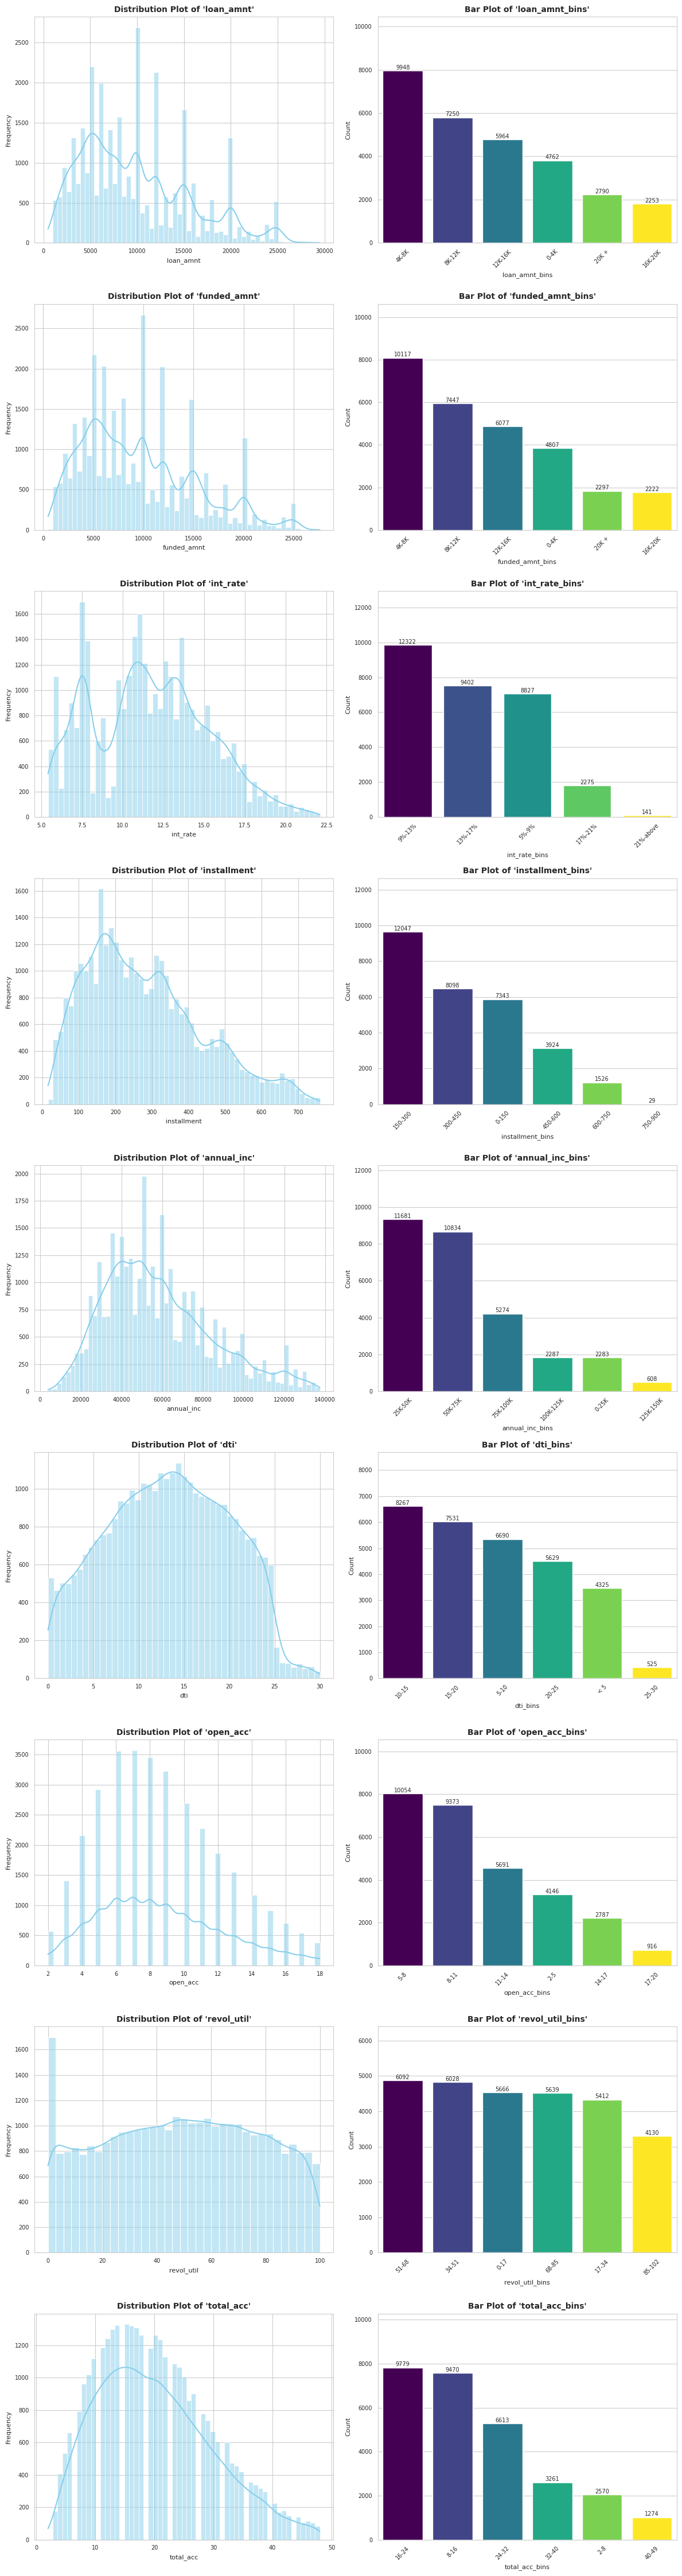

In [45]:
#############################################################
## Plotting Frequency Plot and Bar Plot of Numerical Features
#############################################################


# Define numerical and binned variables
numerical_vars = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_util', 'total_acc']
binned_vars = ['loan_amnt_bins', 'funded_amnt_bins', 'int_rate_bins', 'installment_bins', 'annual_inc_bins', 'dti_bins', 'open_acc_bins', 'revol_util_bins', 'total_acc_bins']

# Set seaborn style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(len(numerical_vars), 2, figsize=(12, 45))  # 2 columns for side-by-side plots

# Iterate through numerical and binned variables
for i in range(len(numerical_vars)):
    num_var = numerical_vars[i]
    bin_var = binned_vars[i]

    # Distribution Plot (first column)
    sns.histplot(df_loan_2_4_2[num_var], kde=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f"Distribution Plot of '{num_var}'", fontsize=10, fontweight='bold')
    axes[i, 0].set_xlabel(num_var, fontsize=8)
    axes[i, 0].set_ylabel('Frequency', fontsize=8)
    axes[i, 0].tick_params(axis='both', labelsize=7)  # Reduce tick label font size

    # Bar Plot of Bins (second column) - with distinct bar colors
    ax = sns.countplot(x=df_loan_2_4_2[bin_var], order=df_loan_2_4_2[bin_var].value_counts(ascending=False).index, ax=axes[i, 1])
    n_bins = len(df_loan_2_4_2[bin_var].unique())  # Number of unique bins
    colors = cm.get_cmap('viridis', n_bins) # Get a colormap (viridis, plasma, etc.) and specify the number of colors

    axes[i, 1].set_title(f"Bar Plot of '{bin_var}'", fontsize=10, fontweight='bold')
    axes[i, 1].set_xlabel(bin_var, fontsize=8)
    axes[i, 1].set_ylabel('Count', fontsize=8)
    axes[i, 1].tick_params(axis='x', rotation=45, labelsize=7) # Reduce tick label font size
    axes[i, 1].tick_params(axis='y', labelsize=7)



    # Add count labels on bars (adjusted vertical position)
    #for p in ax.patches:
    for j, p in enumerate(ax.patches):
        p.set_facecolor(colors(j))  # Set a unique color for each bar
        current_height = p.get_height()
        new_height = current_height * 0.8  # Adjust bar height to make space for labels
        p.set_height(new_height)
        ax.annotate(f'{int(current_height)}', (p.get_x() + p.get_width() / 2., new_height + 5), ha='center', va='bottom', fontsize=7) # Reduce annotation font size


plt.tight_layout()
plt.show()



######################################
### Interpretations / Findings of above plots (Univariate Analysis of Numerical Variables and their Respective bins/buckets ('Charged Off' as well as 'Fully Paid' data)):
######################################

####

* Majority of loans fall within the 8K-12K range (9948 loans), with the second largest group in the adjacent 4-8k range (7250 loans). This suggests a typical loan amount in the mid-range. The funded amounts follow a similar pattern, with the highest frequency in the 8-12k bin (10117 loans) and the second highest in 4-8k (7447 loans). This close alignment between loan amount and funded amount indicates that loan requests are generally being fulfilled within the requested range, with only minor adjustments. This strong correlation might warrant further investigation into discrepancies and their potential impact on default rates.

* majority of loans have interest rates between 9% and 13% (12322 loans), followed by 13%-17% (9402 loans).  This concentration in the mid-range interest rates suggests a potential sweet spot for lenders balancing risk and return.  Additionally, most loan installments fall between 150 and 300 (12047 loans), with the next largest group between 300 and 450 (8098 loans), indicating a typical monthly payment range for borrowers. This installment information could be crucial in assessing affordability and default risk.

* The majority of borrowers report annual incomes between 25K and 50K (11681 borrowers), followed by 50K-75K (10834 borrowers). This suggests a concentration of borrowers in the middle-income range.  A large portion of borrowers have debt-to-income ratios between 10 and 15 (8267 borrowers), closely followed by the 15-20 range (7531 borrowers). This indicates a significant portion of borrowers with moderate to moderately high debt burdens relative to their income, which could be a factor in loan default prediction.

* Most borrowers have between 5 and 8 open credit lines (10054 borrowers), followed by 8-11 open accounts (9373 borrowers). This suggests a moderate number of active credit accounts is common among the borrowers. Revolving credit utilization is fairly evenly distributed across the lower utilization bins, with a slight peak between 51 and 68 (6092 borrowers), and only slightly lower usage in the 34-51 range (6028 borrowers).  This relatively even distribution might indicate a diverse range of credit management practices among the borrowers, which warrants further investigation into how utilization rates affect default risk.

* The most common total account range among borrowers is 16-24 (9779 borrowers), followed closely by 8-16 accounts (9470 borrowers). This suggests a general trend of established credit histories among the loan applicants.  Analyzing default rates across these bins could reveal whether a longer credit history correlates with lower default risk. This information may be valuable for credit scoring and risk assessment models.


####

#########################################################################################################
## 3.1.2 Univariate Analysis of Categorical Variables ('Charged Off' as well as 'Fully Paid' data):
#########################################################################################################

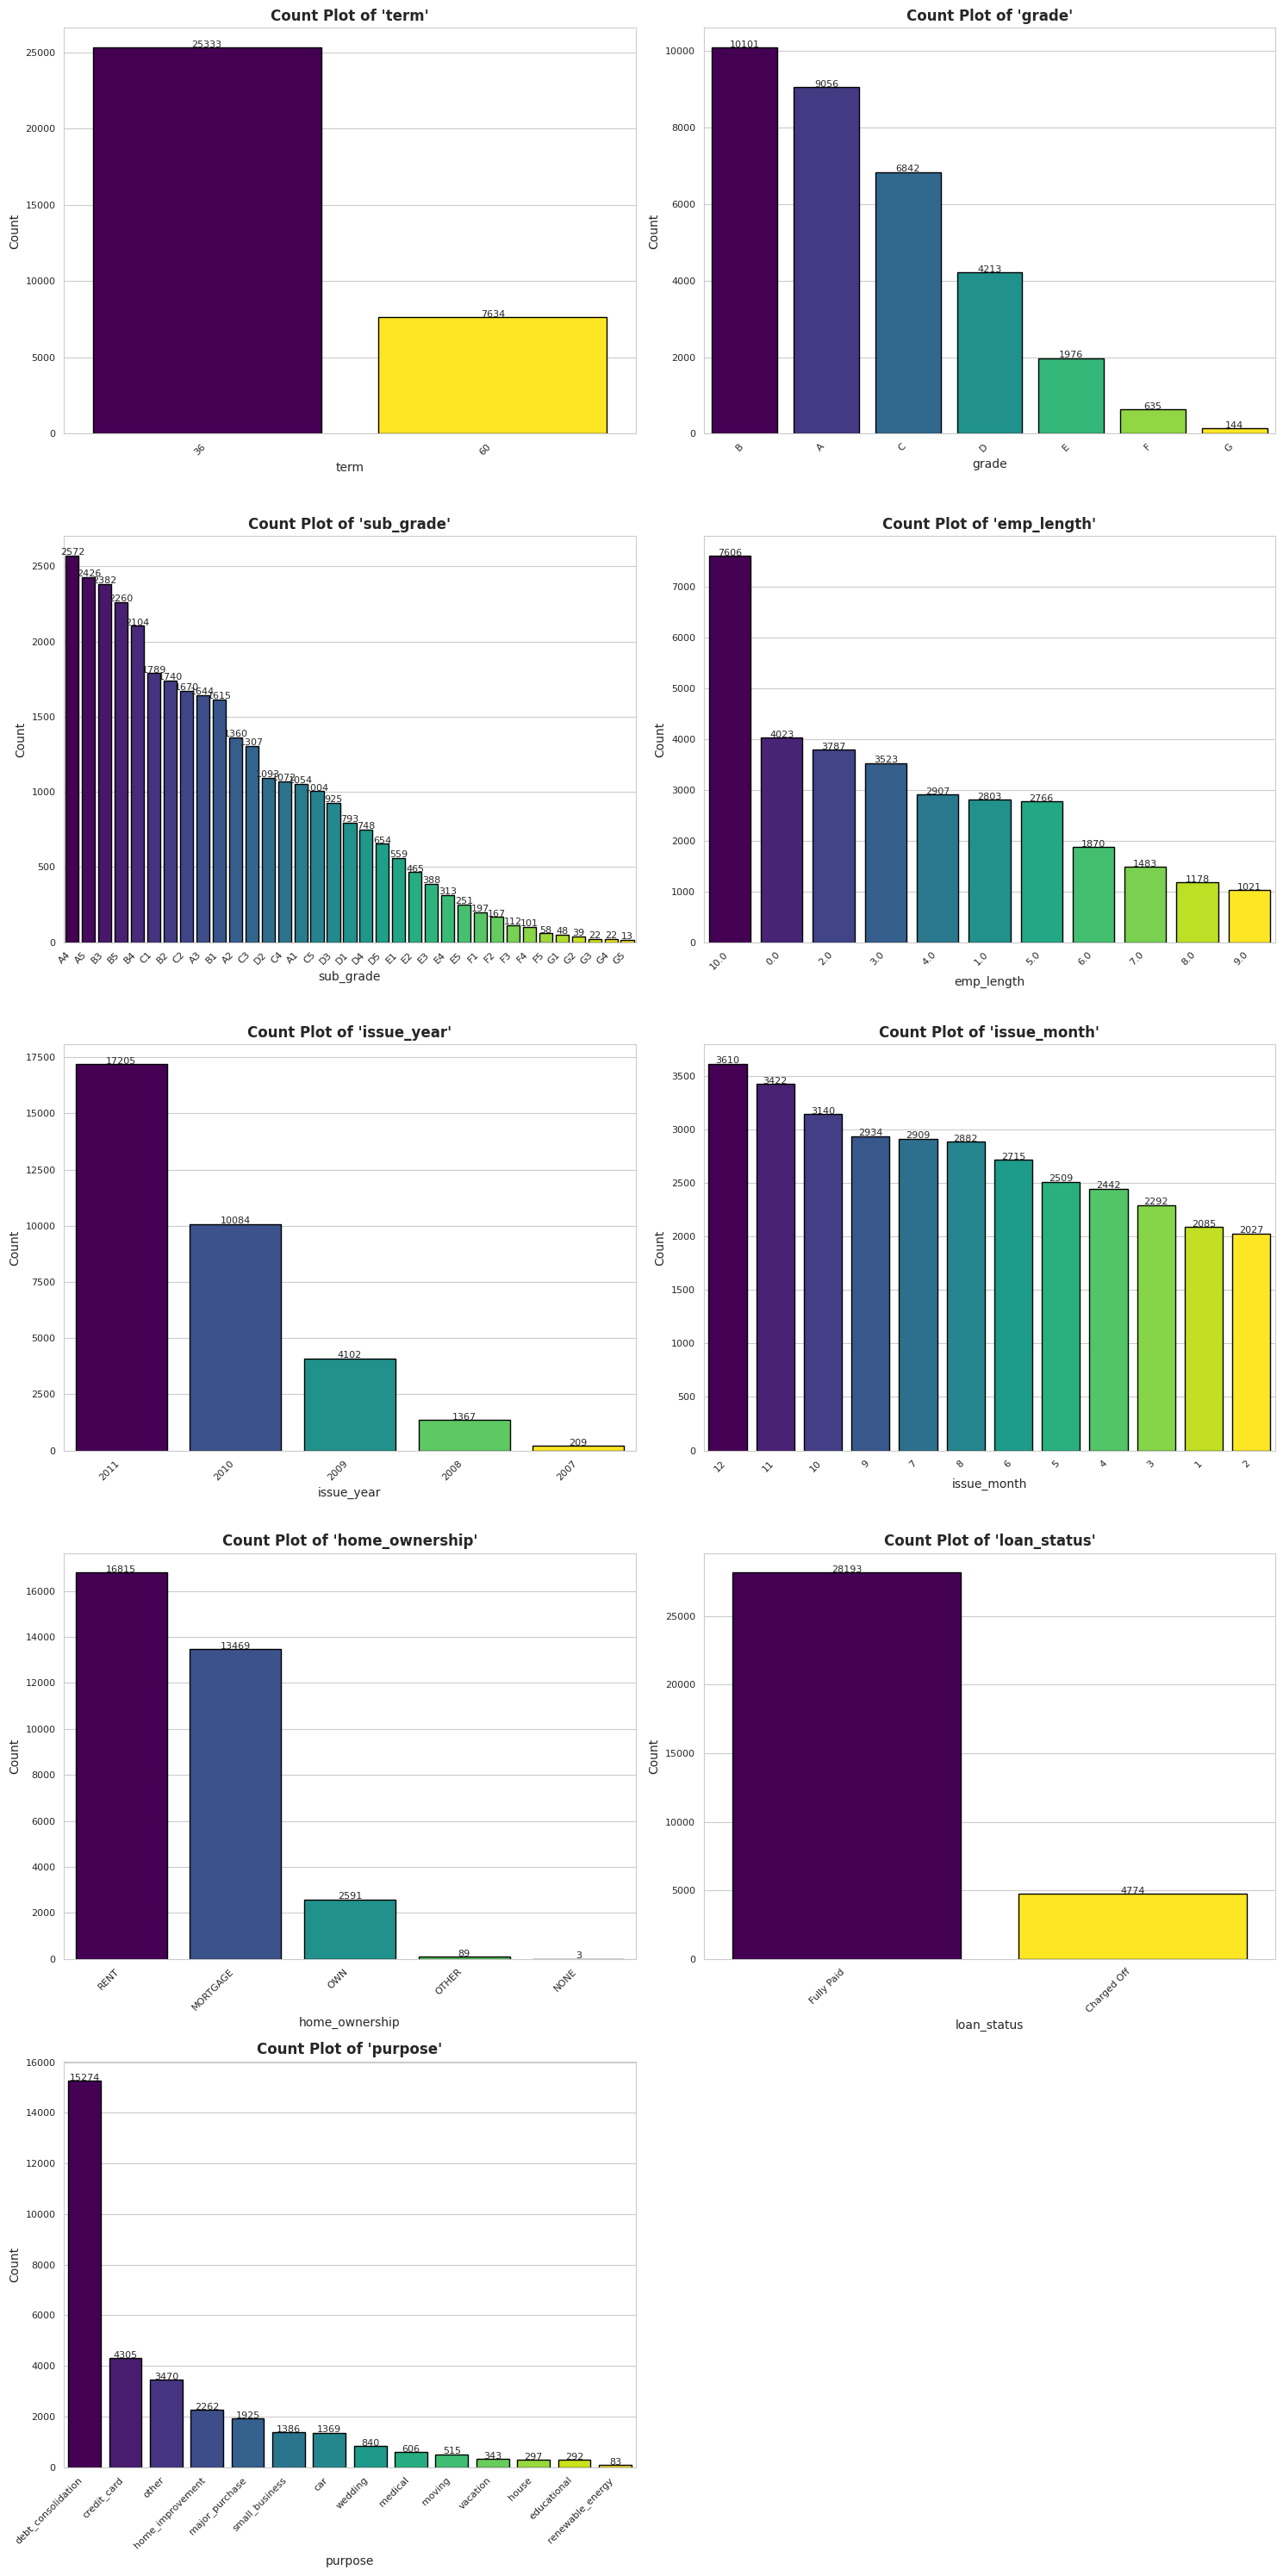

In [46]:
# Categorical variables to analyze
categorical_vars = ['term', 'grade', 'sub_grade', 'emp_length', 'issue_year', 'issue_month', 'home_ownership', 'loan_status', 'purpose']

# Set seaborn style
sns.set_style("whitegrid")

# Calculate number of rows for 2 columns
n_rows = math.ceil(len(categorical_vars) / 2)

# Create subplots with 2 columns and adjusted figsize
fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 6))

# Iterate through categorical variables
for i, cat_var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Calculate number of categories and get colors from colormap
    n_categories = len(df_loan_2_4_2[cat_var].unique())
    colors = cm.get_cmap('viridis', n_categories)

    # Create countplot with distinct bar colors
    sns.countplot(
        x=df_loan_2_4_2[cat_var],
        order=df_loan_2_4_2[cat_var].value_counts(ascending=False).index,
        ax=ax,
        edgecolor='black',
        linewidth=1,
    )

    # Set individual bar colors
    for j, p in enumerate(ax.patches):
        p.set_facecolor(colors(j))

    # Set title and labels with reduced font sizes
    ax.set_title(f"Count Plot of '{cat_var}'", fontsize=12, fontweight='bold')
    ax.set_xlabel(cat_var, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

    # Rotate x-axis labels and reduce tick label font size
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
    ax.tick_params(axis='y', labelsize=8)

    # Add value labels to bars with reduced font size
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 5, int(height), ha="center", fontsize=8)

        
if len(categorical_vars) % 2 != 0:
    fig.delaxes(axes[n_rows - 1, 1])  # Remove the last subplot

# Adjust layout to prevent overlapping and show plot
plt.tight_layout()
plt.show()



#######################################
### Interpretations / Findings of above plots (Univariate Analysis of Categorical Variables ('Charged Off' as well as 'Fully Paid' data)):
#######################################

######

* The majority of loans have a 36-month term (25333 loans), with a significantly smaller portion having a 60-month term (7634 loans).  Loan grades are concentrated in the higher categories, with B being the most frequent (10101 loans), followed by A (9056 loans). 

* The distribution of sub-grades shows a decreasing trend, highest for A4 and B3 sub-grades (2572 and 2426 loans respectively), suggesting a clustering within those specific sub-grade categories.  In terms of employment length, most borrowers report 10+ years of employment (7606 borrowers), while the second largest group is those with less than 1 year of experience (4023 borrowers). This distribution might indicate a relationship between employment stability and loan applications.  Further analysis could explore if longer employment lengths correlate with lower default rates.


* A large number of loans were issued in 2011 (17205 loans), with a substantial drop in previous years.  This suggests a potential influence of external economic factors on loan origination volumes. The distribution of loan issue months shows a relatively consistent pattern across the year, with a slight peak in December (3610 loans) and November (3422 loans). This could reflect year-end financial activities or seasonal trends. 


* Most borrowers are renters (16815 borrowers), followed by those with mortgages (13469 borrowers).  This distribution is important for understanding the borrower's financial stability and potential risk.  As expected, the majority of loans are fully paid (28193 loans), while a smaller portion are charged off (4774 loans). This provides a baseline understanding of loan performance within the dataset.


* The most common loan purpose is debt consolidation (15274 loans), followed by credit card refinancing (4305 loans).  This strong emphasis on debt consolidation suggests that many borrowers are using these loans to manage existing debt, a crucial factor to consider when assessing risk.  The distribution of loan purposes provides valuable insight into borrower behavior and could be a key factor in predicting loan defaults.

######

###########################################################################
# 3.2 Univariate Analysis ('Charged Off' data only)
###########################################################################

######

##### Here we will use filtered dataframe where only 'Charged Off' category of 'loan_status' is considered. 
##### So only 4774 records will be considered. Again which don't have any outliers or missing data.
######

* **Justification for using only 'Charged off' category records** :

    * For filtered univariate analysis, we are focusing on "Charged Off" loans because it only represents loan defaults. 
    * By filtering the data, we isolate the characteristics and patterns specifically associated with loan defaults, which allows us to gain a more targeted understanding of the factors that contribute to default. 
    * Analyzing the entire dataset would dilute the insights related to defaults, as it would include loans that were fully paid.
    
######

* We will perform univariate analysis of following variables:

    * 3.2.1 Numerical Variables and respective bins/buckets:
        
        1. loan_amnt / loan_amnt_bins 
        2. funded_amnt / funded_amnt_bins
        3. int_rate / int_rate_bins
        4. installment / installment_bins
        5. annual_inc /annual_inc_bins
        6. dti / dti_bins 
        7. open_acc_bins
        8. revol_util_bins
        9. total_acc_bins <br><br>
        

    * 3.2.2 Categorical Variables:

        1. term
        2. grade
        3. sub_grade
        4. emp_length
        5. issue_year 
        6. issue_month 
        7. home_ownership
        8. loan_status 
        9. purpose

######

##############################
## 3.2.1 Univariate Analysis ('Charged Off' data only) of Numerical Variables and respective bins/buckets:
##############################

In [47]:
#############################################
## Creating filtered Dataframe for Filtered Univariate Analysis
#############################################

# As mentioned before, for univariate analysis, we are focusing on "Charged Off" loans because it represents loan defaults. 

# Create filtered DataFrame for Charged Off loans
df_loan_3_charged_off = df_loan_2_4_2[df_loan_2_4_2['loan_status'] == 'Charged Off'].copy()

# Let's check shape of the dataframe
df_loan_3_charged_off.shape

(4774, 33)

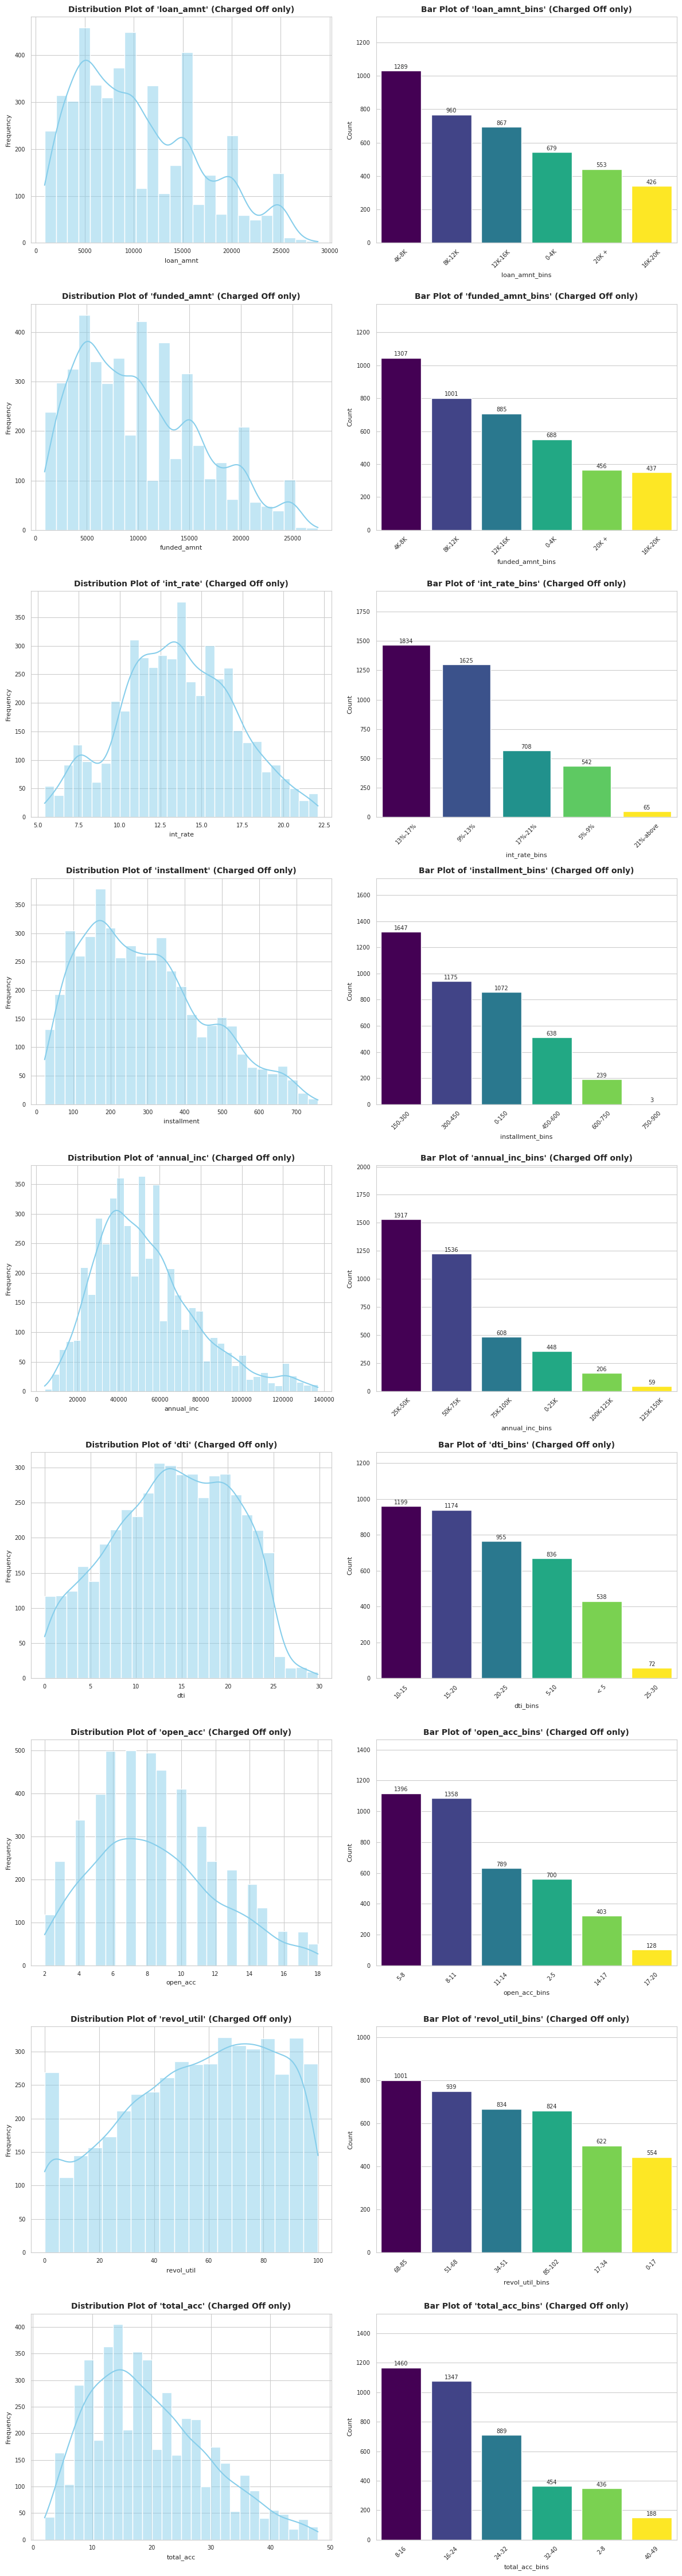

In [48]:
#############################################################
## Plotting Frequency Plot and Bar Plot of Numerical Features
#############################################################

# Define numerical and binned variables
numerical_vars = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_util', 'total_acc']
binned_vars = ['loan_amnt_bins', 'funded_amnt_bins', 'int_rate_bins', 'installment_bins', 'annual_inc_bins', 'dti_bins', 'open_acc_bins', 'revol_util_bins', 'total_acc_bins']

# Set seaborn style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(len(numerical_vars), 2, figsize=(12, 45))  # 2 columns for side-by-side plots

# Iterate through numerical and binned variables
for i in range(len(numerical_vars)):
    num_var = numerical_vars[i]
    bin_var = binned_vars[i]

    # Distribution Plot (first column)
    sns.histplot(df_loan_3_charged_off[num_var], kde=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f"Distribution Plot of '{num_var}' (Charged Off only)", fontsize=10, fontweight='bold')
    axes[i, 0].set_xlabel(num_var, fontsize=8)
    axes[i, 0].set_ylabel('Frequency', fontsize=8)
    axes[i, 0].tick_params(axis='both', labelsize=7)  # Reduce tick label font size

    # Bar Plot of Bins (second column) - with distinct bar colors
    ax = sns.countplot(x=df_loan_3_charged_off[bin_var], order=df_loan_3_charged_off[bin_var].value_counts(ascending=False).index, ax=axes[i, 1])
    n_bins = len(df_loan_3_charged_off[bin_var].unique())  # Number of unique bins
    colors = cm.get_cmap('viridis', n_bins) # Get a colormap (viridis, plasma, etc.) and specify the number of colors

    axes[i, 1].set_title(f"Bar Plot of '{bin_var}' (Charged Off only)", fontsize=10, fontweight='bold')
    axes[i, 1].set_xlabel(bin_var, fontsize=8)
    axes[i, 1].set_ylabel('Count', fontsize=8)
    axes[i, 1].tick_params(axis='x', rotation=45, labelsize=7) # Reduce tick label font size
    axes[i, 1].tick_params(axis='y', labelsize=7)



    # Add count labels on bars (adjusted vertical position)
    #for p in ax.patches:
    for j, p in enumerate(ax.patches):
        p.set_facecolor(colors(j))  # Set a unique color for each bar
        current_height = p.get_height()
        new_height = current_height * 0.8  # Adjust bar height to make space for labels
        p.set_height(new_height)
        ax.annotate(f'{int(current_height)}', (p.get_x() + p.get_width() / 2., new_height + 5), ha='center', va='bottom', fontsize=7) # Reduce annotation font size


plt.tight_layout()
plt.show()



######################################
### Interpretations / Findings of above plots (Univariate Analysis of Numerical Variables and their Respective bins/buckets ('Charged Off' data only)):
######################################

####

* Focusing on charged-off loans, the distribution and binned analysis of loan and funded amounts reveal important insights into default patterns.  The most common loan amounts for defaulted loans fall within the 4k-8k range (1289 loans), followed by 8k-12k (960 loans). This pattern is mirrored in the funded amounts, with the 4k-8k bin having the highest defaults (1307 loans) and the 8k-12k bin following closely (1001 loans).  This similarity suggests that the funded amount closely tracks the loan amount for defaulted loans, and the higher frequency of defaults in the lower loan/funded amount ranges indicates a potential correlation between smaller loan sizes and higher default risk. This observation warrants further investigation into the factors contributing to these defaults.

* Among charged-off loans, the most common interest rates are between 13% and 17% (1834 loans), followed by 9% and 13% (1625 loans). This concentration of defaults in the mid-range interest rates suggests that these loans might represent a higher risk segment for lenders. A majority of defaulted loans have installments between 150 and 300 (1647 loans), followed by 300-450 (1175 loans).  This concentration of defaults within the typical installment range indicates that affordability, while a factor, is not the sole driver of loan defaults. Other factors, such as unexpected life events or changes in financial circumstances, might play a significant role and warrant further investigation.

* The majority of loan defaulters have annual incomes between 25k and 50k (1917 defaults), with the next largest group earning between 50k-75k (1536 defaults). This concentration in the mid-income range suggests that income level alone is not a strong indicator of default risk. The distribution of debt-to-income ratios (DTI) among defaulters shows that the most frequent DTI range is 10-15 (1199 defaults), closely followed by 15-20 (1174 defaults).  This high frequency of defaults in the moderate to moderately-high DTI ranges indicates a potential link between higher debt burdens and increased default risk.  Further analysis should explore how DTI interacts with other variables to influence default prediction.

* Among defaulted loans, the most frequent number of open credit lines is between 5 and 8 (1396 defaults), followed closely by 8-11 open accounts (1358 defaults). This suggests that having a moderate number of open accounts is common among defaulters. The revolving credit utilization shows a more even distribution across the bins, with the highest number of defaults occurring when utilization is between 68% and 85% (1001 defaults), followed by 51%-68% utilization (939 defaults).  This relatively even distribution of defaults across utilization rates suggests that while high utilization might be a risk factor, it's not the sole determinant of default.  Other factors, possibly in conjunction with high utilization, likely contribute to defaults.

* For defaulted loans, the distribution of total accounts (open and closed) peaks between 15 and 25, with the binned analysis showing the highest number of defaults occurring for borrowers with 8-16 total accounts (1460 defaults), followed by 16-24 accounts (1347 defaults).  This suggests that having a moderate to high number of total accounts is common among those who default.  Further analysis could explore if the types of accounts held (credit cards, installment loans, etc.) within this total number influence the likelihood of default.


####

########################################################################################
## 3.2.2 Univariate Analysis ('Charged off' data only) of Categorical Variables:
########################################################################################

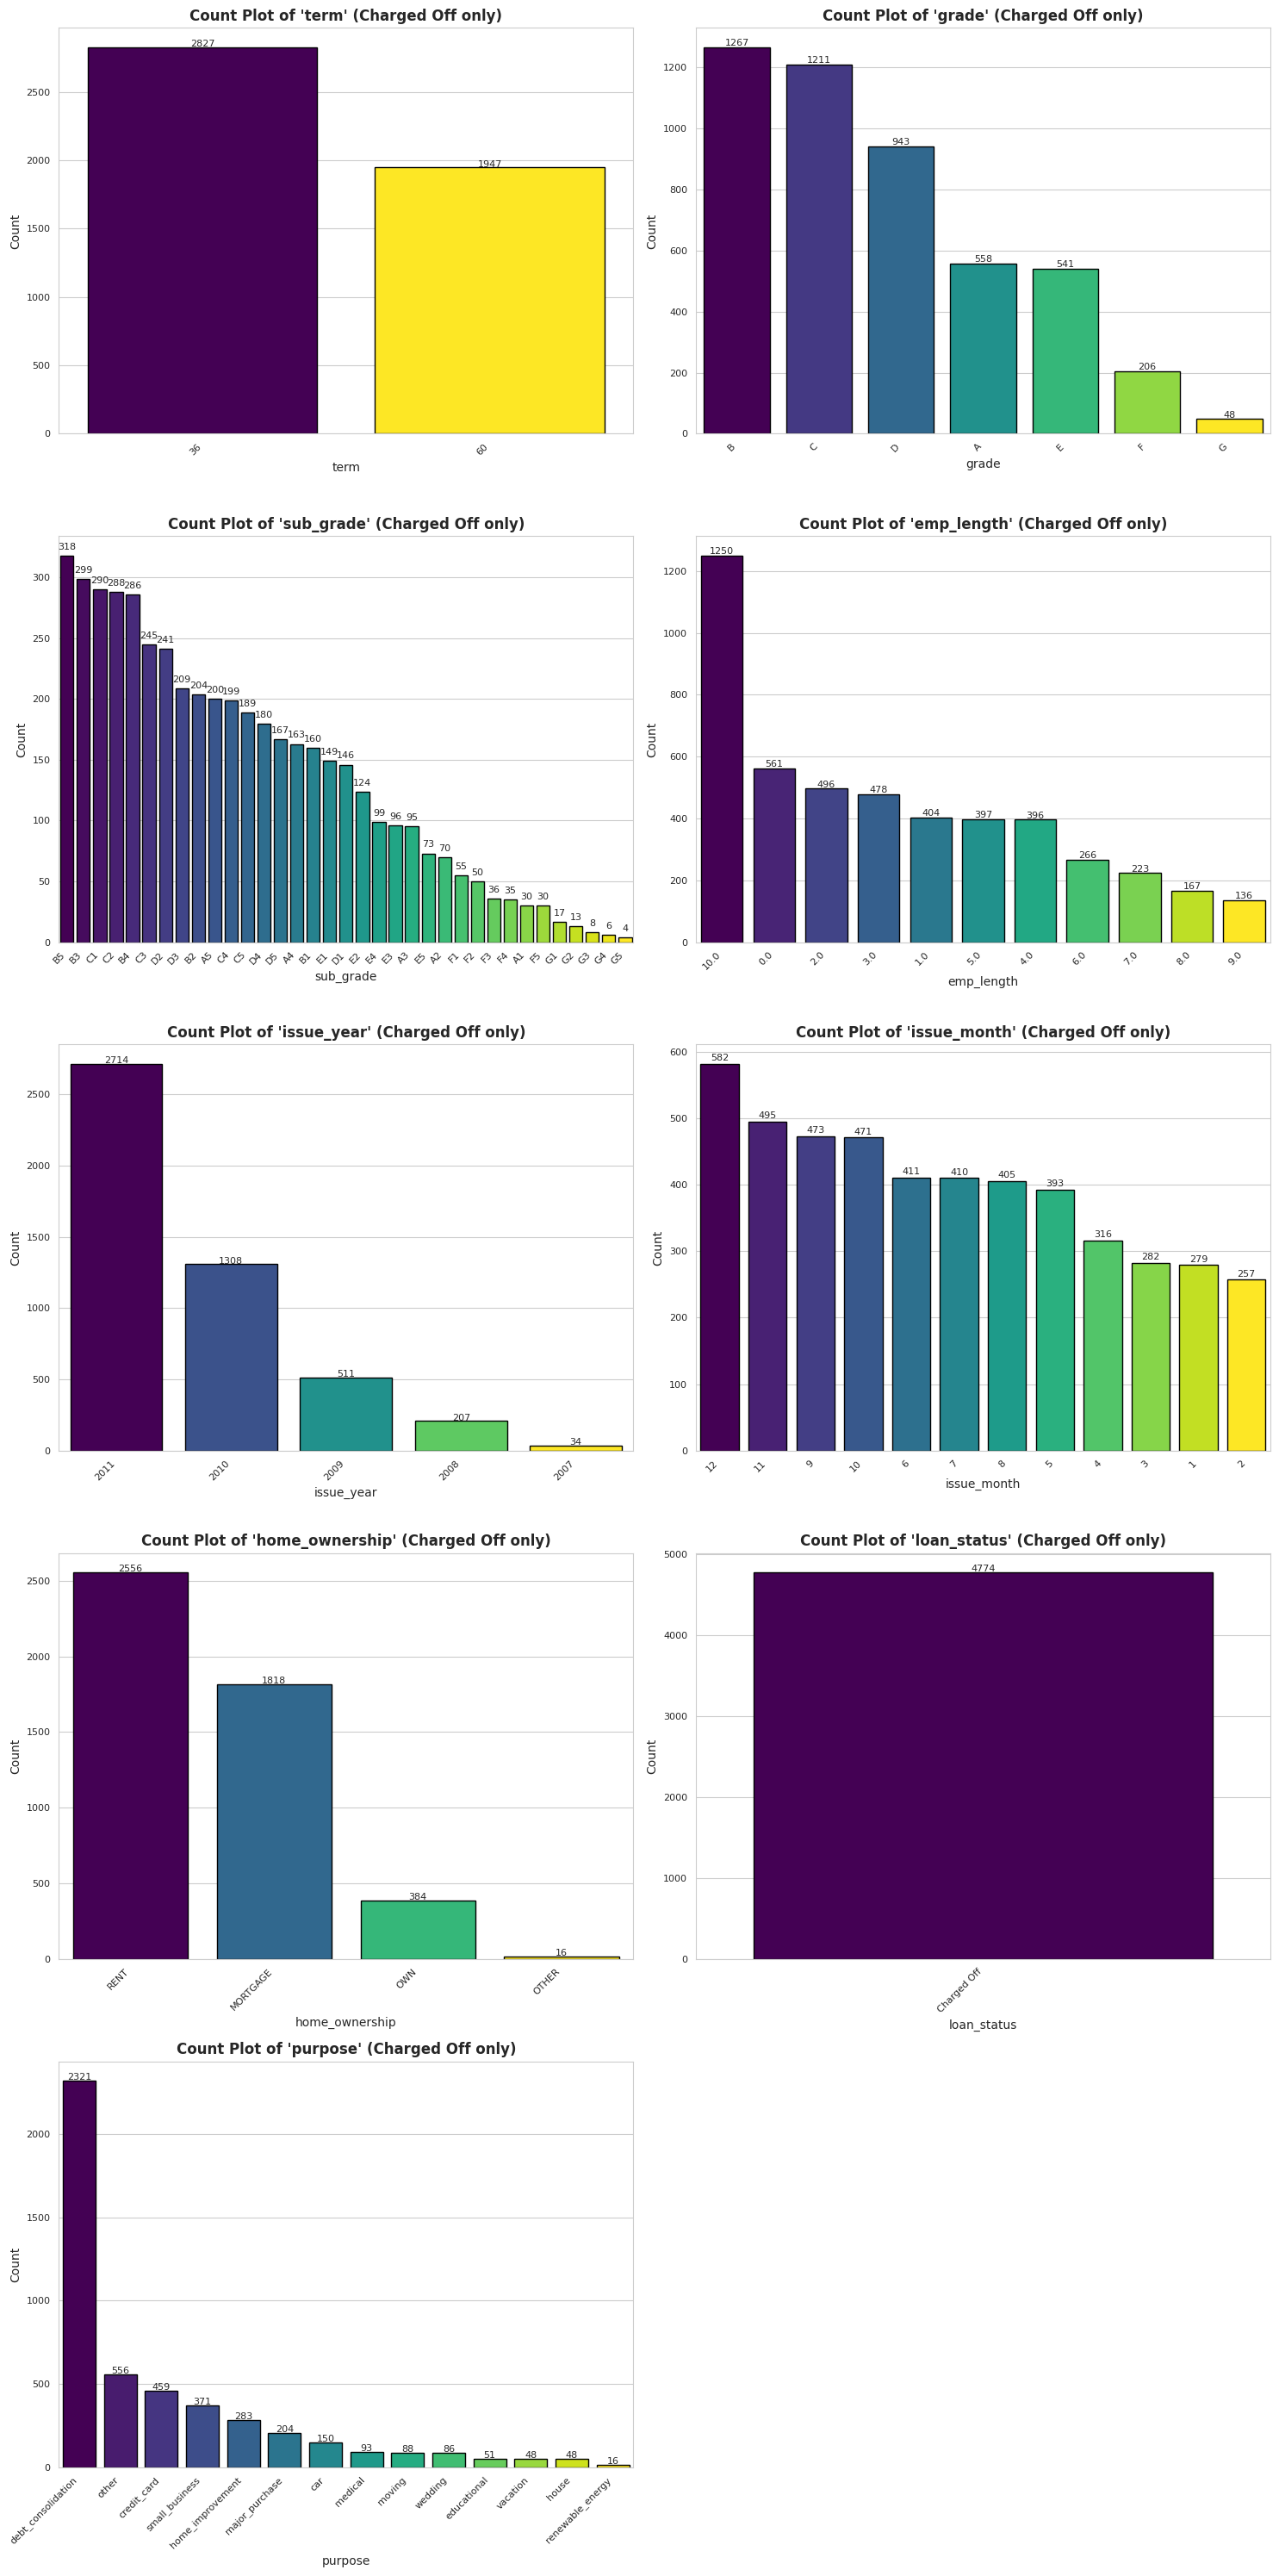

In [49]:
# Categorical variables to analyze
categorical_vars = ['term', 'grade', 'sub_grade', 'emp_length', 'issue_year', 'issue_month', 'home_ownership', 'loan_status', 'purpose']

# Set seaborn style
sns.set_style("whitegrid")

# Calculate number of rows for 2 columns
n_rows = math.ceil(len(categorical_vars) / 2)

# Create subplots with 2 columns and adjusted figsize
fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 6))

# Iterate through categorical variables
for i, cat_var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Calculate number of categories and get colors from colormap
    n_categories = len(df_loan_3_charged_off[cat_var].unique())
    colors = cm.get_cmap('viridis', n_categories)

    # Create countplot with distinct bar colors
    sns.countplot(
        x=df_loan_3_charged_off[cat_var],
        order=df_loan_3_charged_off[cat_var].value_counts(ascending=False).index,
        ax=ax,
        edgecolor='black',
        linewidth=1,
    )

    # Set individual bar colors
    for j, p in enumerate(ax.patches):
        p.set_facecolor(colors(j))

    # Set title and labels with reduced font sizes
    ax.set_title(f"Count Plot of '{cat_var}' (Charged Off only)", fontsize=12, fontweight='bold')
    ax.set_xlabel(cat_var, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

    # Rotate x-axis labels and reduce tick label font size
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
    ax.tick_params(axis='y', labelsize=8)

    # Add value labels to bars with reduced font size
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 5, int(height), ha="center", fontsize=8)

        
if len(categorical_vars) % 2 != 0:
    fig.delaxes(axes[n_rows - 1, 1])  # Remove the last subplot

# Adjust layout to prevent overlapping and show plot
plt.tight_layout()
plt.show()



######################################
### Findings of above plots (Univariate Analysis of Categorical Variables ('Charged Off' data only)):
######################################

####

* A significant portion of defaults are associated with 36-month loan terms (2827 defaults), while 60-month term defaults are also substantial (1947 defaults).  Loan grades B and C show the highest number of defaults (1267 and 1211, respectively), indicating a higher risk associated with these grades. The sub-grade distribution provides a more granular view, with B5 and C1 being the most frequent sub-grades among defaults (318 and 299, respectively). 

* Borrowers with 10+ years of employment length have the highest number of defaults (1250 defaults), followed by those with < 1 year (561 defaults). This is counterintuitive and suggests that longer employment history doesn't necessarily guarantee lower default risk. Further investigation is needed to understand the factors contributing to defaults within this group.

* The majority of charged-off loans were issued in 2011 (2714 defaults), with a substantial drop in subsequent years. This could be due to changes in lending practices, economic conditions, or a combination of factors.  December (582 defaults) and November (495 defaults) have the highest number of defaults. Defaults generally occur across all months, with a slight increase towards the end of the year. This could be related to seasonal spending patterns or financial pressures around the holidays. 

* Renters represent the largest group of defaulters (2556 defaults), followed by those with mortgages (1818 defaults). This aligns with the general population distribution, where renting and mortgages are the most common housing situations.  Debt consolidation remains the primary purpose for loans that end up defaulting (2321 defaults).  This suggests that borrowers facing financial difficulties might be using debt consolidation loans as a last resort, which unfortunately doesn't always prevent default.  The distribution of other loan purposes among defaulters largely mirrors the overall distribution of loan purposes, with 'other,' 'credit_card,' and 'small_business' being the next most common.

####

#####################
# 3.3 Segmented Univariate Analysis ('Charged Off' as well as 'Fully Paid' Data)
#####################


### 3.3.1 Loan Status (`loan_status`) Segmented by:

    1.  Purpose:  Analyze the default rates (`loan_status = Charged Off`) across different loan purposes.  This can identify high-risk loan categories.  (Bar chart)
    2.  Grade:  Compare default rates across loan grades. This validates the grading system and identifies any misclassifications. (Bar chart)
    3.  Home Ownership: See if homeowners, renters, etc. have different default tendencies.  (Bar chart)
    4.  Employment Length:  Check if employment stability (longer employment length) correlates with lower default rates. (Bar chart)
    5.  Loan Amount (Bins): Analyze default rates across different loan amount ranges. This can reveal if larger loans are more prone to default. (Bar chart)
    6.  Interest Rate (Bins):  Examine default rates across interest rate ranges.  Higher interest rates might indicate higher risk, but this needs to be validated. (Bar chart)
    7.  Annual Income (Bins): Explore default rates across income brackets. Lower-income borrowers might be expected to have higher default rates. (Bar chart)
    8.  DTI (Bins): Analyze default rates across DTI ranges.  Higher DTI suggests a greater debt burden and potentially higher default risk. (Bar chart)
    9.  Term: Compare default rates for different loan terms (e.g., 36 months vs. 60 months). Longer terms could have higher cumulative default risk. (Bar chart)
    10. Issue Month: Check for any seasonal patterns in loan defaults by analyzing default rates across different issue months. (Bar chart)
    
####


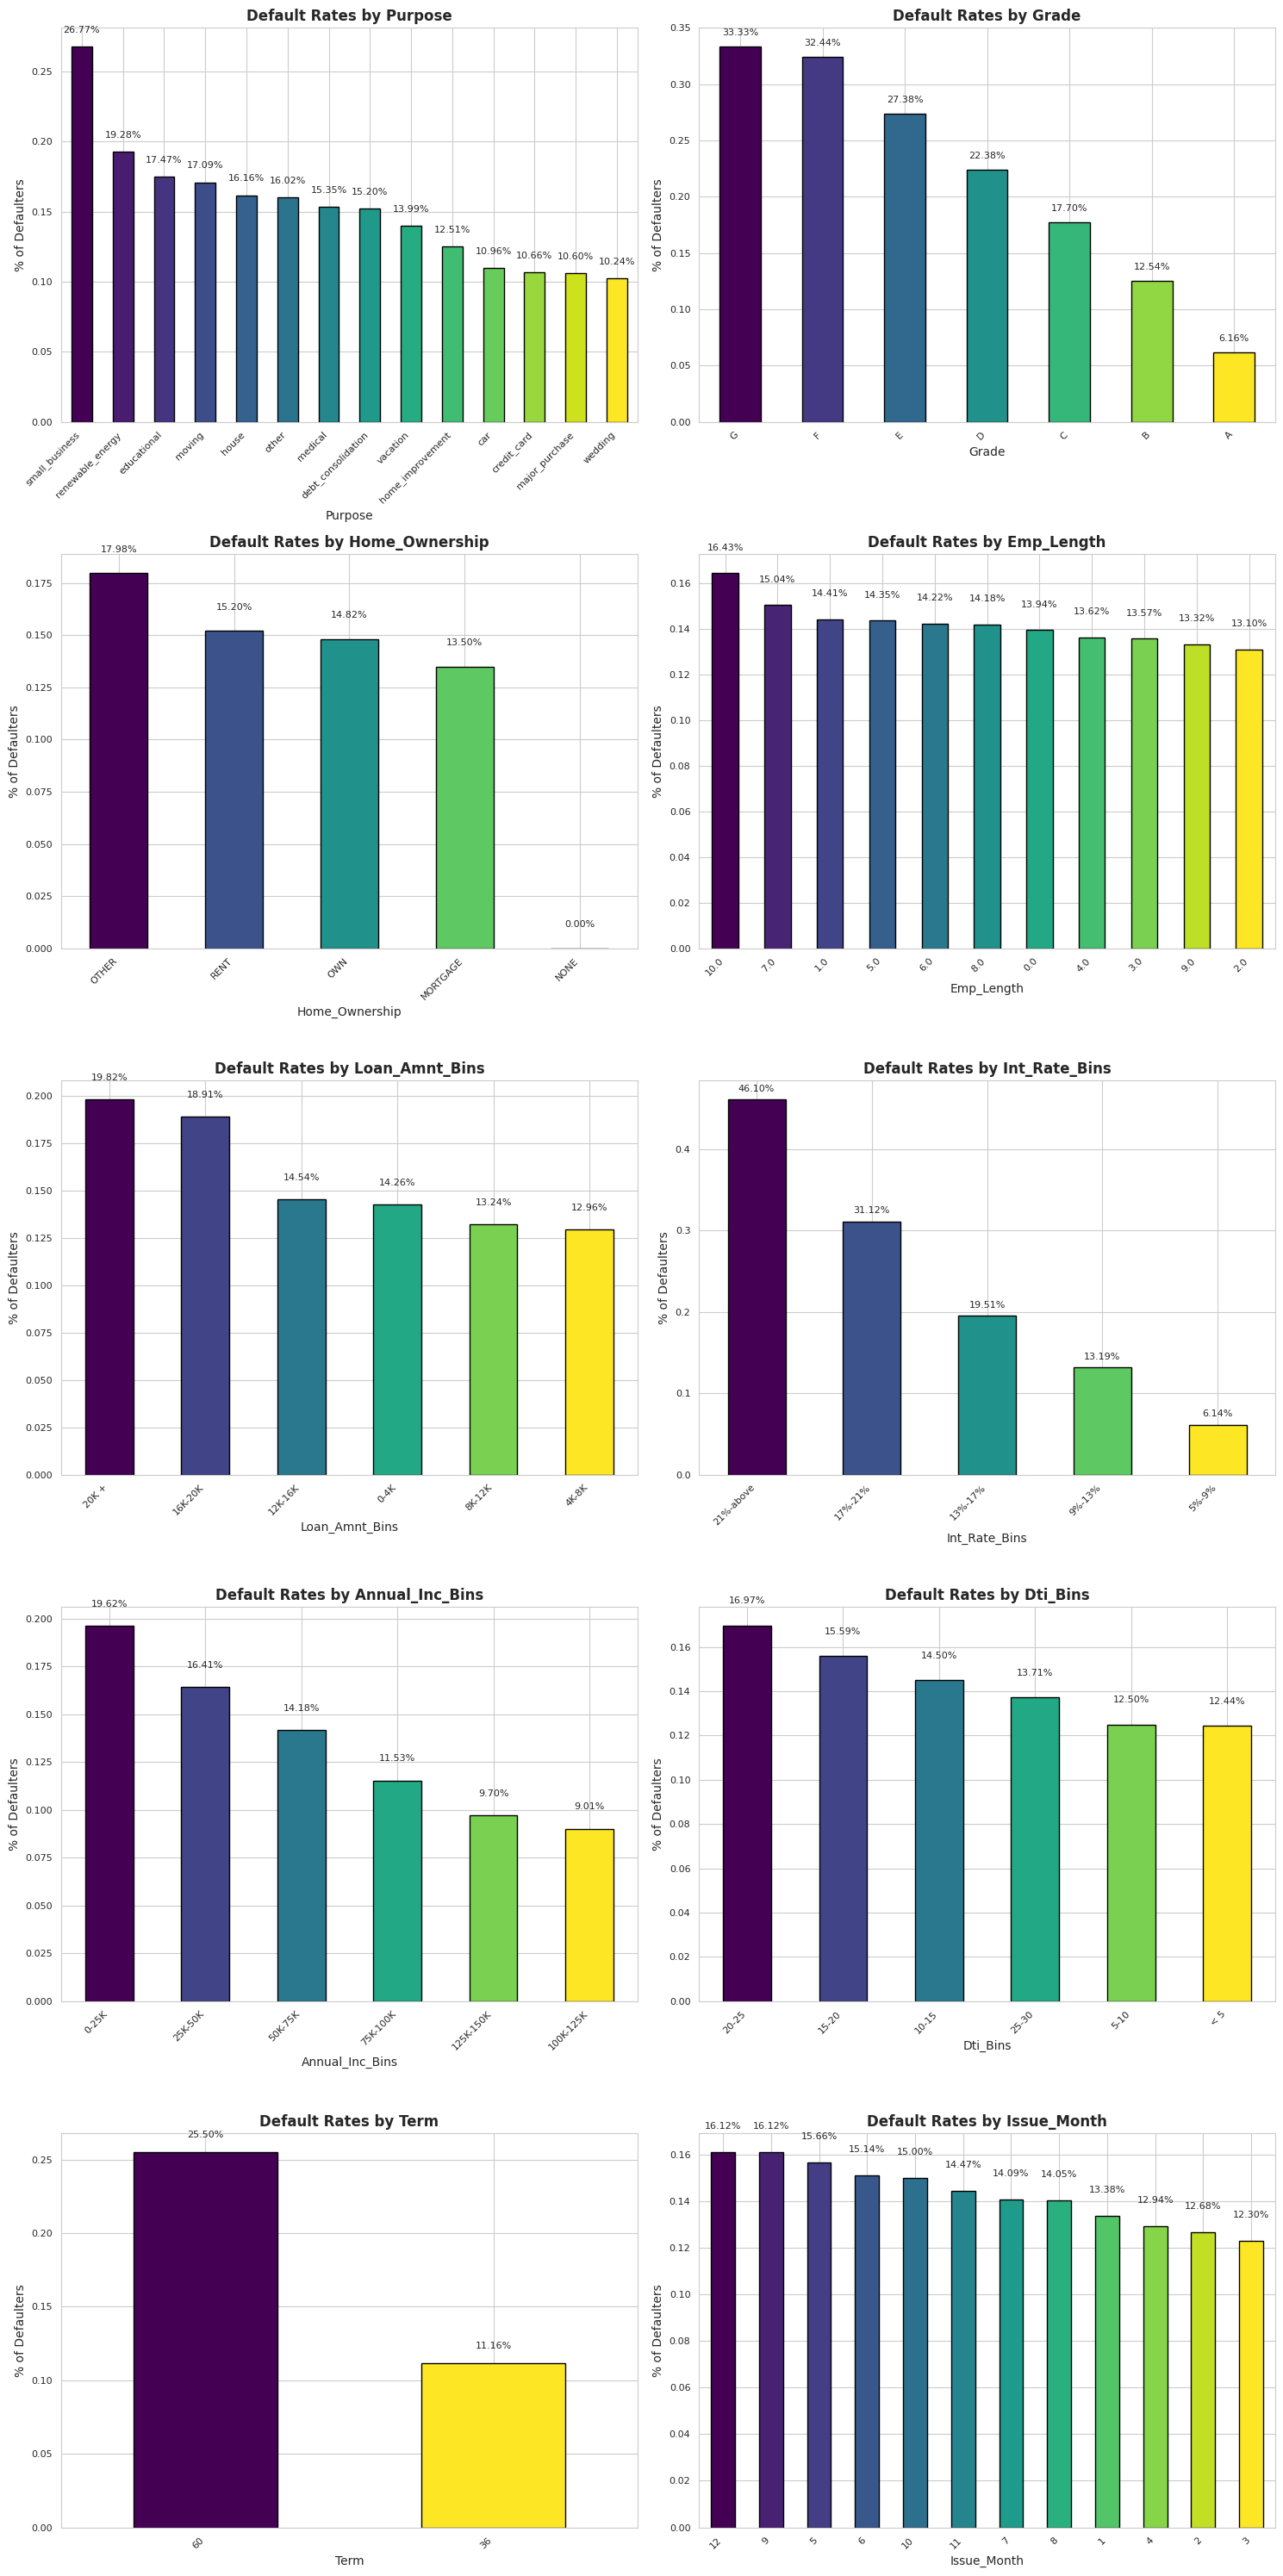

In [50]:
# Set seaborn style
sns.set_style("whitegrid")

# Variables for segmentation
segmentation_vars = ['purpose', 'grade', 'home_ownership', 'emp_length', 'loan_amnt_bins', 'int_rate_bins', 'annual_inc_bins', 'dti_bins', 'term', 'issue_month']

# Calculate the number of rows for subplots
n_rows = math.ceil(len(segmentation_vars) / 2)

# Create subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 6))

# Iterate through segmentation variables
for i, seg_var in enumerate(segmentation_vars):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Calculate default rates
    default_rates = df_loan_2_4_2.groupby(seg_var)['loan_status'].value_counts(normalize=True).unstack()
    default_rates = default_rates.sort_values(by='Charged Off', ascending=False)

    # Plotting with distinct colors
    num_categories = len(default_rates.index)  # Number of categories for color mapping
    colors = cm.get_cmap('viridis', num_categories) # Get a colormap
    default_rates['Charged Off'].plot(kind='bar', ax=ax, color = colors(range(num_categories)), edgecolor='black', linewidth=1)

    # Set title and labels
    ax.set_title(f"Default Rates by {seg_var.title()}", fontsize=12, fontweight='bold')
    ax.set_xlabel(seg_var.title(), fontsize=10)
    ax.set_ylabel("% of Defaulters", fontsize=10)

    # Rotate x-axis labels and adjust font size
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Set 'ha' here
    ax.tick_params(axis='y', labelsize=8)


    # Add percentage value labels to bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f"{height:.2%}", ha="center", fontsize=8)


# Remove the last empty subplot if the number of plots is odd
if len(segmentation_vars) % 2 != 0:
    fig.delaxes(axes[n_rows - 1, 1])


plt.tight_layout()
plt.show()


######
#### NOTE: Findings of above plot are mentioned after 3.3.7 point. Basically, I have mentioned all the findings of Segmented Univariate Analysis after point 3.3.7 in conolidated manner after plotting all the Segmennted Univariate plots.
######

##############################
### 3.3.2 Annual Income Segmented by:
##############################

    1. Grade:  See how income distribution changes with loan grade.  Lower grades might have lower incomes, or a wider spread. (Violin plot, Bar Plot)
    2. Home Ownership:  Analyze income differences across homeownership categories to validate homeownership as a proxy for financial stability. (Violin plot, Bar Plot)
    3. Loan Status:  Compare income distributions for charged-off loans vs. fully paid loans.  (Violin plot, Bar Plot)
    

####

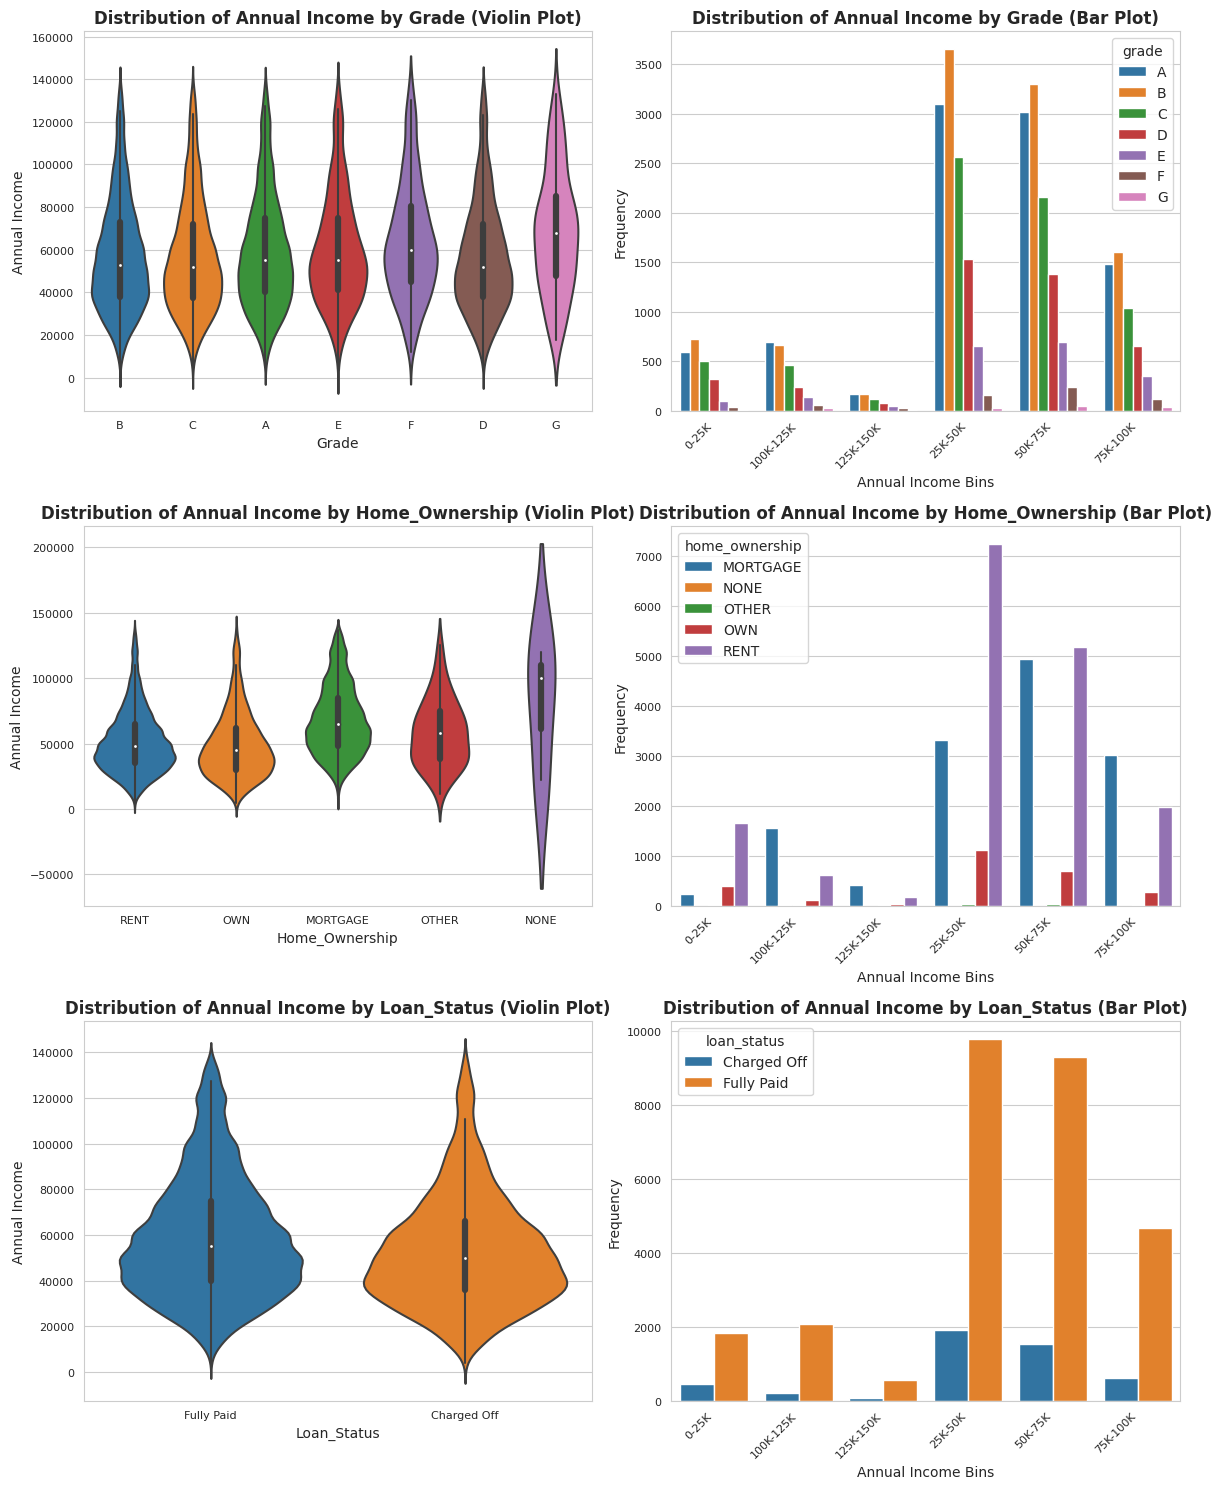

In [51]:
sns.set_style("whitegrid")

segmentation_vars = ['grade', 'home_ownership', 'loan_status']
plot_types = ['violin', 'hist']

fig, axes = plt.subplots(len(segmentation_vars), len(plot_types), figsize=(12, 5 * len(segmentation_vars)))

for i, seg_var in enumerate(segmentation_vars):
    for j, plot_type in enumerate(plot_types):
        ax = axes[i, j]

        if plot_type == 'hist':
            if seg_var == 'loan_status':
                bin_counts = df_loan_2_4_2.groupby(['loan_status', 'annual_inc_bins']).size().reset_index(name='count')
                sns.barplot(data=bin_counts, x='annual_inc_bins', y='count', hue='loan_status', ax=ax)
            else:
                bin_counts = df_loan_2_4_2.groupby([seg_var, 'annual_inc_bins']).size().reset_index(name='count')
                sns.barplot(data=bin_counts, x='annual_inc_bins', y='count', hue=seg_var, ax=ax)

            ax.set_xlabel("Annual Income Bins", fontsize=10)
            ax.set_ylabel("Frequency", fontsize=10)
            ax.set_title(f'Distribution of Annual Income by {seg_var.title()} (Bar Plot)', fontsize=12, fontweight='bold')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)

        else:  # plot_type == 'violin'
            sns.violinplot(data=df_loan_2_4_2, x=seg_var, y='annual_inc', ax=ax)
            ax.set_xlabel(seg_var.title(), fontsize=10)
            ax.set_ylabel("Annual Income", fontsize=10)
            ax.set_title(f'Distribution of Annual Income by {seg_var.title()} (Violin Plot)', fontsize=12, fontweight='bold')

        ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()



#### NOTE: Findings of above plot are mentioned after 3.3.7 point. Basically, I have mentioned all the findings of Segmented Univariate Analysis after point 3.3.7 in conolidated manner after plotting all the Segmennted Univariate plots.

##############################################
### 3.3.3 DTI (Debt-to-Income Ratio) Segmented by:
##############################################

      1. Grade:  Check if DTI increases with lower loan grades (higher risk). (Violin plot)
      2. Employment Length:  See if shorter employment lengths correlate with higher DTIs, indicating potential instability. (Violin plot)
      3. Loan Status:  Compare DTI distributions for charged-off vs. fully paid loans. (Violin plot, Histogram)

####

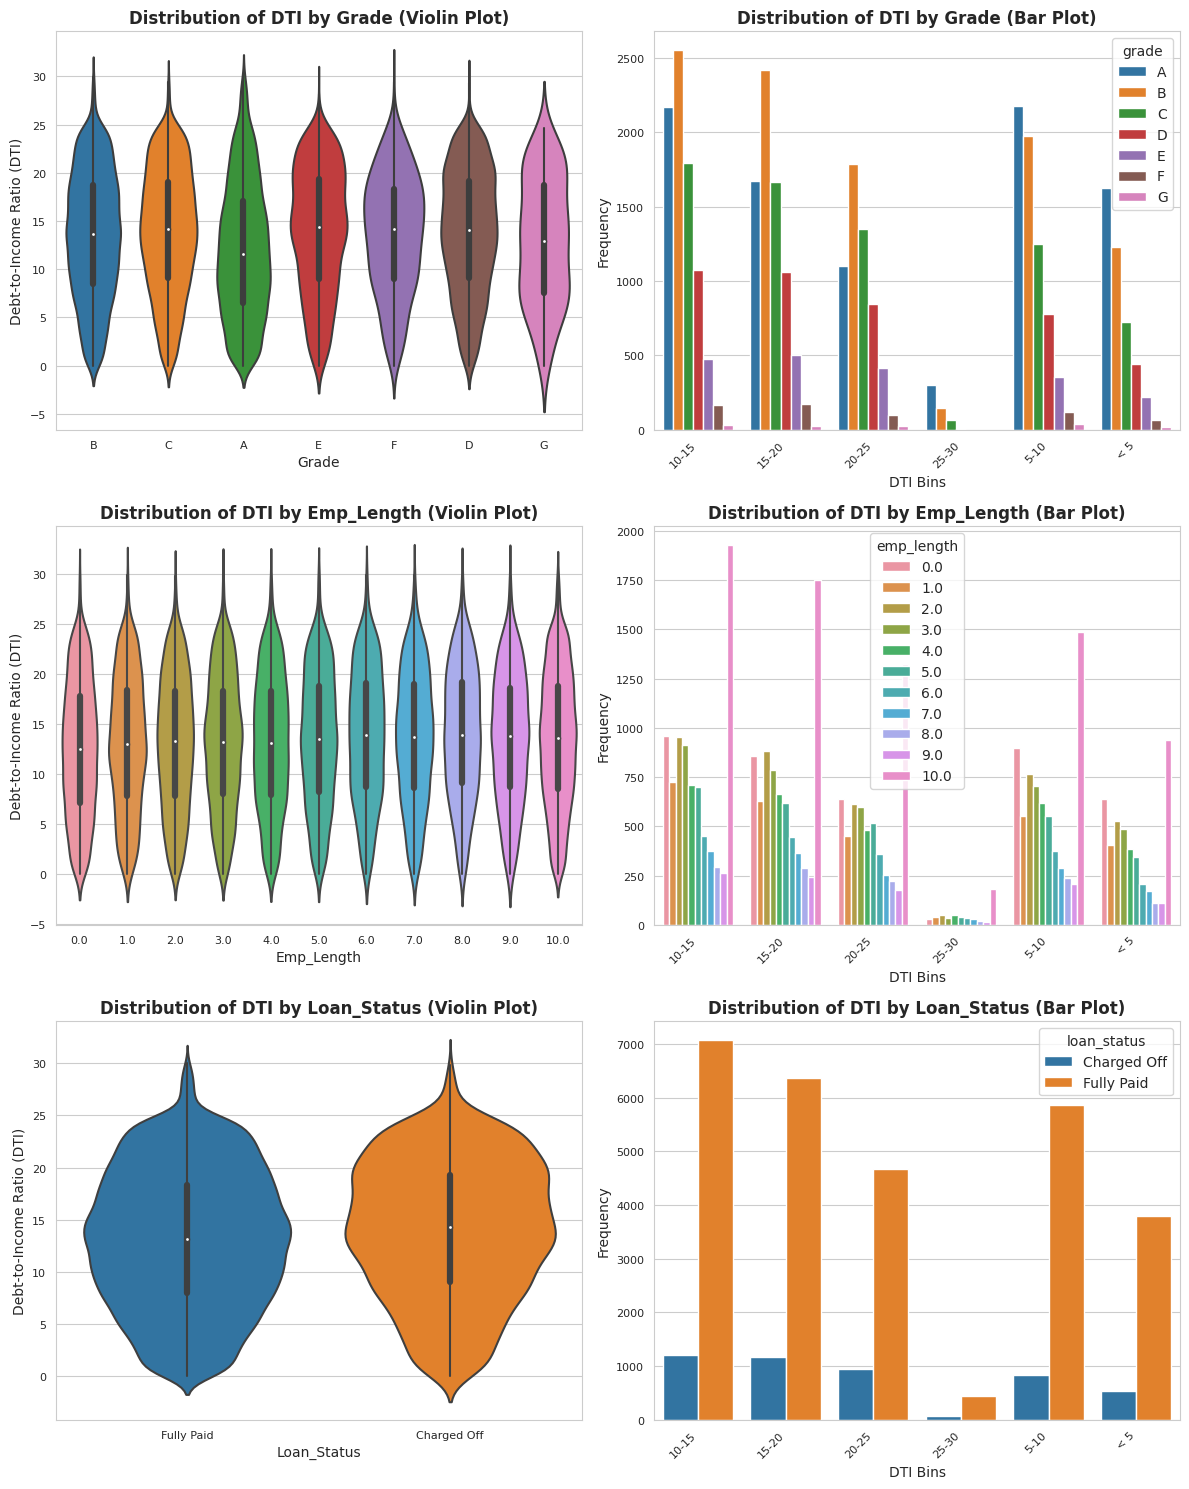

In [52]:
sns.set_style("whitegrid")

segmentation_vars = ['grade', 'emp_length', 'loan_status']  # 'loan_status' included for both plot types
plot_types = ['violin', 'hist']

fig, axes = plt.subplots(len(segmentation_vars), len(plot_types), figsize=(12, 5 * len(segmentation_vars)))

for i, seg_var in enumerate(segmentation_vars):
    for j, plot_type in enumerate(plot_types):
        ax = axes[i, j]

        if plot_type == 'hist':
            if seg_var == 'loan_status':
                bin_counts = df_loan_2_4_2.groupby(['loan_status', 'dti_bins']).size().reset_index(name='count')
                sns.barplot(data=bin_counts, x='dti_bins', y='count', hue='loan_status', ax=ax)  # Bar plot for loan_status
            else:
                bin_counts = df_loan_2_4_2.groupby([seg_var, 'dti_bins']).size().reset_index(name='count')
                sns.barplot(data=bin_counts, x='dti_bins', y='count', hue=seg_var, ax=ax)  # Bar plot for other segmentations

            ax.set_xlabel("DTI Bins", fontsize=10)  # x-axis label updated
            ax.set_ylabel("Frequency", fontsize=10)
            ax.set_title(f'Distribution of DTI by {seg_var.title()} (Bar Plot)', fontsize=12, fontweight='bold')  # Title updated
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)


        elif plot_type == 'violin':
            sns.violinplot(data=df_loan_2_4_2, x=seg_var, y='dti', ax=ax)
            ax.set_xlabel(seg_var.title(), fontsize=10)
            ax.set_ylabel("Debt-to-Income Ratio (DTI)", fontsize=10)
            ax.set_title(f'Distribution of DTI by {seg_var.title()} (Violin Plot)', fontsize=12, fontweight='bold')

        ax.tick_params(labelsize=8)


plt.tight_layout()
plt.show()



#### NOTE: Findings of above plot are mentioned after 3.3.7 point. Basically, I have mentioned all the findings of Segmented Univariate Analysis after point 3.3.7 in conolidated manner after plotting all the Segmennted Univariate plots.

##########################################
### 3.3.4. Interest Rate Segmented by:
#########################################

    1. Grade:  Validate that interest rates increase with lower grades (higher risk). (Violin plot)
    2. Purpose:  See if certain loan purposes justify higher interest rates due to inherent risk. (Violin plot)
    3. Term: Analyze if longer loan terms have different interest rate distributions. (Violin plot)
    
####

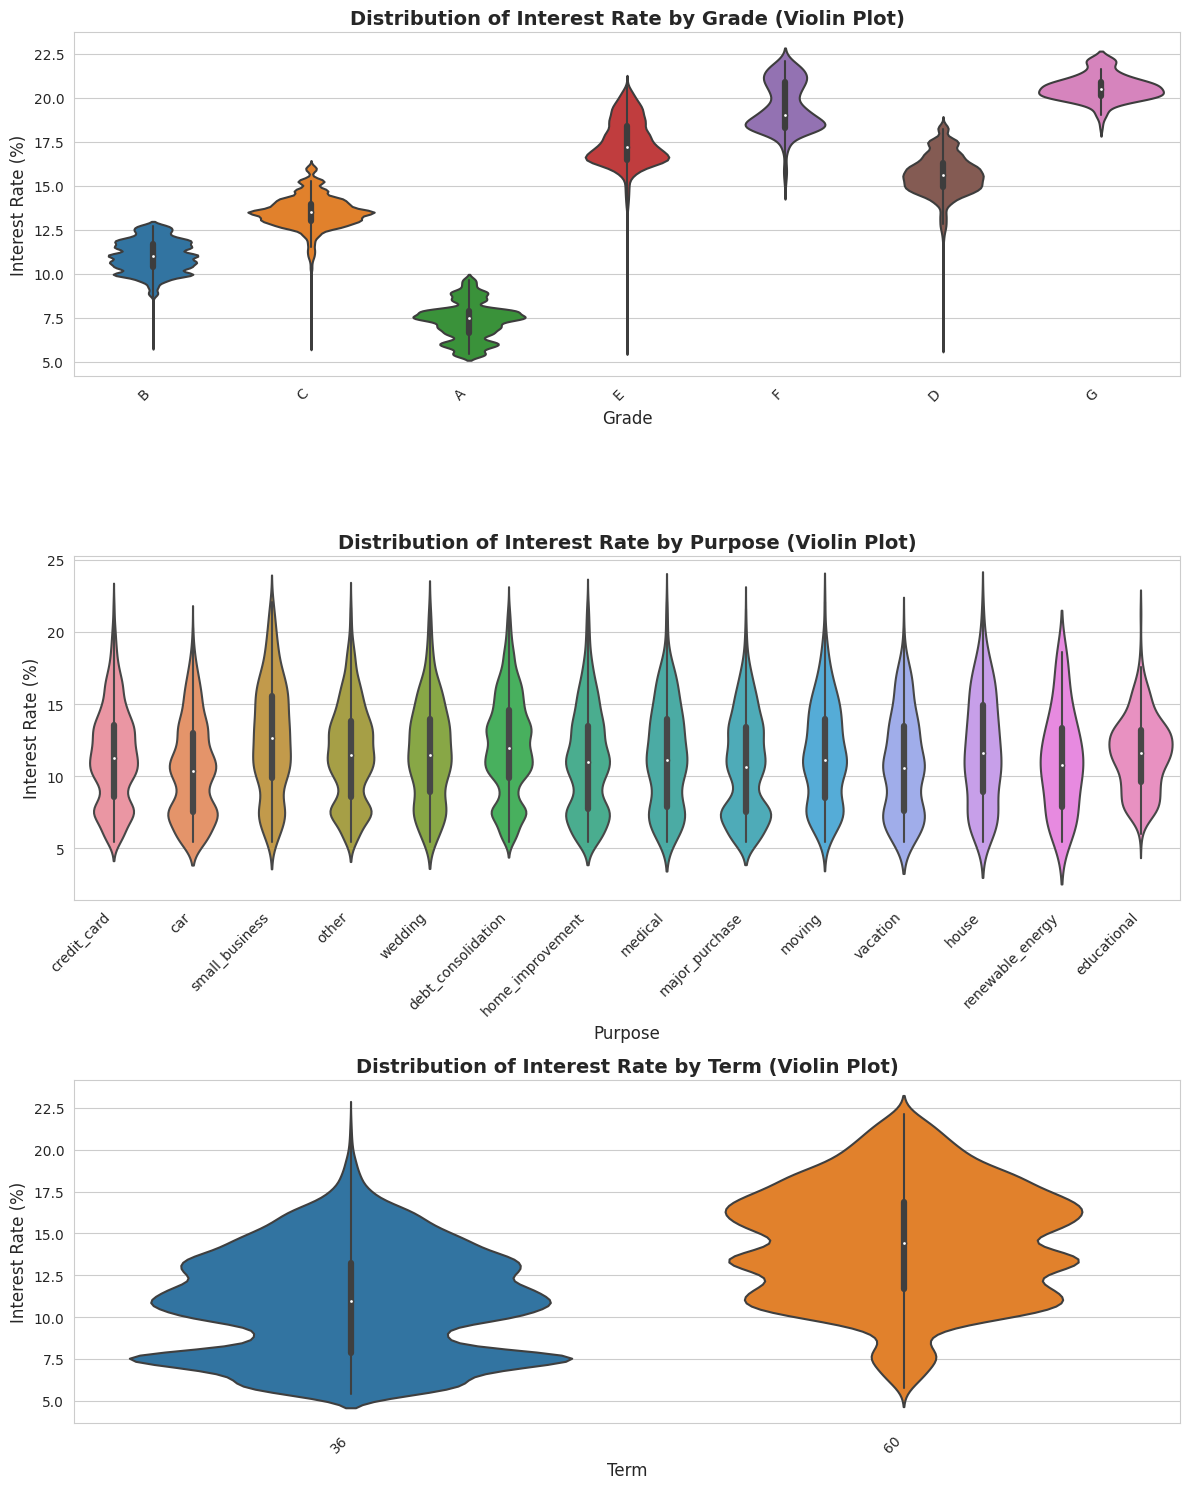

In [53]:
sns.set_style("whitegrid")

segmentation_vars = ['grade', 'purpose', 'term']
plot_type = 'violin'  # Only violin plots for this analysis

fig, axes = plt.subplots(len(segmentation_vars), 1, figsize=(12, 5 * len(segmentation_vars))) # Adjusted figure size

for i, seg_var in enumerate(segmentation_vars):
    ax = axes[i]
    sns.violinplot(data=df_loan_2_4_2, x=seg_var, y='int_rate', ax=ax)
    ax.set_xlabel(seg_var.title(), fontsize=12)  # Increased x-label font size
    ax.set_ylabel("Interest Rate (%)", fontsize=12)  # Increased y-label font size and added units
    ax.set_title(f'Distribution of Interest Rate by {seg_var.title()} (Violin Plot)', fontsize=14, fontweight='bold') # Increased title font size
    ax.tick_params(labelsize=10)  # Increased tick label size
    if seg_var in ['grade', 'purpose', 'term']:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10) # Rotate and increased size of x-tick labels


plt.tight_layout()
plt.show()



#### NOTE: Findings of above plot are mentioned after 3.3.7 point. Basically, I have mentioned all the findings of Segmented Univariate Analysis after point 3.3.7 in conolidated manner after plotting all the Segmennted Univariate plots.

#################################################
### 3.3.5. Loan Amount Segmented by:
#################################################

*   Grade:  See how loan amounts vary across grades.  Lower grades might have smaller loan amounts or a wider range. (Violin plot)
*   Purpose:  Analyze loan amount differences across loan purposes. Some purposes might require larger loans. (Violin plot)
*   Loan Status:  Compare loan amount distributions for charged-off vs. fully paid loans. (Violin plot)

#####

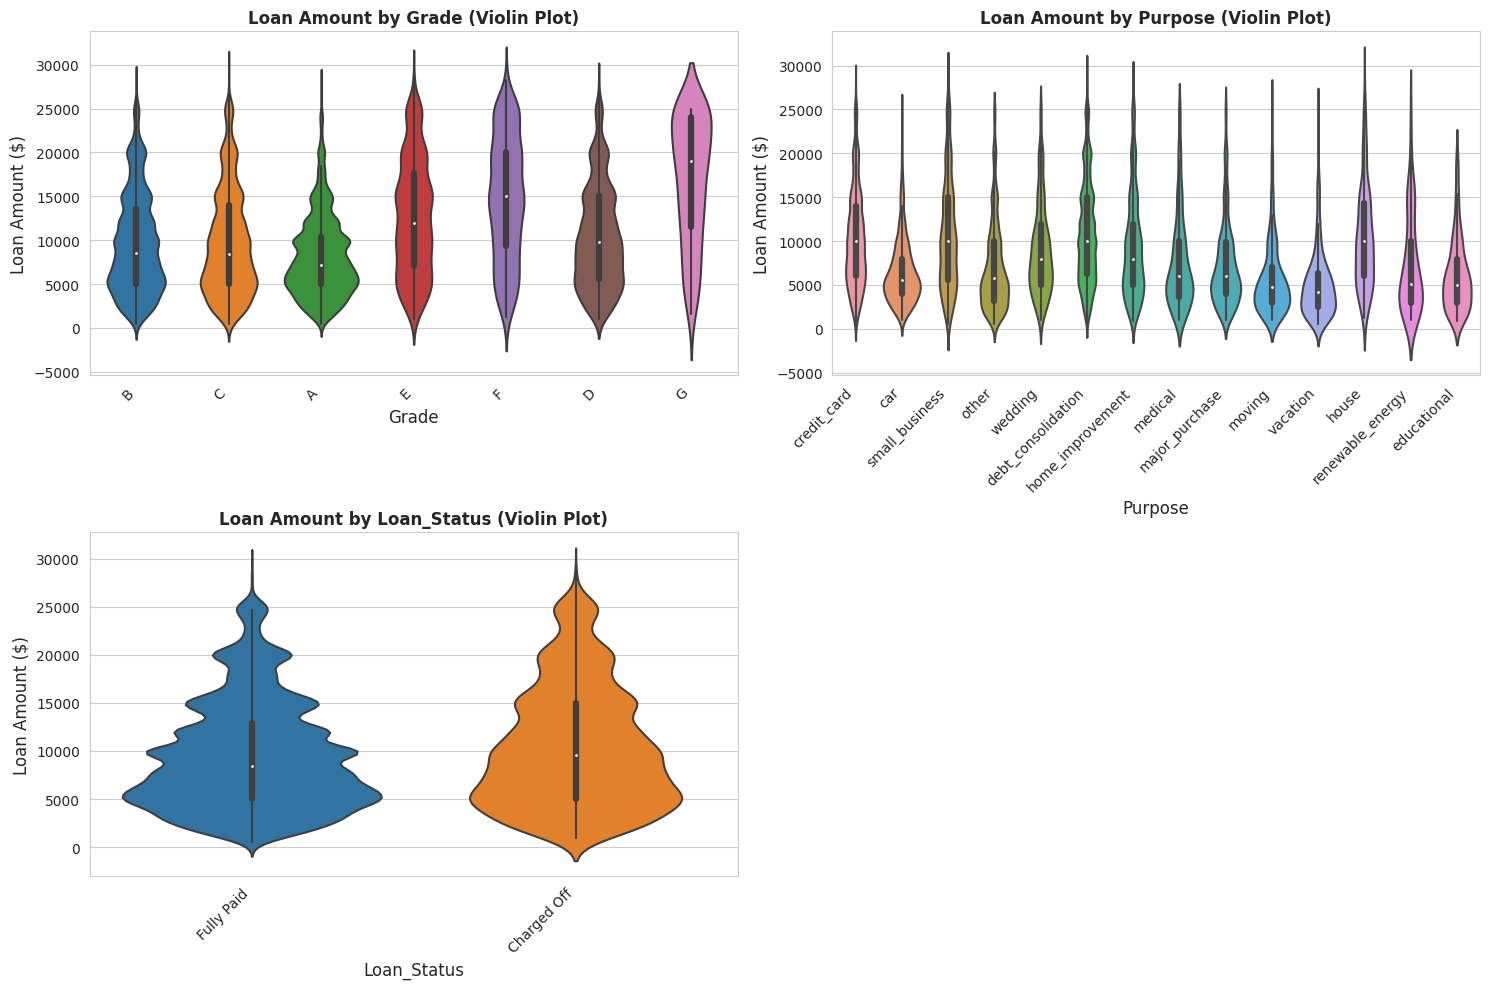

In [54]:
sns.set_style("whitegrid")

segmentation_vars = ['grade', 'purpose', 'loan_status']
plot_types = {'grade': 'violin', 'purpose': 'violin', 'loan_status': 'violin'}

num_plots = len(segmentation_vars)
ncols = 2
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

# Flatten the axes array to simplify indexing
if nrows * ncols > 1:  # Check if more than one subplot
    axes = axes.flatten()

for plot_index, seg_var in enumerate(segmentation_vars):
    ax = axes[plot_index]  # Directly index the flattened axes array

    sns.violinplot(data=df_loan_2_4_2, x=seg_var, y='loan_amnt', ax=ax)
    ax.set_xlabel(seg_var.title(), fontsize=12)
    ax.set_ylabel("Loan Amount ($)", fontsize=12)
    ax.set_title(f'Loan Amount by {seg_var.title()} (Violin Plot)', fontsize=12, fontweight='bold')
    ax.tick_params(labelsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Turn off any remaining unused axes
for i in range(num_plots, nrows * ncols):
    axes[i].set_axis_off()


plt.tight_layout()
plt.show()


#### NOTE: Findings of above plot are mentioned after 3.3.7 point. Basically, I have mentioned all the findings of Segmented Univariate Analysis after point 3.3.7 in conolidated manner after plotting all the Segmennted Univariate plots.

##################################################
### 3.3.6. Employment Length Segmented by:
#################################################

    1. Grade:  See if employment length distributions vary across loan grades.  (Bar chart)
    2. Loan Status:  Compare employment length distributions for charged-off vs. fully paid loans. (Bar chart)

######

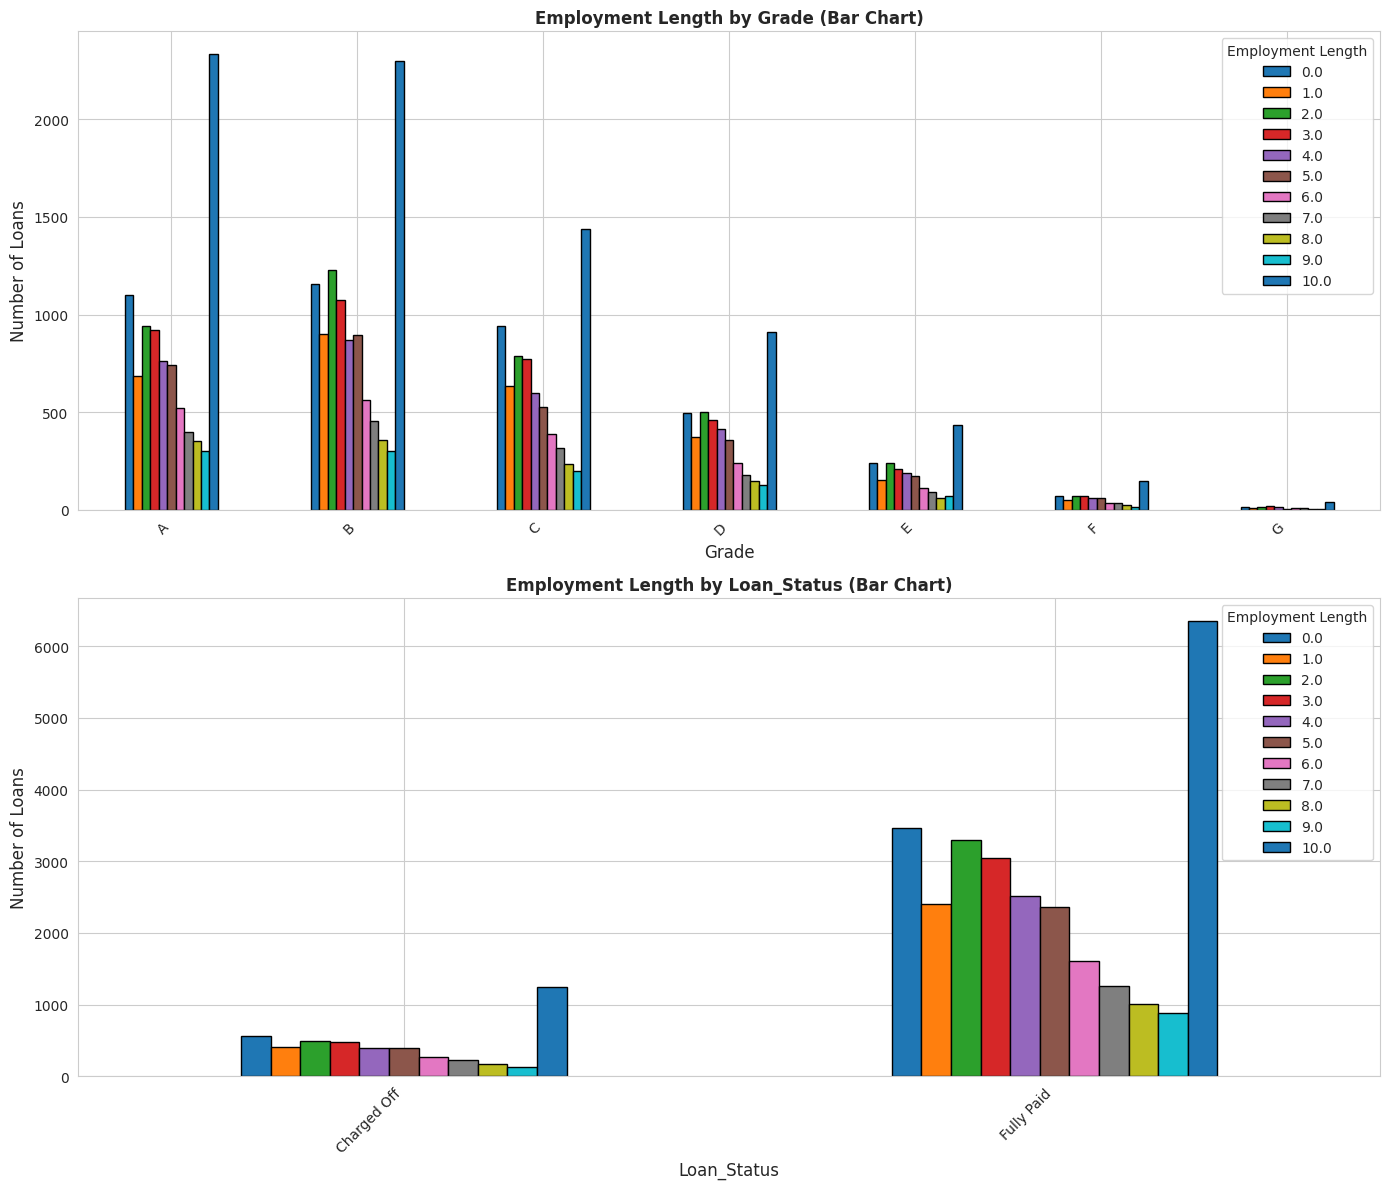

In [55]:
sns.set_style("whitegrid")

segmentation_vars = ['grade', 'loan_status']
plot_type = 'bar'

# One plot per row
nrows = len(segmentation_vars)
ncols = 1  # Single column
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 6 * nrows))  # Increased figure height

# Handle single plot case to avoid errors
if nrows == 1:
    axes = [axes]

for i, seg_var in enumerate(segmentation_vars):
    ax = axes[i]
    emp_length_counts = df_loan_2_4_2.groupby([seg_var, 'emp_length']).size().unstack()
    emp_length_counts.plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_xlabel(seg_var.title(), fontsize=12)
    ax.set_ylabel("Number of Loans", fontsize=12)
    ax.set_title(f'Employment Length by {seg_var.title()} (Bar Chart)', fontsize=12, fontweight='bold')
    ax.tick_params(labelsize=10)
    ax.legend(title='Employment Length')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


plt.tight_layout()
plt.show()



#### NOTE: Findings of above plot are mentioned after 3.3.7 point. Basically, I have mentioned all the findings of Segmented Univariate Analysis after point 3.3.7 in conolidated manner after plotting all the Segmennted Univariate plots.

##################################################
### 3.3.7. Home Ownership Segmented by:
##################################################

    1. Loan Status: Compare homeownership proportions for charged-off vs. fully paid loans. (Bar chart)
######

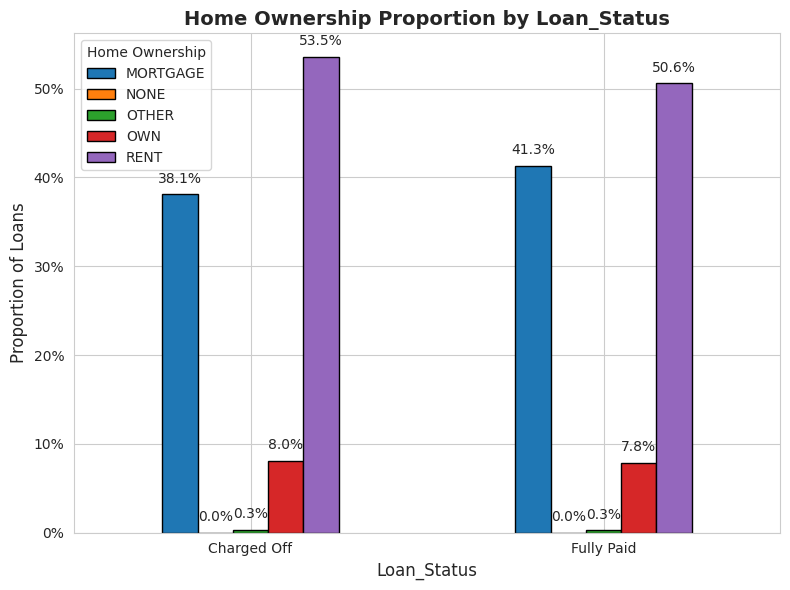

In [56]:
sns.set_style("whitegrid")

seg_var = 'loan_status'
plot_type = 'bar'

fig, ax = plt.subplots(figsize=(8, 6))

homeownership_props = df_loan_2_4_2.groupby(seg_var)['home_ownership'].value_counts(normalize=True).unstack()
homeownership_props.plot(kind='bar', ax=ax, edgecolor='black')

ax.set_xlabel(seg_var.title(), fontsize=12)
ax.set_ylabel("Proportion of Loans", fontsize=12)
ax.set_title(f'Home Ownership Proportion by {seg_var.title()}', fontsize=14, fontweight='bold')
ax.tick_params(labelsize=10)
ax.legend(title='Home Ownership')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.yaxis.set_major_formatter('{:.0%}'.format)

# Add percentage labels on top of bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height + 0.01, '{:.1%}'.format(height), ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()



#############################################################
# *Interpretation / Findings of 'Segmented Univariate Analysis' Plots* (All 3.3 Plots):
############################################################

####

* **3.3.1 Plot (Loan Status (loan_status) Segmentation)**:

    *   **Default Rates by Purpose:** Small business loans have the highest default rate at 26.77%, significantly higher than other categories. Renewable energy loans also have an elevated default rate (19.28%). This suggests that loans related to business ventures and renewable energy carry inherently higher risks.

    *   **Default Rates by Grade:**  Default rates increase as loan grade decreases, with G and F grades having the highest default rates (33.33% and 32.44%, respectively).  This confirms the expected relationship between lower loan grades (representing higher risk assessments by the lender) and a greater likelihood of default.

    *   **Default Rates by Home Ownership:** Borrowers categorized as "OTHER" in home ownership have the highest default rate (17.98%), followed by renters (15.20%). This suggests that individuals with non-traditional or less stable housing situations might be more susceptible to default.

    *   **Default Rates by Employment Length:** The plot reveals a relatively consistent default rate across different employment lengths, with a slight peak for borrowers with 10+ years of employment (16.43%). This counterintuitive result indicates that employment length alone might not be a strong predictor of default, and other factors likely play a more significant role.

    *   **Default Rates by Loan Amount Bins:** Loans over 20k show the highest default rate (19.82%), followed by loans between 16k-20k (18.31%).  While the rate decreases somewhat for smaller loan amounts, even loans below 8k still have a notable default rate (around 13-14%). This suggests that larger loan amounts carry a higher risk of default, but smaller loans are not entirely immune to default.

    *   **Default Rates by Interest Rate Bins:**  The highest default rates are observed for loans with interest rates above 21% (46.10%), followed by 17-21% (31.12%).  Default rates decrease as interest rates decrease, with the lowest rate for loans below 9% (6.14%).  This clearly demonstrates the strong positive relationship between interest rates and default risk.  Higher interest rates indicate higher perceived risk by the lender and impose a greater financial burden on the borrower, both contributing to increased default likelihood.

    *   **Default Rates by Annual Income Bins:**  The default rate generally decreases as annual income increases.  Borrowers earning less than 25k annually have the highest default rate (19.62%), while those earning over 150k have the lowest (around 9%).  This is an expected trend, as higher income generally provides greater financial stability and ability to manage debt.

    *   **Default Rates by DTI Bins:** Default rates are highest for borrowers with DTIs between 20-25 (16.97%) and 15-20 (15.59%).  The rate then decreases somewhat for lower DTI bins. This reinforces the importance of DTI as a key risk factor.  A high DTI, even with a reasonable income, indicates a significant portion of income is already allocated to debt repayment, increasing vulnerability to default.

    * **Default Rates by Term:** Loans with a 60-month term have a substantially higher default rate (25.50%) compared to loans with a 36-month term (11.16%). This suggests that longer loan terms are a significant risk factor for default, likely due to the extended period over which borrowers are exposed to potential financial difficulties.

    * **Default Rates by Issue Month:** Default rates show some variation across the months, but the differences are relatively small. The highest default rates are observed for loans issued in December (16.12%), November, and September, potentially related to increased financial pressures around the holiday season. The lowest default rates are in March (12.30%), suggesting a possible seasonal effect. However, the overall variation across months is not substantial, indicating that the month of loan issuance is not a primary driver of default compared to other factors like loan term or borrower characteristics.

######

* **3.3.2 Plot (Annual Income Segmentation)**:
    * The distribution of annual income varies across loan grades and homeownership statuses.  Higher loan grades (A, B, C) tend to have higher median annual incomes, as shown by the violin plots.  The bar plots confirm this trend, with a greater proportion of higher-income borrowers in the top grades.  This suggests a positive correlation between income and loan grade, indicating that higher earners are more likely to receive better loan terms.

    * Across homeownership categories, renters have the largest concentration of lower-income borrowers, while those with mortgages tend to have higher incomes.  This is evident in both the violin and bar plots.  The "NONE" category shows a wide income distribution, suggesting it might include a diverse mix of borrowers.  These observations support the use of homeownership as a factor in credit risk assessment, as it reflects differences in financial stability and borrowing behavior.

    * The violin plot reveals that the distribution of annual income for fully paid loans is slightly skewed towards higher incomes compared to charged-off loans.  While both distributions have a similar median income, the fully paid loan distribution has a longer tail towards higher incomes, indicating a greater proportion of high earners among those who successfully repay their loans.  The bar plot confirms this observation, showing a greater number of fully paid loans in the higher income bins (especially 50k-75k).  This suggests a positive correlation between income and successful loan repayment, which is expected as higher income generally implies greater financial stability and ability to meet debt obligations.

######

* **3.3.3 Plot (DTI (Debt-to-Income Ratio) Segmentation)**:
    * DTI generally remains consistent across loan grades, as indicated by the relatively stable median values in the violin plots.  However, the bar plots reveal some nuances, showing a slight increase in the frequency of lower DTI values for higher loan grades.  This suggests that while DTI isn't a strong differentiator between grades, lower DTI might be slightly favored for higher-grade loans.

    * DTI also appears relatively consistent across different employment lengths, with the violin plots showing similar median DTI values.  The bar plots, however, reveal some variations in the distribution within specific DTI ranges.  Shorter employment lengths (< 1 year, 1 year) show a pronounced peak in the 15-20 DTI bin, which is less prominent for longer employment lengths.  This might suggest a slightly higher tendency towards higher DTI among those with less stable employment history, though the overall DTI trend across employment length remains largely consistent.

######

* **3.3.4 Plot (Interest Rate Segmentation)**:
    * Interest rates clearly increase with decreasing loan grade, validating the risk-based pricing model.  This is evident in the first violin plot, where the median interest rate progressively rises from grade A to G.  The distribution of interest rates also varies across loan purposes.  While most purposes cluster around a similar range, small business loans tend to have higher interest rates. This could reflect the perceived higher risk associated with such ventures.  
    * Loan term also affects interest rate distribution.  60-month loans tend to have higher interest rates compared to 36-month loans, likely due to the increased risk associated with a longer repayment period.

######

* **3.3.5 Plot (Loan Amount Segmentation)**: 
    * Loan amounts tend to increase with lower loan grades (higher risk), as shown by the upward shift in median loan amounts in the first violin plot.  This suggests that higher-risk borrowers are often granted larger loans, potentially contributing to increased default rates.  Loan amounts vary significantly by purpose, with debt consolidation and small business loans typically having larger amounts, likely reflecting the needs associated with those purposes.  
    * Fully paid and charged-off loans show similar loan amount distributions, indicating that loan amount alone is not a strong indicator of default likelihood.  However, charged-off loans exhibit a slightly wider distribution, especially at higher loan amounts, suggesting a slightly elevated risk for larger loans.

######

* **3.3.6 Plot (Employment Length Segmentation)**:
    * Employment length distributions show some variation across loan grades.  Higher grades (A, B) tend to have a greater proportion of borrowers with longer employment histories (10+ years), while lower grades (F, G) show a more even distribution across employment lengths. This suggests a possible correlation between employment stability and loan grade, although not a very strong one.
    * Comparing loan statuses, fully paid loans show a higher concentration of borrowers with longer employment histories (10+ years) than charged-off loans.  Charged-off loans, on the other hand, have a higher representation of borrowers with shorter employment lengths, particularly less than 1 year. This indicates that shorter employment length could be a risk factor for loan default.

######

* **3.3.7 Plot (Home Ownership Segmentation)**:
    * Homeownership proportions are very similar for both charged-off and fully paid loans.  Renters and those with mortgages represent the largest groups in both categories, with nearly identical proportions.  This suggests that homeownership status alone is not a strong predictor of loan default.


####

#########################################################################
# *Important Driver variables for identifying potential defaulters*
#### (Based on Univariate and Segmented Univariate Analysis):
#########################################################################
### 


1. **`grade` / `sub_grade`:**  Lower loan grades (especially G, F, then E) have significantly higher default rates. Subgrades offer even more granular risk assessment.

2. **`int_rate`:** Higher interest rates strongly correlate with increased default rates.  Loans with rates above 17% are particularly risky.

3. **`loan_amnt`:** While not a sole predictor, larger loan amounts, especially above 16k, show a higher tendency for default.

4. **`dti`:**  Higher DTI ratios are a key risk factor. Borrowers with DTIs between 15-25 are notably more likely to default.

5. **`purpose`:**  Small business loans stand out as having the highest default rate, followed by renewable energy loans.  Debt consolidation, while a common purpose, also has elevated risk.

6. **`term`:**  60-month loan terms have substantially higher default rates compared to 36-month terms.

7. **`home_ownership`:**  Borrowers with non-traditional homeownership ("OTHER") and renters have higher default rates compared to homeowners.

8. **`annual_inc`:** Lower annual income increases the likelihood of default, with those earning under 25k having the highest risk.

9. **`emp_length`:** While less conclusive, shorter employment lengths (especially < 1 year) appear to be associated with somewhat higher default rates, but further investigation is needed.

10. **`issue_month`:**  Loans issued in December, November, and September have slightly elevated default rates, potentially due to seasonal financial pressures.  However, this is a weaker indicator compared to the others.

It's important to note that these variables should not be considered in isolation. The combined effect of multiple factors often provides a more accurate assessment of default risk. For example, a borrower with a low loan grade, high DTI, a large loan amount, and a 60-month term is at considerably higher risk than a borrower with only one of these characteristics. 


####
### Now, let's consider these variables in our Bivariate Analysis along with some other variables
###

#######################################
# 3.4 Bivariate Analysis
#######################################

###

In [57]:
df_loan_2_4_2.shape

(32967, 33)

#####################################################
## 3.4.1 Core Financial Relationships (with Loan Status Integration):
#####################################################

1.  Interest Rate vs. Loan Amount (Scatter Plot, Colored by Loan Status):  This visualization helps us understand if the relationship between the interest rate charged and the loan amount differs based on whether the loan was fully paid or charged off.  We can look for different patterns or clusters based on loan status.

2.  DTI vs. Annual Income (Scatter Plot, Colored by Loan Status): This plot explores the interplay between a borrower's debt-to-income ratio (DTI) and their annual income, segmented by loan status.  It can reveal whether higher income mitigates the risk of high DTI differently for fully paid versus charged-off loans.

3.  Loan Amount vs. Term (Box Plot, Grouped by Term and Loan Status):  This visualization compares the distribution of loan amounts across different loan terms (e.g., 36 months vs. 60 months), separately for fully paid and charged-off loans.  It helps us understand if loan term plays a different role in loan performance based on the loan amount.

4.  Interest Rate vs. Term (Box Plot, Grouped by Term and Loan Status):  Similar to the previous plot, this examines the relationship between interest rates and loan terms, segmented by loan status. It can reveal if the impact of loan term on interest rates varies for successful and unsuccessful loans.

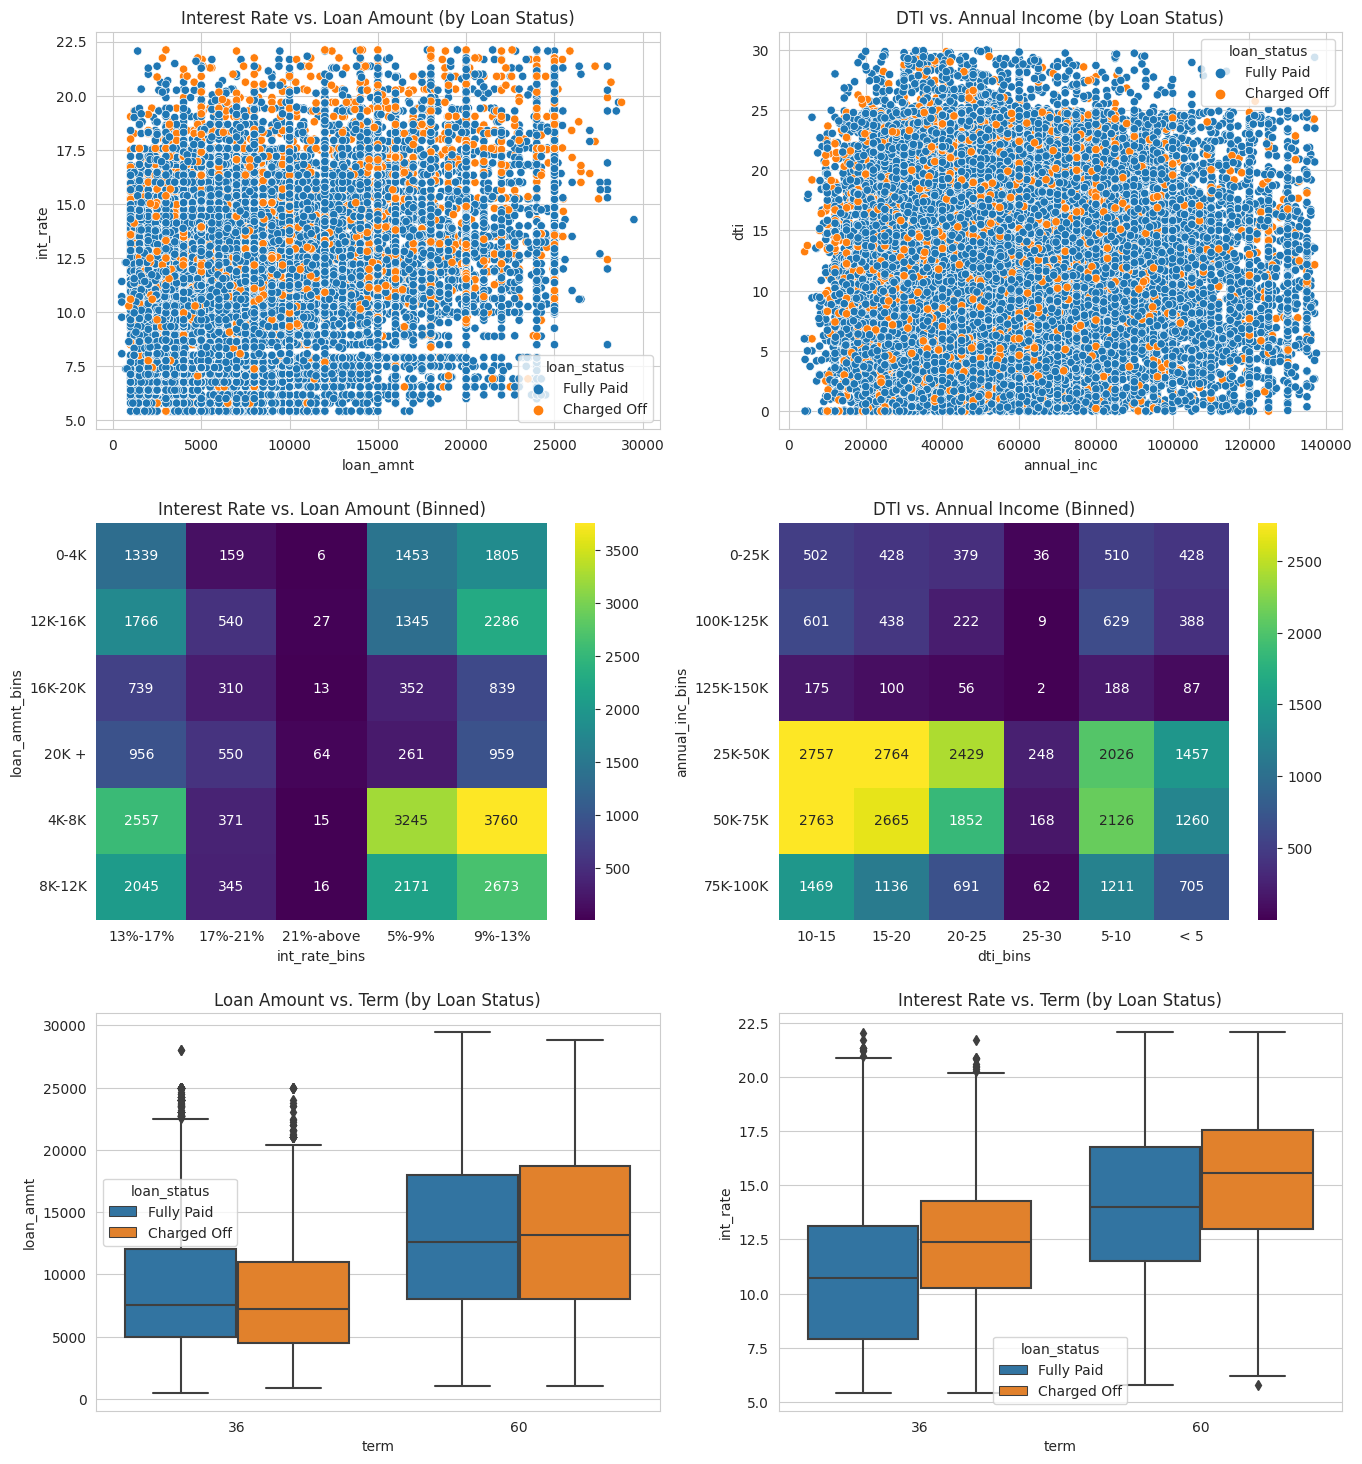

In [58]:
fig, axes = plt.subplots(3, 2, figsize=(14, 15))  # 3 rows x 2 columns

# Row 1: Scatter plots (using numerical data)
sns.scatterplot(data=df_loan_2_4_2, x='loan_amnt', y='int_rate', hue='loan_status', ax=axes[0, 0])
axes[0, 0].set_title('Interest Rate vs. Loan Amount (by Loan Status)')

sns.scatterplot(data=df_loan_2_4_2, x='annual_inc', y='dti', hue='loan_status', ax=axes[0, 1])
axes[0, 1].set_title('DTI vs. Annual Income (by Loan Status)')

# Row 2: Heatmaps (using binned data)
loan_int_rate = df_loan_2_4_2.groupby(['loan_amnt_bins', 'int_rate_bins']).size().unstack()
sns.heatmap(loan_int_rate, annot=True, fmt="d", cmap="viridis", ax=axes[1, 0])
axes[1, 0].set_title('Interest Rate vs. Loan Amount (Binned)')

dti_inc = df_loan_2_4_2.groupby(['annual_inc_bins', 'dti_bins']).size().unstack()
sns.heatmap(dti_inc, annot=True, fmt="d", cmap="viridis", ax=axes[1, 1])
axes[1, 1].set_title('DTI vs. Annual Income (Binned)')


# Row 3: Box plots (using numerical data)
sns.boxplot(data=df_loan_2_4_2, x='term', y='loan_amnt', hue='loan_status', ax=axes[2, 0])
axes[2, 0].set_title('Loan Amount vs. Term (by Loan Status)')

sns.boxplot(data=df_loan_2_4_2, x='term', y='int_rate', hue='loan_status', ax=axes[2, 1])
axes[2, 1].set_title('Interest Rate vs. Term (by Loan Status)')


plt.tight_layout(pad=2)
plt.show()



#### NOTE: Interpretation / Findings of above plot are mentioned after 3.4.7 point. Basically, I have mentioned all the findings of Bivariate Analysis after point 3.4.7 in conolidated manner after plotting all the Bivariate plots.

#######################################################
## 3.4.2 Loan Characteristics and Grade (with Loan Status Integration):
#######################################################

1.  Loan Amount vs. Grade (Box Plot, Grouped by Grade and Loan Status): 
        
        This visualization explores how the distribution of loan amounts varies across different loan grades (A, B, C, etc.), segmented by loan status ('Fully Paid' and 'Charged Off').  We'll be looking for differences in the central tendency (median) and spread (interquartile range) of loan amounts between grades and loan statuses.
######
2.  Interest Rate vs. Grade (Box Plot, Grouped by Grade and Loan Status):
        
        This plot examines the relationship between interest rates and loan grades, again segmented by loan status.  We expect to see a general negative correlation (lower grades associated with higher interest rates), but we'll also analyze how this relationship varies for fully paid and charged-off loans.
######
3.  DTI vs. Grade (Box Plot, Grouped by Grade and Loan Status):  
        
        This visualization analyzes the distribution of debt-to-income ratios (DTI) across loan grades, separated by loan status. We'll investigate whether DTI varies systematically with loan grade and whether this relationship differs for successful and unsuccessful loans.

###

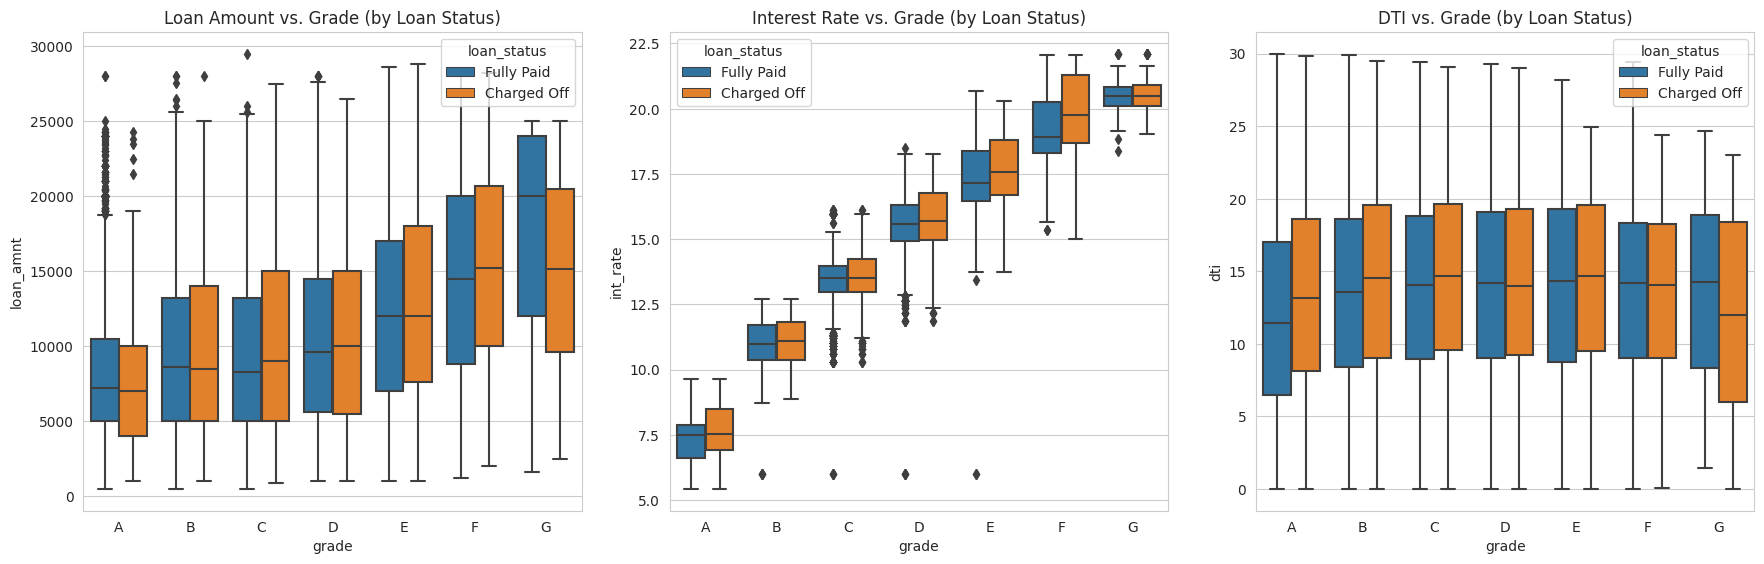

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

grade_order = sorted(df_loan_2_4_2['grade'].unique())  # Ensure consistent grade order

# 1. Loan Amount vs. Grade
sns.boxplot(data=df_loan_2_4_2, x='grade', y='loan_amnt', hue='loan_status', order=grade_order, ax=axes[0])
axes[0].set_title('Loan Amount vs. Grade (by Loan Status)')

# 2. Interest Rate vs. Grade
sns.boxplot(data=df_loan_2_4_2, x='grade', y='int_rate', hue='loan_status', order=grade_order, ax=axes[1])
axes[1].set_title('Interest Rate vs. Grade (by Loan Status)')

# 3. DTI vs. Grade
sns.boxplot(data=df_loan_2_4_2, x='grade', y='dti', hue='loan_status', order=grade_order, ax=axes[2])
axes[2].set_title('DTI vs. Grade (by Loan Status)')

plt.tight_layout(pad=2)
plt.show()


#### NOTE: Interpretation / Findings of above plot are mentioned after 3.4.7 point. Basically, I have mentioned all the findings of Bivariate Analysis after point 3.4.7 in conolidated manner after plotting all the Bivariate plots.

#######################################################
## 3.4.3 Loan Purpose and Risk (with Loan Status Integration)
#######################################################

1.   Loan Amount vs. Purpose (Box Plot, Grouped by Purpose and Loan Status): This visualization explores how the distribution of loan amounts varies across different loan purposes (e.g., debt consolidation, home improvement, etc.), segmented by loan status ('Fully Paid' and 'Charged Off'). We'll analyze if certain loan purposes tend to have higher or lower loan amounts and how this relates to loan performance. 
        
2.  Interest Rate vs. Purpose (Box Plot, Grouped by Purpose and Loan Status): This plot examines the relationship between interest rates and loan purposes, again segmented by loan status.  We'll investigate if certain purposes are associated with higher or lower interest rates, potentially reflecting the perceived risk associated with different borrowing reasons.
        
######


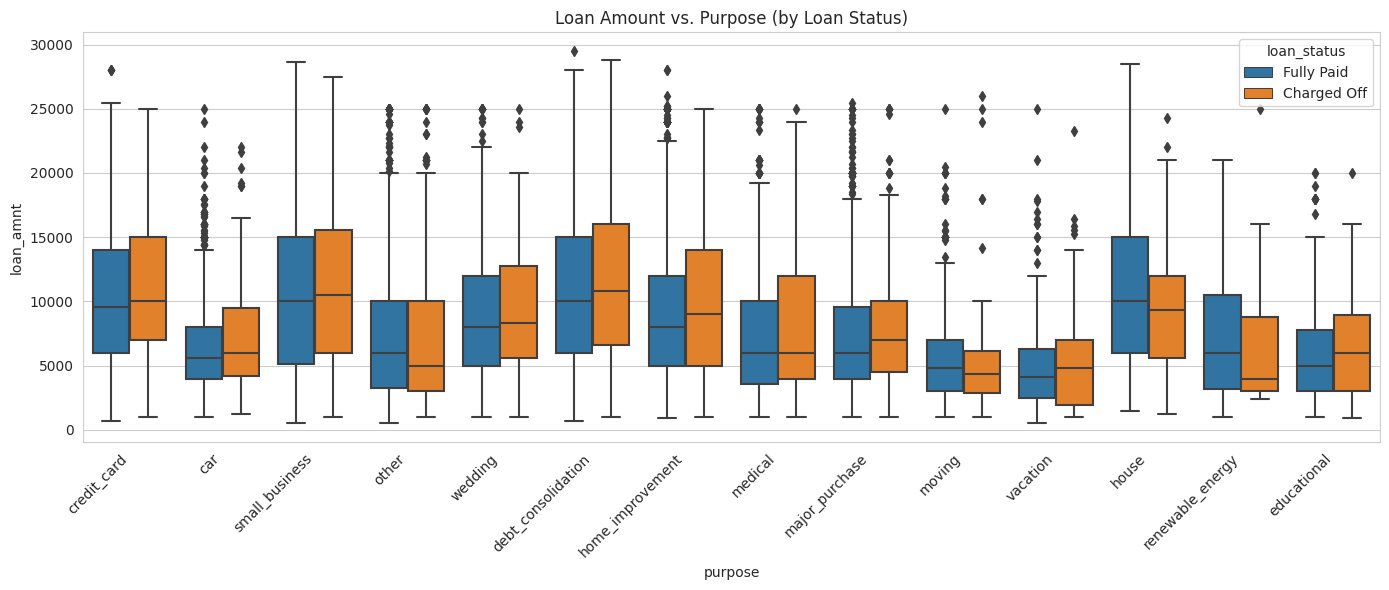

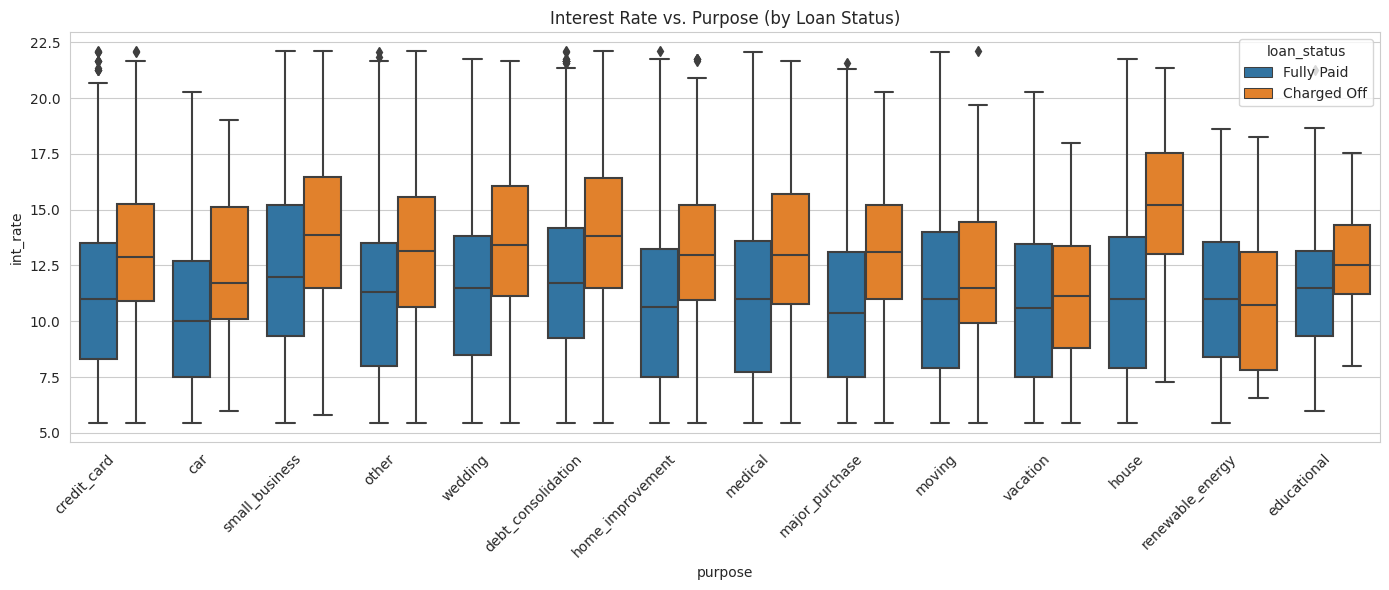

In [61]:
# 1. Loan Amount vs. Purpose
plt.figure(figsize=(14, 6))  # Adjust figure size as needed for better readability
sns.boxplot(data=df_loan_2_4_2, x='purpose', y='loan_amnt', hue='loan_status')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Loan Amount vs. Purpose (by Loan Status)')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# 2. Interest Rate vs. Purpose
plt.figure(figsize=(14, 6))  # Adjust figure size as needed for better readability
sns.boxplot(data=df_loan_2_4_2, x='purpose', y='int_rate', hue='loan_status')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.title('Interest Rate vs. Purpose (by Loan Status)')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



#### NOTE: Interpretation / Findings of above plot are mentioned after 3.4.7 point. Basically, I have mentioned all the findings of Bivariate Analysis after point 3.4.7 in conolidated manner after plotting all the Bivariate plots.

#######################################################
## 3.4.4 Time-Based Analysis (with Loan Status Integration):
#######################################################

1.   Loan Amount vs. Issue Month/Year (Bar Chart, Grouped by Time and Loan Status): These bar charts compare the average loan amounts across different issue months and years, segmented by loan status.  This will help us see if there are any seasonal or yearly trends in borrowing amounts and how they relate to loan performance.        

2.  Interest Rate vs. Issue Month/Year (Bar Chart, Grouped by Time and Loan Status):  These charts analyze how average interest rates vary across issue months and years, broken down by loan status.  We can investigate if interest rates fluctuate over time and whether these changes correlate with loan outcomes.


######

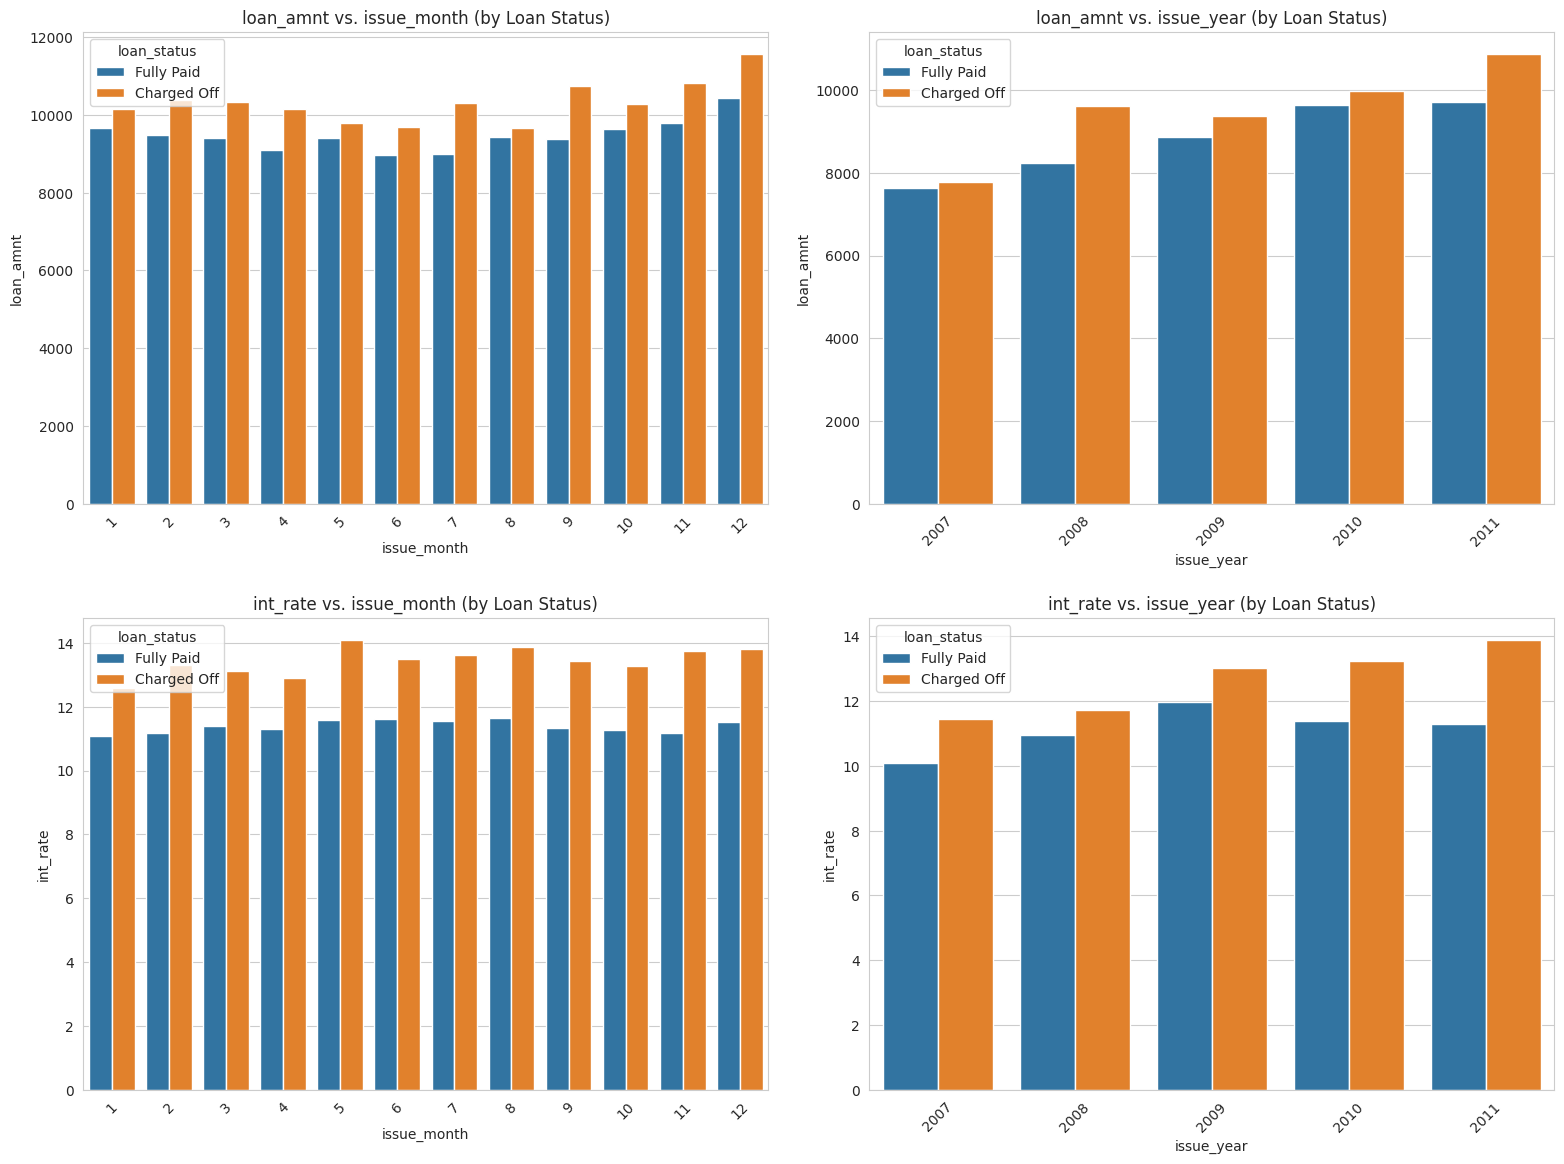

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Adjusted figure size

time_vars = ['issue_month', 'issue_year']
loan_characteristics = ['loan_amnt', 'int_rate']

# Loan Amount and Interest Rate Plots
for i, time_var in enumerate(time_vars):
    for j, characteristic in enumerate(loan_characteristics):
        sns.barplot(data=df_loan_2_4_2, x=time_var, y=characteristic, hue='loan_status', ax=axes[j, i], estimator=np.mean, ci=None)
        axes[j, i].set_title(f'{characteristic} vs. {time_var} (by Loan Status)')
        axes[j, i].tick_params(axis='x', rotation=45)

plt.tight_layout(pad=2)
plt.show()



#### NOTE: Interpretation / Findings of above plot are mentioned after 3.4.7 point. Basically, I have mentioned all the findings of Bivariate Analysis after point 3.4.7 in conolidated manner after plotting all the Bivariate plots.

################################################################
## 3.4.5 Employment Length and Loan Characteristics:
################################################################

    1. Loan Amount vs. Employment Length (Box Plot): Analyze loan amount variations based on employment length.

    2. Interest Rate vs. Employment Length (Box Plot): Explore potential relationships between interest rates and employment length.
    
######

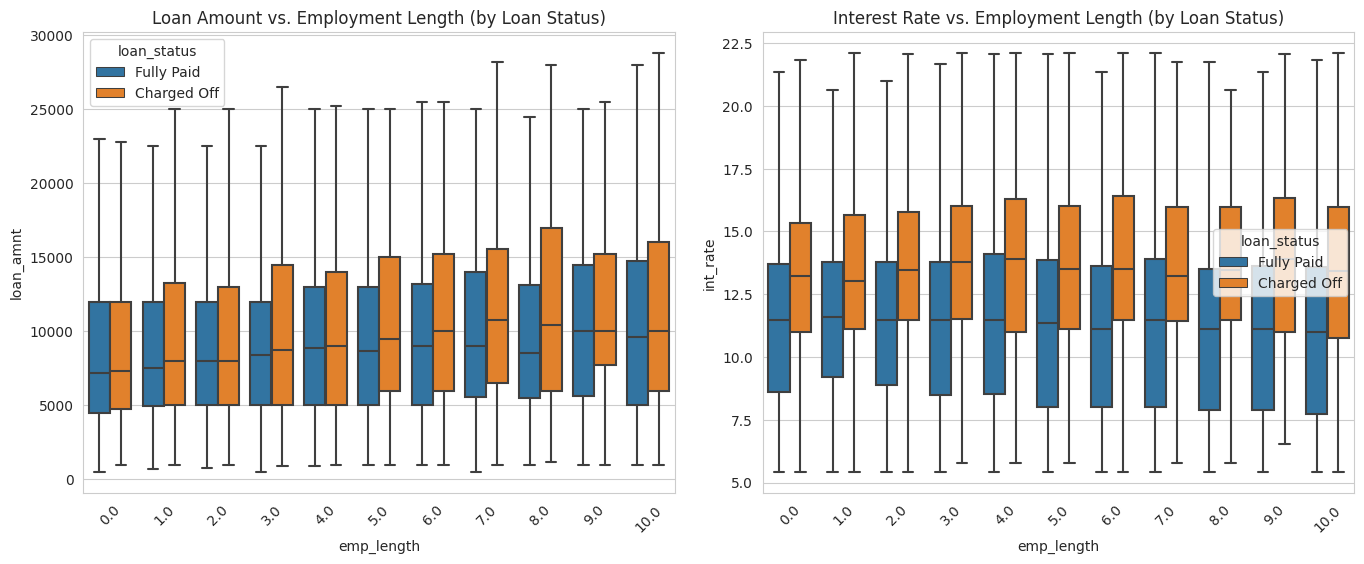

In [63]:
# Employment Length and Loan Characteristics

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df_loan_2_4_2, x='emp_length', y='loan_amnt', hue='loan_status', ax=axes[0], showfliers=False)
axes[0].set_title('Loan Amount vs. Employment Length (by Loan Status)')
axes[0].tick_params(axis='x', rotation=45)


sns.boxplot(data=df_loan_2_4_2, x='emp_length', y='int_rate', hue='loan_status', ax=axes[1], showfliers=False)
axes[1].set_title('Interest Rate vs. Employment Length (by Loan Status)')
axes[1].tick_params(axis='x', rotation=45)



plt.tight_layout(pad=2)
plt.show()



#### NOTE: Interpretation / Findings of above plot are mentioned after 3.4.7 point. Basically, I have mentioned all the findings of Bivariate Analysis after point 3.4.7 in conolidated manner after plotting all the Bivariate plots.

#####################################################
## 3.4.6 Correlation Analysis
#####################################################

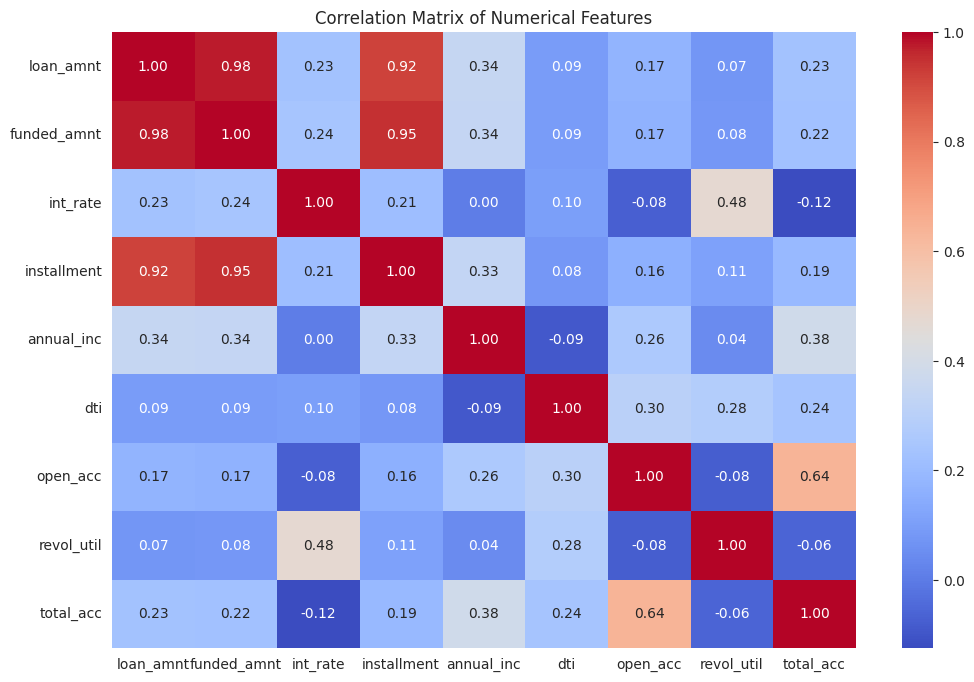

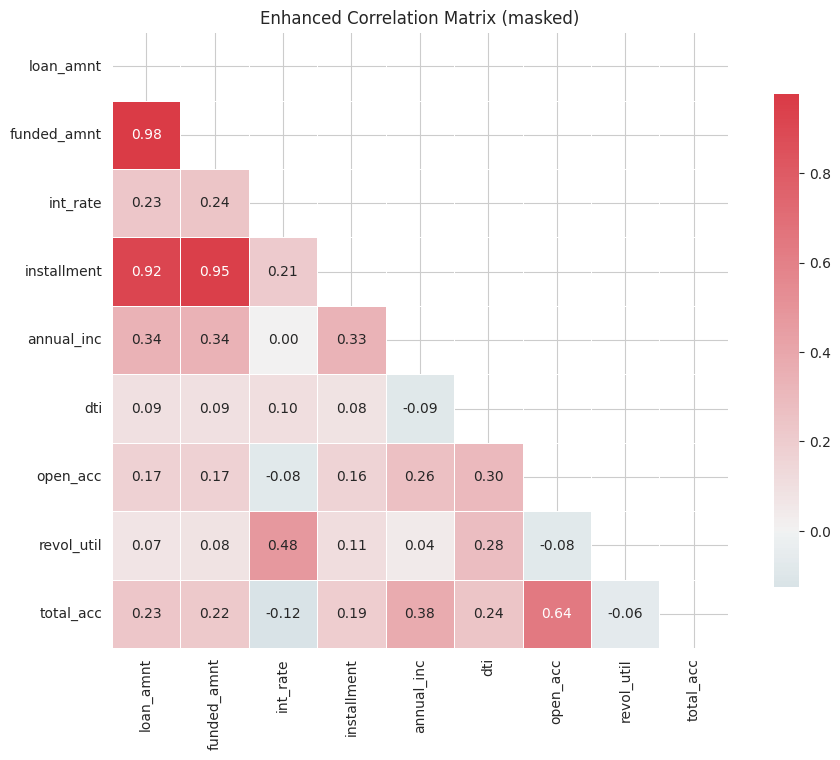


Highly Correlated Features (absolute correlation > 0.7):


loan_amnt  funded_amnt  int_rate  installment  annual_inc  dti  \
loan_amnt     1.000000     0.977577       NaN     0.919547         NaN  NaN   
funded_amnt   0.977577     1.000000       NaN     0.950273         NaN  NaN   
int_rate           NaN          NaN       1.0          NaN         NaN  NaN   
installment   0.919547     0.950273       NaN     1.000000         NaN  NaN   
annual_inc         NaN          NaN       NaN          NaN         1.0  NaN   
dti                NaN          NaN       NaN          NaN         NaN  1.0   
open_acc           NaN          NaN       NaN          NaN         NaN  NaN   
revol_util         NaN          NaN       NaN          NaN         NaN  NaN   
total_acc          NaN          NaN       NaN          NaN         NaN  NaN   

             open_acc  revol_util  total_acc  
loan_amnt         NaN         NaN        NaN  
funded_amnt       NaN         NaN        NaN  
int_rate          NaN         NaN        NaN  
installment       NaN         NaN        NaN  
annual_inc        NaN         NaN        NaN  
dti               NaN         NaN        NaN  
open_acc          1.0         NaN        NaN  
revol_util        NaN         1.0        NaN  
total_acc         NaN         NaN        1.0

In [64]:
def plot_correlation_matrix(df, numerical_features):
    """
    Calculates and visualizes the correlation matrix.

    Returns:
        correlation_matrix: The calculated correlation matrix.
    """
    correlation_matrix = df[numerical_features].corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

    # Enhanced Heatmap
    plt.figure(figsize=(12, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap=cmap, center=0, fmt=".2f",
                square=True, linewidths=.5, cbar_kws={"shrink": .8})
    plt.title('Enhanced Correlation Matrix (masked)')
    plt.show()

    return correlation_matrix

numerical_features = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_util', 'total_acc']

# Convert to numeric if needed
for col in numerical_features:
    if df_loan_2_4_2[col].dtype == 'object':  # Check if the column is of type object (string)
        df_loan_2_4_2[col] = pd.to_numeric(df_loan_2_4_2[col], errors='coerce')

correlation_matrix = plot_correlation_matrix(df_loan_2_4_2, numerical_features)

# High Correlation Filtering
threshold = 0.7
highly_correlated = correlation_matrix[correlation_matrix.abs() > threshold]
print("\nHighly Correlated Features (absolute correlation > 0.7):")
highly_correlated

#####################################################
## 3.4.7 'Loan Status' vs 'Numerical Variables bins/buckets' (Bivariate Analysis)
#####################################################

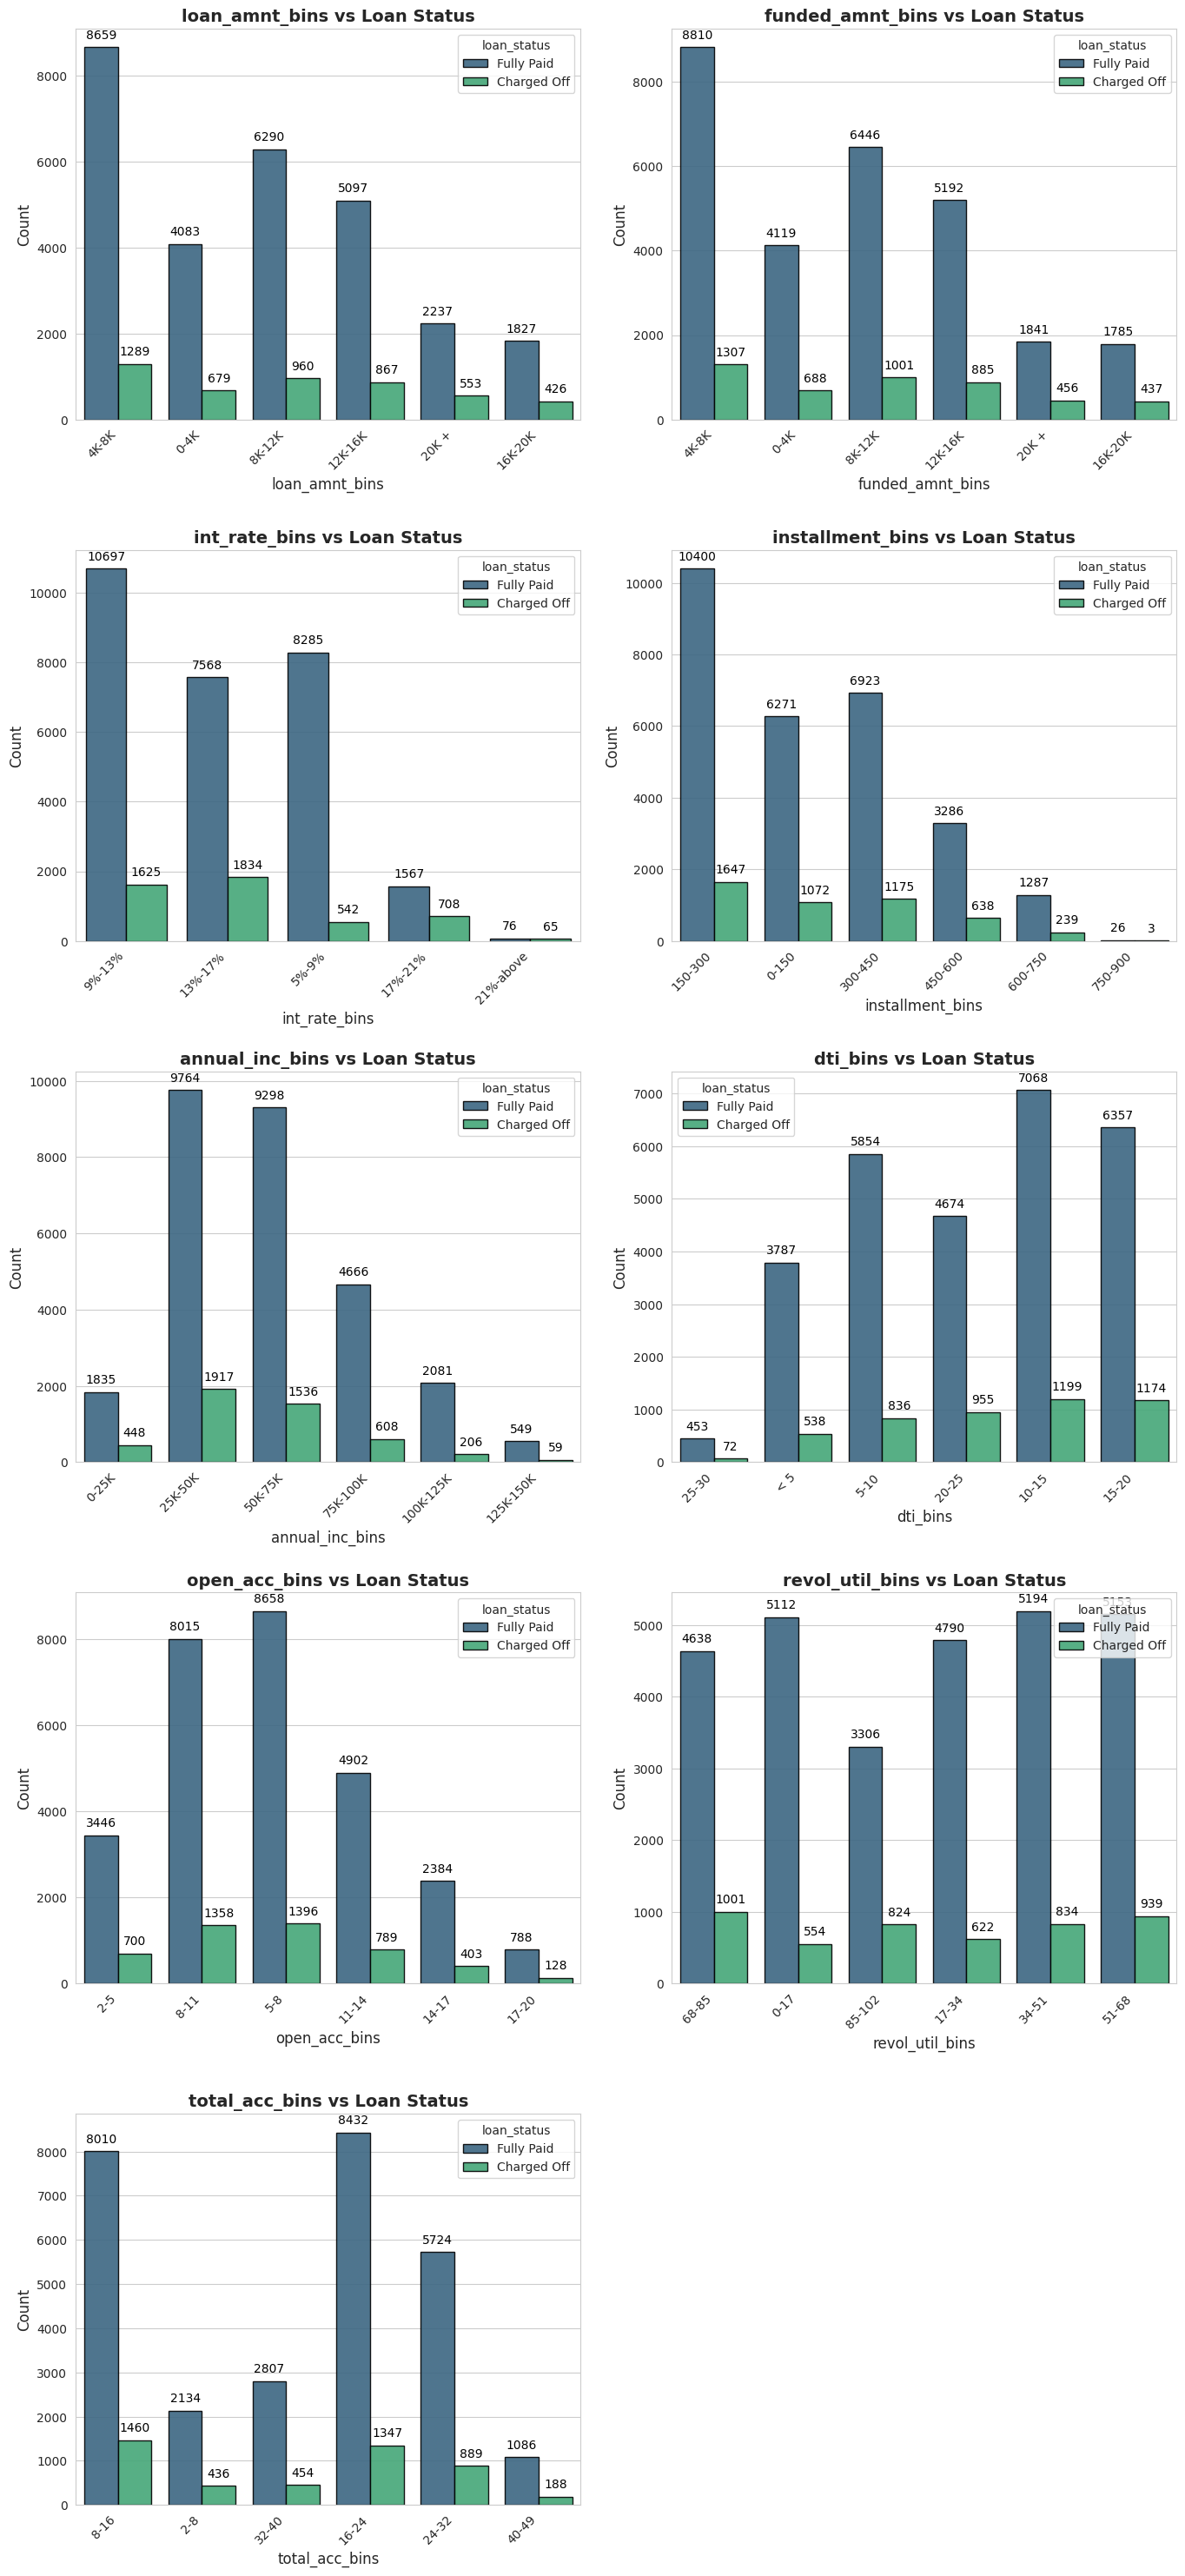

In [65]:
binned_vars = ['loan_amnt_bins', 'funded_amnt_bins', 'int_rate_bins', 'installment_bins', 'annual_inc_bins', 'dti_bins', 'open_acc_bins', 'revol_util_bins', 'total_acc_bins']

sns.set_style("whitegrid")
plt.figure(figsize=(14, 30))  # Reduced figure size

n_plots = len(binned_vars)
n_cols = 2
n_rows = (n_plots + n_cols - 1) // n_cols

for i, var in enumerate(binned_vars):
    plt.subplot(n_rows, n_cols, i + 1)
    palette = sns.color_palette("viridis", n_colors=2)
    ax = sns.countplot(
        data=df_loan_2_4_2,
        x=var,
        hue='loan_status',
        palette=palette,
        edgecolor="black",
        linewidth=1,
        alpha=0.9,
        dodge=0.9
    )

    plt.title(f'{var} vs Loan Status', fontsize=14, fontweight='bold')
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Annotations without decimals
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),  # Convert to integer
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')


plt.tight_layout(pad=2)
plt.show()


#####################################################
### 3.4.8 'Loan Status' vs 'Categorical Variables' (Bivariate Analysis)
#####################################################

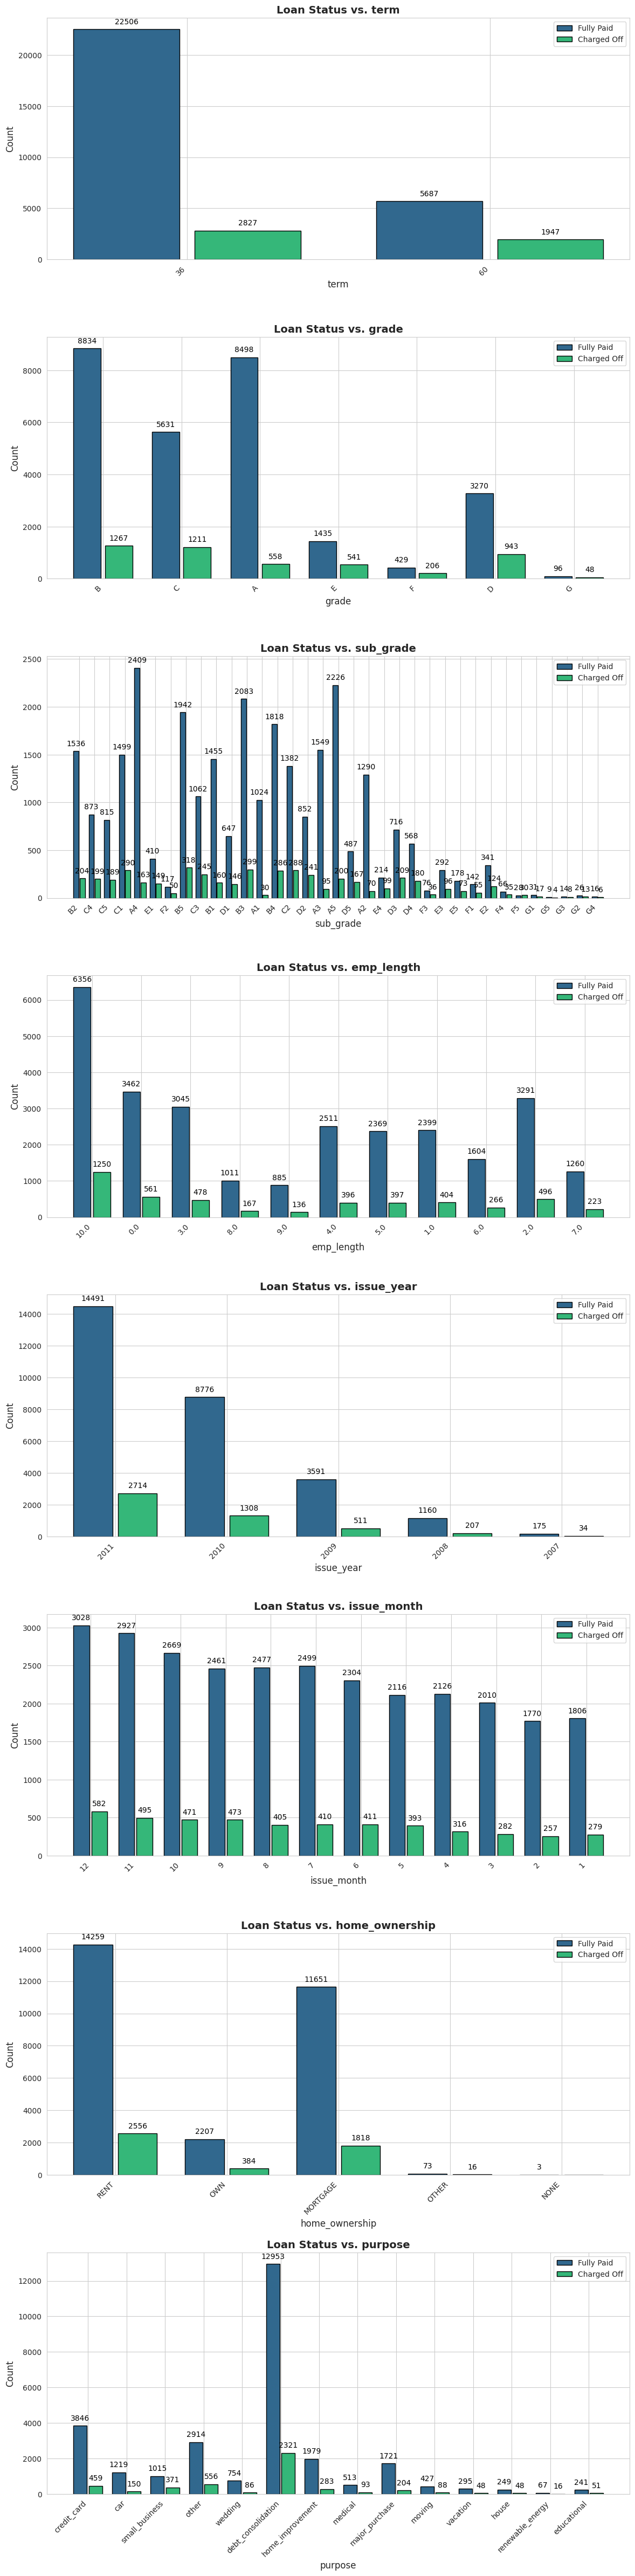

In [66]:
categorical_vars = ['term', 'grade', 'sub_grade', 'emp_length', 'issue_year', 'issue_month', 'home_ownership', 'purpose']

sns.set_style("whitegrid")

n_plots = len(categorical_vars)
n_cols = 1
n_rows = n_plots  # One plot per row
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))


if isinstance(axes, np.ndarray) : # check whether axes is an array
    axes = axes.flatten() # flatten to 1D array
elif n_rows == 1:
    axes = [axes] # if not array, and only 1 plot, put into list

for i, var in enumerate(categorical_vars):

    ax = axes[i]

    palette = sns.color_palette("viridis", n_colors=2)
    unique_x_values = df_loan_2_4_2[var].unique()
    x_positions = np.arange(len(unique_x_values))
    width = 0.35
    gap = 0.05

    for j, status in enumerate(['Fully Paid', 'Charged Off']):
        counts = df_loan_2_4_2[df_loan_2_4_2['loan_status'] == status].groupby(var).size().reindex(unique_x_values).fillna(0)
        ax.bar(x_positions + (j * (width + gap) - (width + gap) / 2), counts, width, label=status, color=palette[j], edgecolor="black")

    ax.set_title(f'Loan Status vs. {var}', fontsize=14, fontweight='bold')
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

    ax.set_xticks(x_positions)
    ax.set_xticklabels(unique_x_values, rotation=45, ha='right')

    ax.legend()

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


plt.tight_layout(pad=1.5)
plt.show()



#####################################################################
# *Interpretation / Findings of 'Bivariate Analysis' Plots (3.4 Plots)*:
#####################################################################

###

* **3.4.1 Core Financial Relationships (with Loan Status Integration)**:

    *   **Interest Rate vs. Loan Amount:** The scatter plot and heatmap show a positive correlation between interest rate and loan amount, meaning larger loans tend to have higher interest rates. This is expected as larger loans represent a higher risk for lenders.  Charged-off loans are more concentrated in higher interest rate and loan amount regions, indicating these as significant risk factors.

    *   **DTI vs. Annual Income:** The scatter plot and heatmap reveal a complex relationship between DTI and annual income.  While higher income generally correlates with lower DTI, there are many charged-off loans with relatively high incomes and moderate to high DTIs. This suggests that high DTI, even with a decent income, can be a significant risk factor.

    *   **Loan Amount vs. Term:** The box plot indicates that 60-month term loans tend to have higher loan amounts for both charged-off and fully paid loans.  Charged-off loans show a wider range of loan amounts, especially for the 60-month term, suggesting increased risk associated with larger, longer-term loans.

    *   **Interest Rate vs. Term:** The box plot confirms that 60-month loans have noticeably higher interest rates compared to 36-month loans for both fully paid and charged-off loans.  The distributions are relatively similar for both loan statuses, suggesting that term's influence on interest rate is consistent regardless of outcome, although the higher rates on longer terms might contribute to financial strain and default.


#####

* **3.4.2 Loan Characteristics and Grade (with Loan Status Integration)**:

    *   **Loan Amount vs. Grade:** Loan amounts generally increase with decreasing grade (higher risk), meaning lower-rated borrowers tend to take out larger loans.  The distributions for charged-off loans are generally wider and often higher than fully paid loans within each grade, indicating higher risk associated with larger loan amounts, especially for lower grades.

    *   **Interest Rate vs. Grade:** As expected, interest rates increase with decreasing grade.  The distributions for charged-off and fully paid loans are quite similar within each grade, suggesting that interest rates are primarily determined by grade and not strongly influenced by eventual loan status, although the higher rates for lower grades could contribute to default risk.

    *   **DTI vs. Grade:**  DTI shows a slight upward trend with decreasing grade, indicating that lower-rated borrowers tend to have higher DTIs.  Distributions for charged-off and fully paid loans are relatively similar within each grade, with charged-off loans often having slightly higher median DTIs, indicating DTI as a potential risk factor, but not a definitive predictor on its own.


####

* **3.4.3 Loan Purpose and Risk (with Loan Status Integration)**:

    *   **Loan Amount vs. Purpose:**  Small business loans tend to have the highest loan amounts, followed by debt consolidation.  The distributions for charged-off loans are generally wider and often skewed higher for most purposes, particularly small business loans, again suggesting higher risk with larger loan amounts.

    *   **Interest Rate vs. Purpose:** Small business loans also have the highest interest rates, which aligns with the higher risk observed in the loan amount analysis.  Most other purposes have similar interest rate distributions.  Charged-off and fully paid loans show similar distributions within each purpose, suggesting that the purpose primarily drives the interest rate, rather than the eventual loan status.  However, the elevated rates for small business loans likely play a role in the higher default rates for that category.

####

* **3.4.4 Time-Based Analysis (with Loan Status Integration)**:

    *   **Loan Amount vs. Issue Month/Year:** Loan amounts for both charged-off and fully paid loans show some monthly variation but no clear seasonal pattern.  However, loan amounts increase significantly from 2007 to 2011 for both charged-off and fully paid loans. The higher loan amounts in later years could be related to economic conditions or changes in lending practices and might contribute to the increased defaults observed in 2011.

    *   **Interest Rate vs. Issue Month/Year:** Interest rates show some monthly fluctuation for both charged-off and fully paid loans, but again, there's no consistent seasonal trend.  Interest rates also increase over the years, particularly for charged-off loans.  The higher interest rates in later years, especially for defaulted loans, likely reflect increased risk assessments by lenders and might be a contributing factor to the higher default rates observed in 2011.


####

* **3.4.5 Employment Length and Loan Characteristics**:

    *   **Loan Amount vs. Employment Length:**  There's a slight upward trend in loan amounts with increasing employment length, meaning those with longer employment histories tend to borrow slightly larger amounts.  However, the difference isn't substantial.  Charged-off loans generally have slightly higher loan amounts across all employment lengths, but the distributions largely overlap, suggesting that employment length is not a strong predictor of loan amount or default risk when considered in isolation.

    *   **Interest Rate vs. Employment Length:** Interest rates show no clear trend with employment length.  The distributions for charged-off and fully paid loans are very similar across all employment lengths. This further supports the idea that employment length, on its own, isn't a strong driver of interest rates or default likelihood.


####

* **3.4.6 Correlation Plot**:

    *   **Strong Positive Correlations:**
        *   `loan_amnt` and `funded_amnt`: 0.98 - Very strong positive correlation, as expected (the amount funded is almost always the same as the amount requested).
        *   `loan_amnt` and `installment`: 0.92 - High positive correlation: Larger loans result in higher installment payments.
        *   `funded_amnt` and `installment`: 0.95 - Similar to above; higher funded amounts lead to higher installments.

    *   **Moderate Positive Correlations:**  Several variables show moderate positive correlations (around 0.2 to 0.4), indicating some tendency to move together, but not as strongly as the examples above.

    *   **Weak Correlations:** Most other variable pairs show weak correlations (close to zero), suggesting little linear relationship.

    *   **Negative Correlations:** A few weak negative correlations exist (e.g., `revol_util` and `total_acc`), but none are strong enough to suggest a substantial inverse relationship.

    *   **Potential Multicollinearity:** The very high correlation (0.98) between `loan_amnt` and `funded_amnt` indicates strong multicollinearity. This means these variables provide essentially the same information.  In a modeling context, you would typically only include one of these variables to avoid redundancy and potential issues with model stability.  The high correlations between loan amount/funded amount and installment also suggest potential multicollinearity, although slightly less extreme.


### 

#####
############################################################################
## *Summary: Loan Default Patterns of Lending Club Case Study*
############################################################################

######

 1.  **Loan Amount and Interest Rate:** Smaller loans (4k-12k) with mid-range interest rates (9-17%) are common among defaults, suggesting borrowers may be overextending their finances.  Larger loans, particularly those with higher interest rates, also present elevated risk due to the increased repayment burden. This highlights the combined effect of loan amount and interest rate in assessing default risk.

 2.  **Financial Health (Income and DTI):** Defaults are concentrated among borrowers with annual incomes of 25k-75k, indicating that income alone is not a reliable predictor of default.  DTI plays a crucial role, with moderate to moderately high DTIs (10-20) being prevalent among defaulters.  High DTI, even with a reasonable income, is a significant risk factor, suggesting potential difficulty managing debt and financial overextension.

 3.  **Credit History (Open Lines, Utilization, Total Accounts):** Defaulters typically have a moderate number of open credit lines (5-11), indicating established credit but possible challenges in managing multiple accounts.  High revolving credit utilization (68-85%) is a risk factor, although defaults also occur at lower utilization levels, suggesting other contributing factors.  A moderate to high total number of accounts (8-24) is also common, potentially reflecting a history of seeking credit.

 4.  **Loan Characteristics (Grade, Term, Purpose):** Several loan characteristics are associated with increased default risk.  These include lower loan grades (B, C, F, G), sub-grades B5 and C1, 36-month loan terms, and debt consolidation as the loan purpose.  Longer terms (60 months), while less frequent among defaults, carry higher risk due to potentially larger loan amounts and accumulated interest.  Small business loans are particularly risky due to their larger amounts, higher rates, and inherent business uncertainties.

 5.  **Employment Length:** Both very short (<1 year) and very long (10+ years) employment histories show elevated default rates.  Short employment may indicate instability, while long employment might lead to overconfidence in borrowing capacity.  This counterintuitive finding warrants further investigation.

 6.  **Time of Loan (Year, Month):** Most defaults occurred in 2011, possibly due to economic conditions or lending practices specific to that period.  Increased defaults in November and December suggest seasonal influences, such as financial pressures related to holiday spending.

 7.  **Home Ownership and Loan Purpose:** Renters and individuals with non-traditional homeownership ("OTHER") experience higher default rates, potentially due to lower financial stability.  Debt consolidation is a frequent loan purpose among defaulters, often indicating a last-resort attempt to manage existing debt.  Small business loans remain a high-risk category.

 8.  **Interaction of Loan Grade and Loan Amount:** Lower loan grades are associated with both higher default rates and larger loan amounts.  This combination significantly increases the risk of default, as borrowers with weaker credit profiles take on more substantial debt.

 9.  **Risk Factors for Small Business Loans:** Small business loans are inherently risky due to factors such as larger loan amounts, higher interest rates, and the general uncertainties of business ventures.  These factors contribute to the elevated default rates observed in this category.

10. **DTI and Loan Grade Interaction:** While DTI is a risk factor across all loan grades, its influence is amplified for lower grades.  Borrowers with lower loan grades and higher DTIs are particularly vulnerable to default.  Lenders should carefully consider the combined effect of these two factors.


##


###############################################################################
## *Driver Variables for identifying potential loan defaulters:*
###############################################################################

######

1. **Grade (`grade` (and `sub_grade`)):** Loan grade is a strong predictor of default, with lower grades (B-G) showing significantly higher default rates. This is because lenders assign grades based on their assessment of borrower risk, considering factors like credit history and existing debt levels.  Sub-grades offer even finer granularity for risk differentiation.

2. **Interest Rate (`int_rate`):** High interest rates are a key indicator of risk, and the analysis confirms a strong positive relationship between interest rate and default rate. Higher rates often reflect the lender's perception of increased borrower risk and contribute to a heavier repayment burden, making default more likely.

3. **Term (`term`):** Longer loan terms (60 months) have a substantially higher default *rate* compared to shorter terms (36 months).  While 36-month loans may have more defaults in absolute numbers due to higher volume, the proportional risk is greater with longer terms, possibly due to increased exposure to financial hardship over time.

4. **Debt-to-Income Ratio (`dti`):** A high debt-to-income ratio (DTI), particularly in the 15-25 range, is a strong predictor of default.  This indicates that a large portion of the borrower's income is already allocated to debt repayment, leaving less room to handle unexpected expenses or financial shocks, thus increasing their vulnerability to default.

5. **Loan Purpose (`purpose`):** Certain loan purposes are associated with higher default risk. Small business loans, for instance, have the highest default rate due to the inherent risks of business ventures, coupled with often larger loan amounts and higher interest rates.  Debt consolidation loans also signal elevated risk, as they often indicate borrowers are already struggling to manage existing debt.

6. **Loan Amount (`loan_amnt`):** Larger loan amounts, especially those above 16k, correlate with higher default rates.  This is likely because larger loans result in higher monthly payments and a greater overall repayment burden, increasing the financial strain on borrowers and making them more susceptible to default.

7. **Home Ownership (`home_ownership`):** Renters and those with "OTHER" homeownership status exhibit higher default rates compared to homeowners.  This suggests that homeownership may serve as a proxy for greater financial stability and access to alternative financial resources in times of hardship.

8. **Annual Income (`annual_inc`):** While not a strong standalone predictor, annual income plays a role in default risk. Lower annual incomes (<25k) are associated with higher default rates, indicating that borrowers with limited financial capacity may be more vulnerable to unforeseen circumstances that lead to default.  It's important to consider income in conjunction with other factors like DTI and loan amount.


    These 8 variables, when considered together and in their interactions, provide a comprehensive view of a borrower's default risk profile.  Other factors, like credit history details and specific sub-grades, can further refine this assessment.

